# Initial Setup

In [771]:
# from google.colab import drive
# drive.mount('/content/drive')

In [772]:
file_path = "SIB-200 languages - ACL.xlsx"

# # only for another account
# file_path = "SIB-200 languages - ACL.xlsx"

In [773]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.io as pio
pio.renderers.default = 'colab'
plt.rcParams.update({
    'font.size': 26,
    'font.family':'arial narrow',   # sans-serif
    'font.weight':'bold',
    # 'font.stretch':'condensed',
    'axes.labelweight':'bold'
    })

# Load Data

In [804]:
df_ori = pd.read_excel(file_path)
df_ori.columns

/Users/ricky/Documents/PC Backup/Projects/PSU-Projects/llm-context-window/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



Index(['Folder Name', 'Language Name', 'ISO 639 - 1', 'ISO 639 - 2 (B)',
       'ISO 639 - 2 (T)', 'ISO 639 - 3', 'Script (ISO 15924)',
       'Language Family', 'Population', 'Language Vitality',
       'Digital Language Support', 'Resource Level',
       'Bloom Train Data Percentage', 'BLOOMZ Finetune Data',
       'PolyLM Train Data Percentage', 'XGLM Train Percentage',
       'XGLM Train Percentage - Upscaled', 'F1 xglm-564M top_logprobs',
       'F1 xglm-1.7B top_logprobs', 'F1 xglm-2.9B top_logprobs',
       'F1 xglm-7.5B top_logprobs', 'F1 bloom-560M top_logprobs',
       'F1 bloom-1b1 top_logprobs', 'F1 bloom-1b7 top_logprobs',
       'F1 bloom-3b top_logprobs', 'F1 bloom-7b1 top_logprobs',
       'F1 bloomz-560M generate', 'F1 bloomz-1b1 generate',
       'F1 bloomz-1b7 generate', 'F1 bloomz-3b generate',
       'F1 bloomz-7b1 generate', 'F1 bloomz-560m generate 2-shot',
       'F1 bloomz-1b1 generate 2-shot', 'F1 bloomz-1b7 generate 2-shot',
       'F1 bloomz-3b generate 2-sh

In [805]:
selected_columns = ['Folder Name', 'Language Name', 'Language Family', 'Resource Level', 'Bloom Train Data Percentage', 'BLOOMZ Finetune Data', 'XGLM Train Percentage',
                    'F1 bloomz-560M generate', 'F1 bloomz-1b1 generate', 'F1 bloomz-1b7 generate', 'F1 bloomz-3b generate', 'F1 bloomz-7b1 generate',
                    'F1 bloom-560M top_logprobs', 'F1 bloom-1b1 top_logprobs', 'F1 bloom-1b7 top_logprobs', 'F1 bloom-3b top_logprobs', 'F1 bloom-7b1 top_logprobs',
                    'F1 xglm-564M top_logprobs', 'F1 xglm-1.7B top_logprobs', 'F1 xglm-2.9B top_logprobs', 'F1 xglm-7.5B top_logprobs',
                    'F1 bloomz-560m generate 2-shot', 'F1 bloomz-1b1 generate 2-shot', 'F1 bloomz-1b7 generate 2-shot', 'F1 bloomz-3b generate 2-shot', 'F1 bloomz-7b1 generate 2-shot',
                    'F1 bloom-560m generate 2-shot', 'F1 bloom-1b1 generate 2-shot', 'F1 bloom-1b7 generate 2-shot', 'F1 bloom-3b generate 2-shot', 'F1 bloom-7b1 generate 2-shot',
                    'F1 xglm-564M generate 2-shot', 'F1 xglm-1.7B generate 2-shot', 'F1 xglm-2.9B generate 2-shot', 'F1 xglm-7.5B generate 2-shot',
                    'XGLM Train Percentage - Upscaled',
                    'xglm-564M scbleu', 'xglm-1.7B scbleu', 'xglm-2.9B scbleu', 'xglm-7.5B scbleu',
                    'bloom-560m scbleu', 'bloom-1b1 scbleu', 'bloom-1b7 scbleu', 'bloom-3b scbleu', 'bloom-7b1 scbleu',
                    'bloomz-560m scbleu', 'bloomz-1b1 scbleu', 'bloomz-1b7 scbleu', 'bloomz-3b scbleu', 'bloomz-7b1 scbleu',
                    'xglm-564M scbleu 2s', 'xglm-1.7B scbleu 2s', 'xglm-2.9B scbleu 2s', 'xglm-7.5B scbleu 2s',
                    'bloom-560m scbleu 2s', 'bloom-1b1 scbleu 2s', 'bloom-1b7 scbleu 2s', 'bloom-3b scbleu 2s', 'bloom-7b1 scbleu 2s',
                    'bloomz-560m scbleu 2s', 'bloomz-1b1 scbleu 2s', 'bloomz-1b7 scbleu 2s', 'bloomz-3b scbleu 2s', 'bloomz-7b1 scbleu 2s',
                    ]
df_main = df_ori[selected_columns]
df_main = df_main.rename(columns={'Bloom Train Data Percentage':'BLOOM Pretrain Data',
                                  'BLOOMZ Finetune Data':'BLOOMZ Finetune Data',
                                  'XGLM Train Percentage':'XGLM Pretrain Data',
                                  'F1 bloomz-560M generate':'F1 bloomz-560m',
                                  'F1 bloomz-1b1 generate':'F1 bloomz-1b1',
                                  'F1 bloomz-1b7 generate':'F1 bloomz-1b7',
                                  'F1 bloomz-3b generate':'F1 bloomz-3b',
                                  'F1 bloomz-7b1 generate':'F1 bloomz-7b1',
                                  'F1 bloom-560M top_logprobs':'F1 bloom-560m',
                                  'F1 bloom-1b1 top_logprobs':'F1 bloom-1b1',
                                  'F1 bloom-1b7 top_logprobs':'F1 bloom-1b7',
                                  'F1 bloom-3b top_logprobs':'F1 bloom-3b',
                                  'F1 bloom-7b1 top_logprobs':'F1 bloom-7b1',
                                  'F1 xglm-564M top_logprobs':'F1 xglm-564m',
                                  'F1 xglm-1.7B top_logprobs':'F1 xglm-1.7b',
                                  'F1 xglm-2.9B top_logprobs':'F1 xglm-2.9b',
                                  'F1 xglm-7.5B top_logprobs':'F1 xglm-7.5b',
                                  'F1 bloom-560m generate 2-shot':'F1 bloom-560m 2s',
                                  'F1 bloom-1b1 generate 2-shot':'F1 bloom-1b1 2s',
                                  'F1 bloom-1b7 generate 2-shot':'F1 bloom-1b7 2s',
                                  'F1 bloom-3b generate 2-shot':'F1 bloom-3b 2s',
                                  'F1 bloom-7b1 generate 2-shot':'F1 bloom-7b1 2s',
                                  'F1 xglm-564M generate 2-shot':'F1 xglm-564m 2s',
                                  'F1 xglm-1.7B generate 2-shot':'F1 xglm-1.7b 2s',
                                  'F1 xglm-2.9B generate 2-shot':'F1 xglm-2.9b 2s',
                                  'F1 xglm-7.5B generate 2-shot':'F1 xglm-7.5b 2s',
                                  'F1 bloomz-560m generate 2-shot':'F1 bloomz-560m 2s',
                                  'F1 bloomz-1b1 generate 2-shot':'F1 bloomz-1b1 2s',
                                  'F1 bloomz-1b7 generate 2-shot':'F1 bloomz-1b7 2s',
                                  'F1 bloomz-3b generate 2-shot':'F1 bloomz-3b 2s',
                                  'F1 bloomz-7b1 generate 2-shot':'F1 bloomz-7b1 2s',
                                  })
df_main.head()

Folder Name                 Language Name Language Family  Resource Level  \
0    ace_Arab                          Aceh    Austronesian             1.0   
1    ace_Latn                          Aceh    Austronesian             1.0   
2    acm_Arab    Mesopotamian Spoken Arabic    Afro-Asiatic             NaN   
3    acq_Arab  Arabic, Ta’izzi-Adeni Spoken    Afro-Asiatic             NaN   
4    aeb_Arab        Tunisian Spoken Arabic    Afro-Asiatic             NaN   

   BLOOM Pretrain Data  BLOOMZ Finetune Data  XGLM Pretrain Data  \
0                  NaN                   NaN                 NaN   
1                  NaN                   NaN                 NaN   
2                  NaN                   NaN                 NaN   
3                  NaN                   NaN                 NaN   
4                  NaN                   NaN                 NaN   

   F1 bloomz-560m  F1 bloomz-1b1  F1 bloomz-1b7  ...  bloom-560m scbleu 2s  \
0        0.105192       0.094892       0.114471  ...                   0.1   
1        0.352888       0.260779       0.262736  ...                   0.4   
2        0.459507       0.382058       0.335226  ...                   3.5   
3        0.460365       0.330938       0.353313  ...                   6.0   
4        0.455299       0.343693       0.315781  ...                   3.3   

   bloom-1b1 scbleu 2s  bloom-1b7 scbleu 2s  bloom-3b scbleu 2s  \
0                  0.3                  0.3                 0.7   
1                  1.0                  2.1                 3.4   
2                 13.6                 14.6                18.6   
3                 14.6                 18.0                22.6   
4                 10.2                 12.1                15.2   

   bloom-7b1 scbleu 2s  bloomz-560m scbleu 2s  bloomz-1b1 scbleu 2s  \
0                  1.1                    0.2                   0.3   
1                  5.5                    1.9                   2.9   
2                 23.1                    5.0                  14.6   
3                 26.1                    6.7                  17.6   
4                 20.5                    4.0                  13.0   

   bloomz-1b7 scbleu 2s  bloomz-3b scbleu 2s  bloomz-7b1 scbleu 2s  
0                   0.4                  0.2                   1.1  
1                   3.8                  5.7                  12.3  
2                  25.4                 33.8                  54.0  
3                  32.3                 40.8                  52.7  
4                  22.5                 28.4                  44.0  

[5 rows x 64 columns]

In [806]:
df_main["Resource Level"] = pd.to_numeric(df_main["Resource Level"], errors="coerce").astype("Int64")
df_main["Resource Level"].unique()

<IntegerArray>
[1, <NA>, 3, 2, 5, 0, 4]
Length: 7, dtype: Int64

In [807]:
df_main.shape

(204, 64)

In [808]:
# def clean_dataframe(df):
#     columns_to_check = [col for col in df.columns if col.startswith('F1')]
#     df_cleaned = df.dropna(subset=columns_to_check, how='any')

#     return df_cleaned

# df = clean_dataframe(df_main)
df = df_main

In [809]:
def lang_family_by_model(df, model_name):
    if model_name == "all":
        return df['Language Family'].value_counts()
    elif model_name == "bloom":
        df_filtered = df.dropna(subset=['BLOOM Pretrain Data'])
        # print(df_filtered['Language Family'].value_counts())
        return df_filtered['Language Family'].value_counts()
    elif model_name == "bloomz":
        df_filtered = df.dropna(subset=['BLOOMZ Finetune Data'])
        # print(df_filtered['Language Family'].value_counts())
        return df_filtered['Language Family'].value_counts()
    if model_name == "xglm":
        df_filtered = df.dropna(subset=['XGLM Pretrain Data'])
        # print(df_filtered['Language Family'].value_counts())
        return df_filtered['Language Family'].value_counts()

lang_family_by_model(df, "bloom")

Language Family
Niger-Congo       21
Indo-European     14
Dravidian          4
Sino-Tibetan       2
Afro-Asiatic       1
Isolate            1
Austronesian       1
Austro-Asiatic     1
Name: count, dtype: int64

In [810]:
# # -------- Generation --------
# # List of models
# bloom_models = ['bloom-560m scbleu', 'bloom-1b1 scbleu', 'bloom-1b7 scbleu', 'bloom-3b scbleu', 'bloom-7b1 scbleu']
# bloomz_models = ['bloomz-560m scbleu', 'bloomz-1b1 scbleu', 'bloomz-1b7 scbleu', 'bloomz-3b scbleu', 'bloomz-7b1 scbleu']
# xglm_models = ['xglm-564M scbleu', 'xglm-1.7B scbleu', 'xglm-2.9B scbleu', 'xglm-7.5B scbleu']

# bloom_models_2s = ['bloom-560m scbleu 2s', 'bloom-1b1 scbleu 2s', 'bloom-1b7 scbleu 2s', 'bloom-3b scbleu 2s', 'bloom-7b1 scbleu 2s']
# bloomz_models_2s = ['bloomz-560m scbleu 2s', 'bloomz-1b1 scbleu 2s', 'bloomz-1b7 scbleu 2s', 'bloomz-3b scbleu 2s', 'bloomz-7b1 scbleu 2s']
# xglm_models_2s = ['xglm-564M scbleu 2s', 'xglm-1.7B scbleu 2s', 'xglm-2.9B scbleu 2s', 'xglm-7.5B scbleu 2s']

# resource_levels = [0, 1, 2, 3, 4, 5, 'None']

# column_list_bloom = bloom_models + ['bloom Pretrain Data']
# column_list_bloomz = bloomz_models + ['bloomz Finetune Data']
# column_list_xglm = xglm_models + ['xglm Pretrain Data']

# column_list_bloom_2s = bloom_models_2s + ['bloom Pretrain Data']
# column_list_bloomz_2s = bloomz_models_2s + ['bloomz Finetune Data']
# column_list_xglm_2s = xglm_models_2s + ['xglm Pretrain Data']

# # remove English
# df = df[df['Folder Name'] != 'eng_Latn']


# -------- Classification --------
# List of models
bloomz_models = ['F1 bloomz-560m', 'F1 bloomz-1b1', 'F1 bloomz-1b7', 'F1 bloomz-3b', 'F1 bloomz-7b1']
bloom_models = ['F1 bloom-560m', 'F1 bloom-1b1', 'F1 bloom-1b7', 'F1 bloom-3b', 'F1 bloom-7b1']
xglm_models = ['F1 xglm-564m', 'F1 xglm-1.7b', 'F1 xglm-2.9b', 'F1 xglm-7.5b']

bloomz_models_2s = ['F1 bloomz-560m 2s', 'F1 bloomz-1b1 2s', 'F1 bloomz-1b7 2s', 'F1 bloomz-3b 2s', 'F1 bloomz-7b1 2s']
bloom_models_2s = ['F1 bloom-560m 2s', 'F1 bloom-1b1 2s', 'F1 bloom-1b7 2s', 'F1 bloom-3b 2s', 'F1 bloom-7b1 2s']
xglm_models_2s = ['F1 xglm-564m 2s', 'F1 xglm-1.7b 2s', 'F1 xglm-2.9b 2s', 'F1 xglm-7.5b 2s']

resource_levels = [0, 1, 2, 3, 4, 5, 'None']

column_list_bloom = bloom_models + ['bloom Pretrain Data']
column_list_bloomz = bloomz_models + ['bloomz Finetune Data']
column_list_xglm = xglm_models + ['xglm Pretrain Data']

column_list_bloom_2s = bloom_models_2s + ['bloom Pretrain Data']
column_list_bloomz_2s = bloomz_models_2s + ['bloomz Finetune Data']
column_list_xglm_2s = xglm_models_2s + ['xglm Pretrain Data']

# Regular Plots

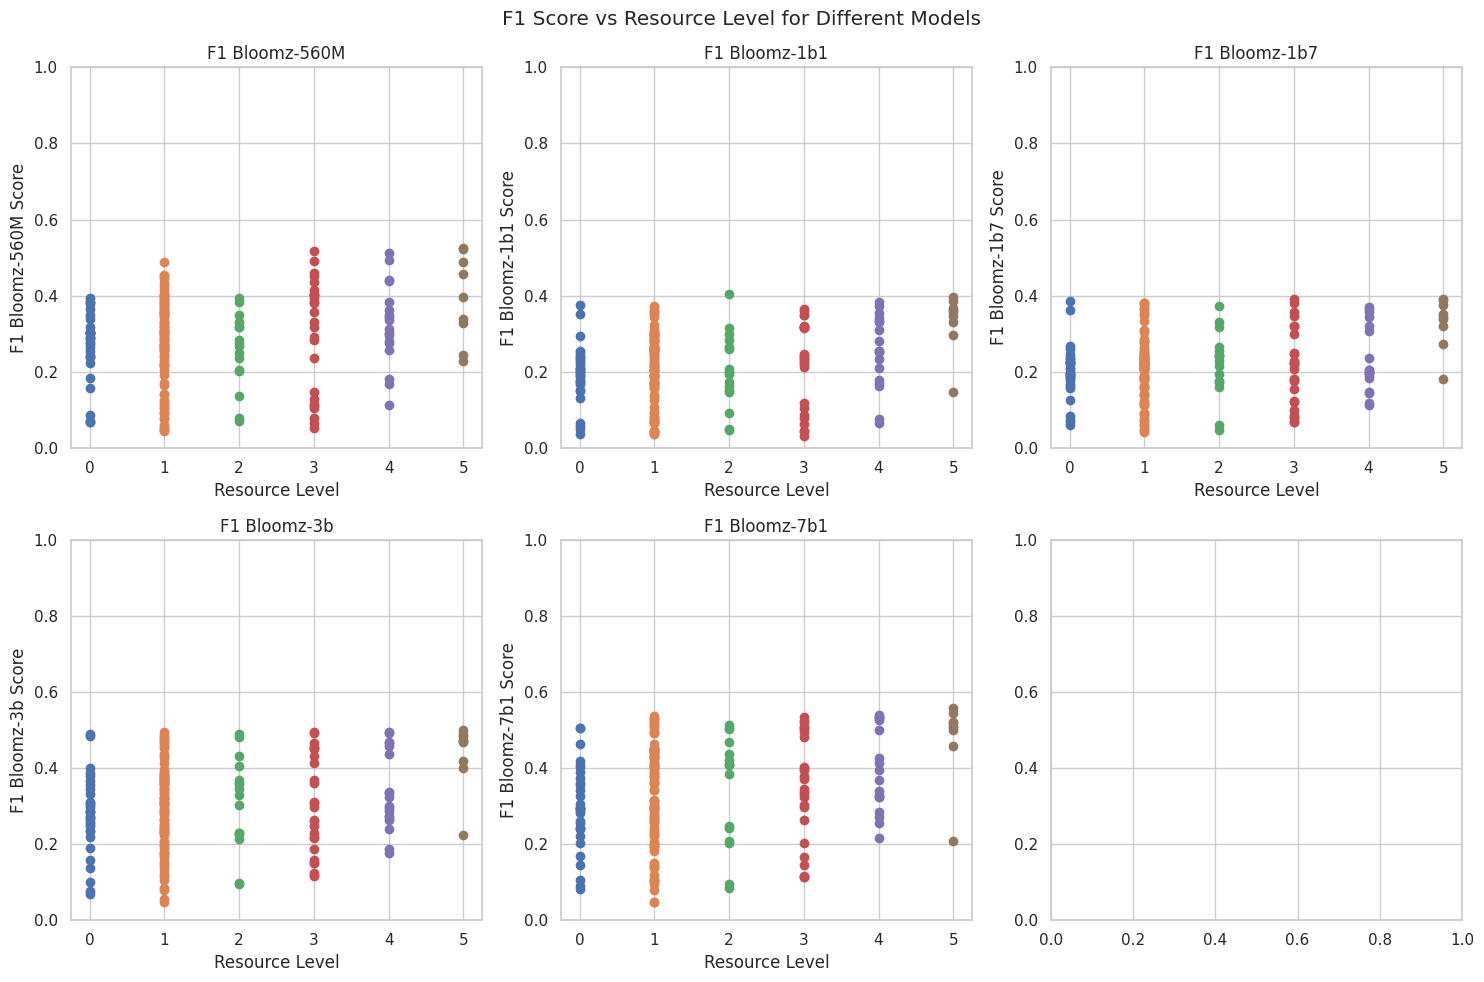

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with NaN and 'None' values in 'Resource Level'
df = df_main.dropna(subset=['F1 bloomz-560m'], how='any')
df = df.dropna(subset=['F1 Bloomz-1b1'], how='any')
df = df.dropna(subset=['F1 Bloomz-1b7'], how='any')
df = df.dropna(subset=['F1 Bloomz-3b'], how='any')
df = df.dropna(subset=['F1 Bloomz-7b1'], how='any')
df = df[df['Resource Level'] != 'None']

# List of models
models = ['F1 bloomz-560m', 'F1 Bloomz-1b1', 'F1 Bloomz-1b7', 'F1 Bloomz-3b', 'F1 Bloomz-7b1']

# Create subplots for each model
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('F1 Score vs Resource Level for Different Models')

for i, model in enumerate(models):
    ax = axs[i // 3, i % 3]
    ax.set_title(model)
    ax.set_xlabel('Resource Level')
    ax.set_ylabel(f'{model} Score')

    for level in sorted(df['Resource Level'].unique()):
        subset = df[df['Resource Level'] == level]
        ax.scatter([int(level)] * len(subset), subset[model], label=f'Resource Level {level}')

    # ax.legend()
    ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.show()

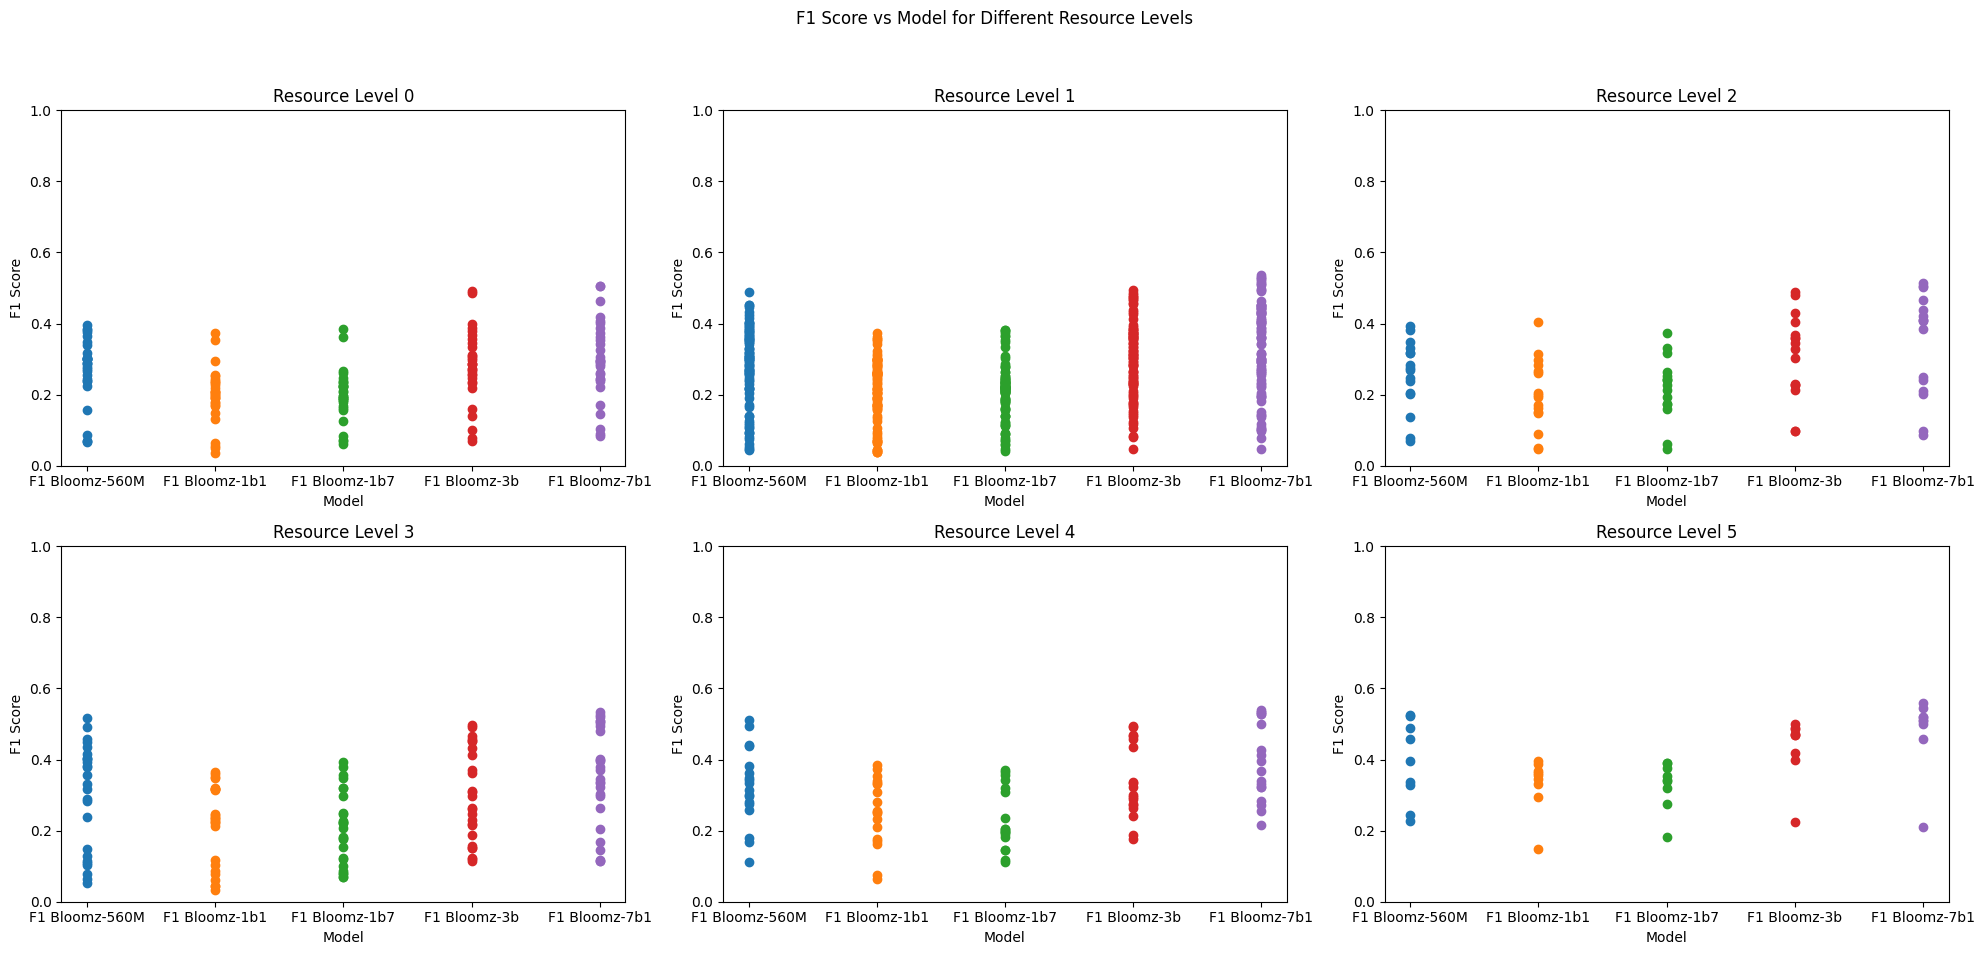

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with NaN and 'None' values in 'Resource Level'
df = df_main.dropna(subset=['F1 bloomz-560m'], how='any')
df = df.dropna(subset=['F1 Bloomz-1b1'], how='any')
df = df.dropna(subset=['F1 Bloomz-1b7'], how='any')
df = df.dropna(subset=['F1 Bloomz-3b'], how='any')
df = df.dropna(subset=['F1 Bloomz-7b1'], how='any')
df = df[df['Resource Level'] != 'None']

# List of resource levels
resource_levels = sorted(df['Resource Level'].unique())

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('F1 Score vs Model for Different Resource Levels')

for i, level in enumerate(resource_levels):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Resource Level {level}')
    ax.set_xlabel('Model')
    ax.set_ylabel('F1 Score')

    for model in models:
        subset = df[(df['Resource Level'] == level)]
        ax.scatter([model] * len(subset), subset[model], label=f'{model}')

    # ax.legend()
    ax.set_ylim(0.0, 1.0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

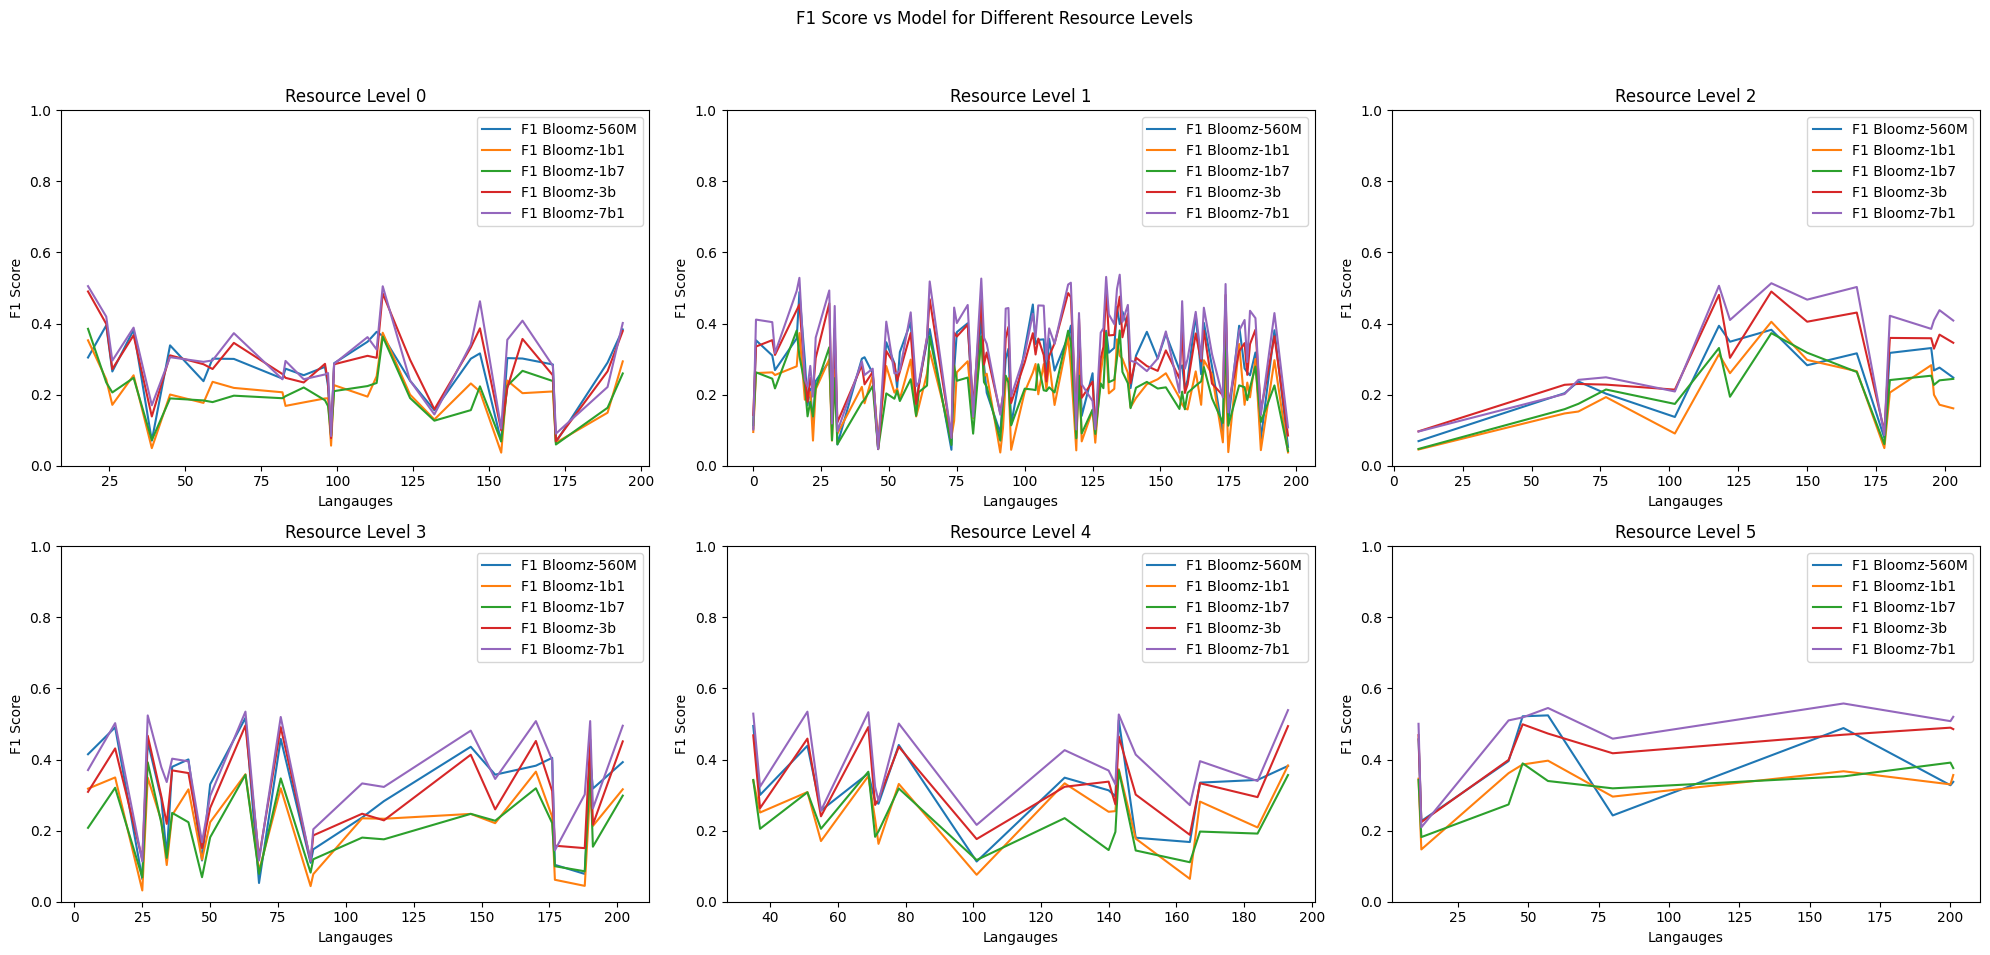

In [ ]:
# Filter out rows with NaN and 'None' values in 'Resource Level'
df = df_main.dropna(subset=['F1 bloomz-560m'], how='any')
df = df.dropna(subset=['F1 Bloomz-1b1'], how='any')
df = df.dropna(subset=['F1 Bloomz-1b7'], how='any')
df = df.dropna(subset=['F1 Bloomz-3b'], how='any')
df = df.dropna(subset=['F1 Bloomz-7b1'], how='any')
df = df[df['Resource Level'] != 'None']

# List of resource levels
resource_levels = sorted(df['Resource Level'].unique())

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('F1 Score vs Model for Different Resource Levels')

for i, level in enumerate(resource_levels):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Resource Level {level}')
    ax.set_xlabel('Langauges')
    ax.set_ylabel('F1 Score')

    for model in models:
        subset = df[(df['Resource Level'] == level)]
        ax.plot(subset[model], label=f'{model}')  # Use plot instead of scatter

    ax.legend()
    ax.set_ylim(0.0, 1.0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def box_plot_by_resource_level(df, model_name, seen_flag):

    if model_name == "bloom":
        models = bloom_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "bloomz":
        models = bloomz_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOMZ Finetune Data'].isna()]
    elif model_name == "xglm":
        models = xglm_models
        if seen_flag == 'True':
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['XGLM Pretrain Data'].isna()]
    else:
        print("============ ERROR ============")
        print("Invalid model name")

    # Create subplots
    num_rows = (len(resource_levels) + 1) // 2
    num_cols = min(2, len(resource_levels))

    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=[f'Resource Level {level}' for level in resource_levels], shared_yaxes=True)

    # Define a color set (modify based on your preference)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    # Loop through resource levels and add box plots
    for i, level in enumerate(resource_levels):
        row = i // num_cols + 1
        col = i % num_cols + 1

        # Filter data for the current resource level
        data_subset = df[df['Resource Level'] == level][models]

        # Add box plot to the subplot with the specified color
        for j, model in enumerate(models):
            fig.add_trace(go.Box(y=data_subset[model], name=model, marker_color=colors[j]), row=row, col=col)

    # Update layout
    fig.update_layout(title_text='Seen languages', showlegend=False)

    # Update x-axis label
    fig.update_xaxes(title_text='Languages', row=num_rows, col=1)

    # Set y-axis limits
    fig.update_yaxes(range=[0, 0.7])

    # Set layout height, width, and title
    fig.update_layout(height=900, width=1200, title_text="Title")

    # Show plot
    fig.show()

In [ ]:
box_plot_by_resource_level(df, model_name="bloom", seen_flag="True")

In [ ]:
box_plot_by_resource_level(df, model_name="bloomz", seen_flag="True")

In [ ]:
box_plot_by_resource_level(df, model_name="xglm", seen_flag="True")

<ipython-input-15-511cecd21ba5>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-511cecd21ba5>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



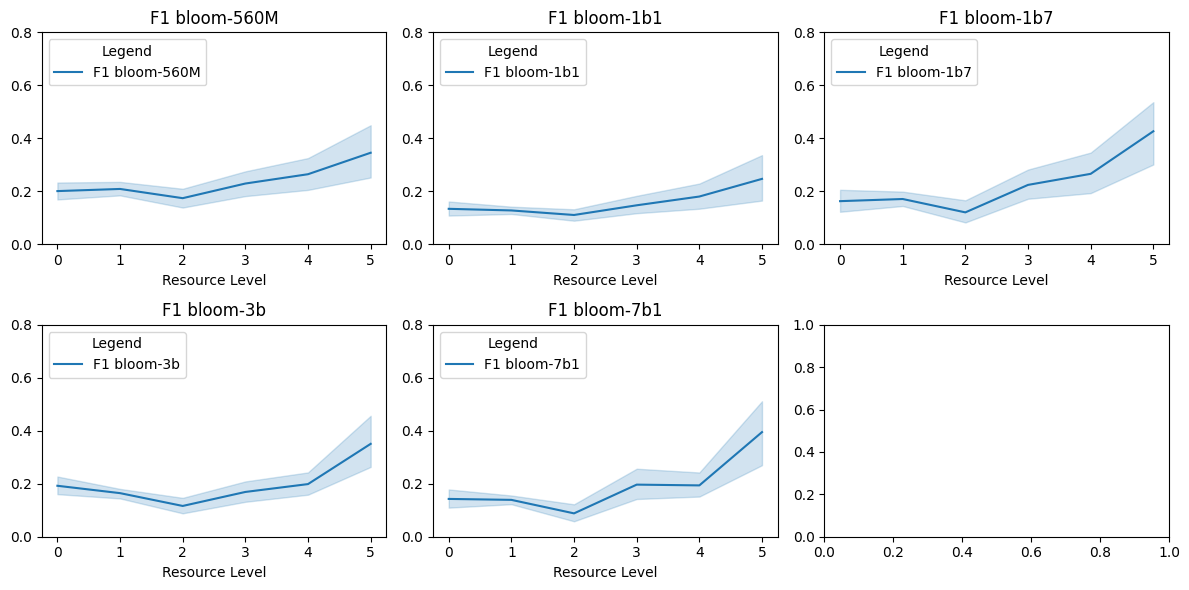

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a list of F1 score column names
# f1_scores = ['F1 bloomz-560m', 'F1 Bloomz-1b1', 'F1 Bloomz-1b7', 'F1 Bloomz-3b', 'F1 Bloomz-7b1']

# model_sizes = [560, 1100, 1700, 3000, 7100]
df = df[df['Resource Level'] != 'None']

# Normalize 'BLOOMZ Finetune Data' between 0 and 1
scaler = MinMaxScaler()
df['Bloomz Finetune Data Normalized'] = scaler.fit_transform(df[['BLOOMZ Finetune Data']])
df['Bloom Finetune Data Normalized'] = scaler.fit_transform(df[['BLOOM Pretrain Data']])

# Create a figure with 3 columns and 2 rows of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Flatten the 2D array of subplots to make it easier to iterate
axes = axes.flatten()

# Iterate through each F1 score and create a subplot
for i, f1_score in enumerate(bloom_models):
    ax = axes[i]

    # Plot the first line
    sns.lineplot(x='Resource Level', y=f1_score, data=df, ax=ax, label=f'{f1_score}')

    # # Plot the second line with normalized data
    sns.lineplot(x='Resource Level', y='Bloomz Finetune Data Normalized', data=df, ax=ax, label='BLOOMZ Finetune Data Size')

    sns.lineplot(x='Resource Level', y='Bloom Finetune Data Normalized', data=df, ax=ax, label='BLOOM Pretrain Data Size')

    ax.set_title(f'{f1_score}')
    ax.set_xlabel('Resource Level')
    ax.set_ylabel('')
    ax.legend(title='Legend', loc='upper left')
    ax.set_ylim(0.0, 0.8)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

def modelsize_vs_f1(df, model_name):
    # Filter out rows with 'Resource Level' as 'None'
    # df_filtered = df[df['Resource Level'] != 'None']

    if model_name == "bloom":
        models = bloom_models
        df_filtered = df[df['BLOOM Pretrain Data'].isna()]
    if model_name == "bloomz":
        models = bloomz_models
        df_filtered = df[df['BLOOMZ Finetune Data'].isna()]
    if model_name == "xglm":
        models = xglm_models
        df_filtered = df[df['XGLM Pretrain Data'].isna()]

    # Melt the dataframe to reshape it
    df_melted = pd.melt(df_filtered, id_vars=['Resource Level'], value_vars=models,
                        var_name='Model Names', value_name='F1 Score')

    # Create a figure with a single plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot lines for each model
    sns.lineplot(x='Model Names', y='F1 Score', data=df_melted, ax=ax)

    ax.set_title(f'F1 Score for {model_name} Models')
    ax.set_xlabel('Model Names')
    ax.set_ylabel('F1 Score')
    # ax.legend(title='Resource Level', loc='upper left')
    ax.set_ylim(0.0, 0.8)

    plt.tight_layout()
    plt.show()

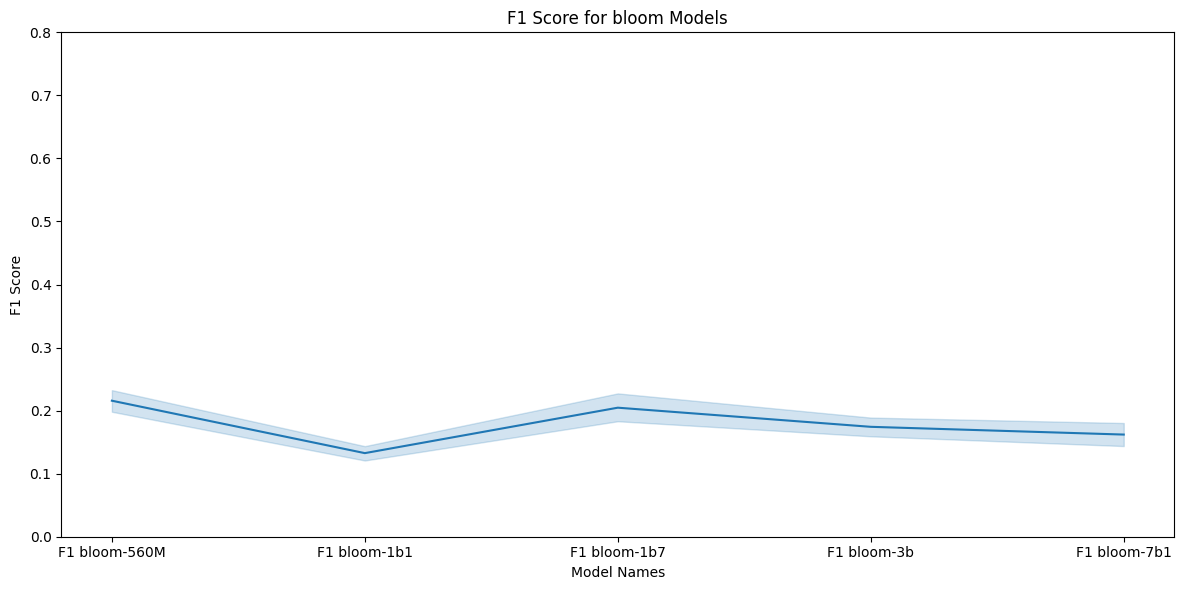

In [ ]:
modelsize_vs_f1(df, "bloom")

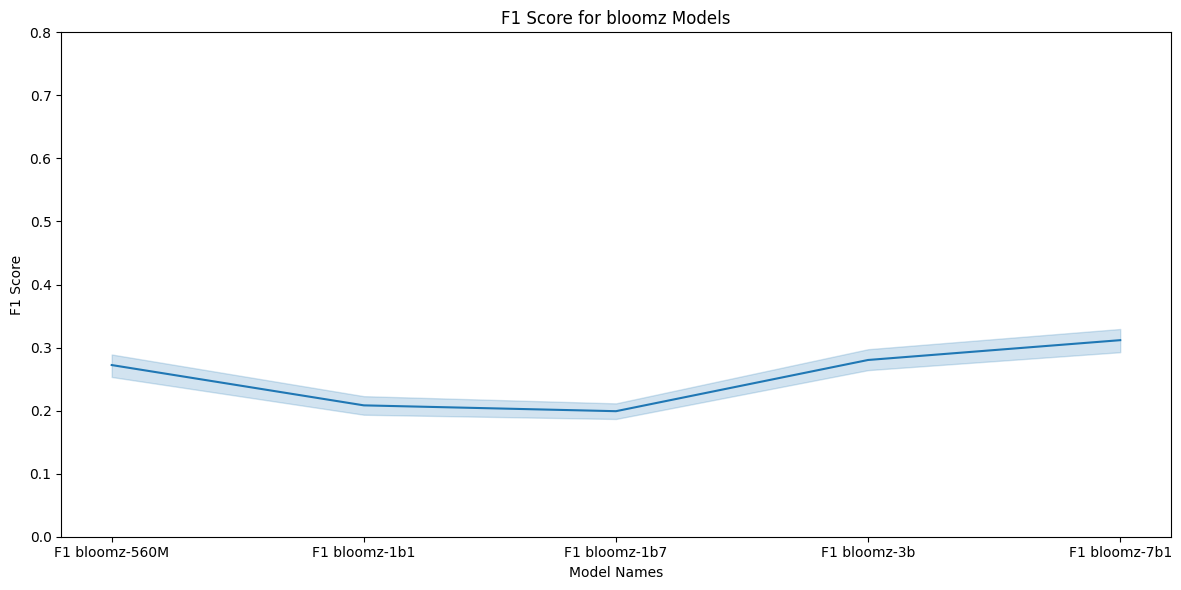

In [ ]:
modelsize_vs_f1(df, "bloomz")

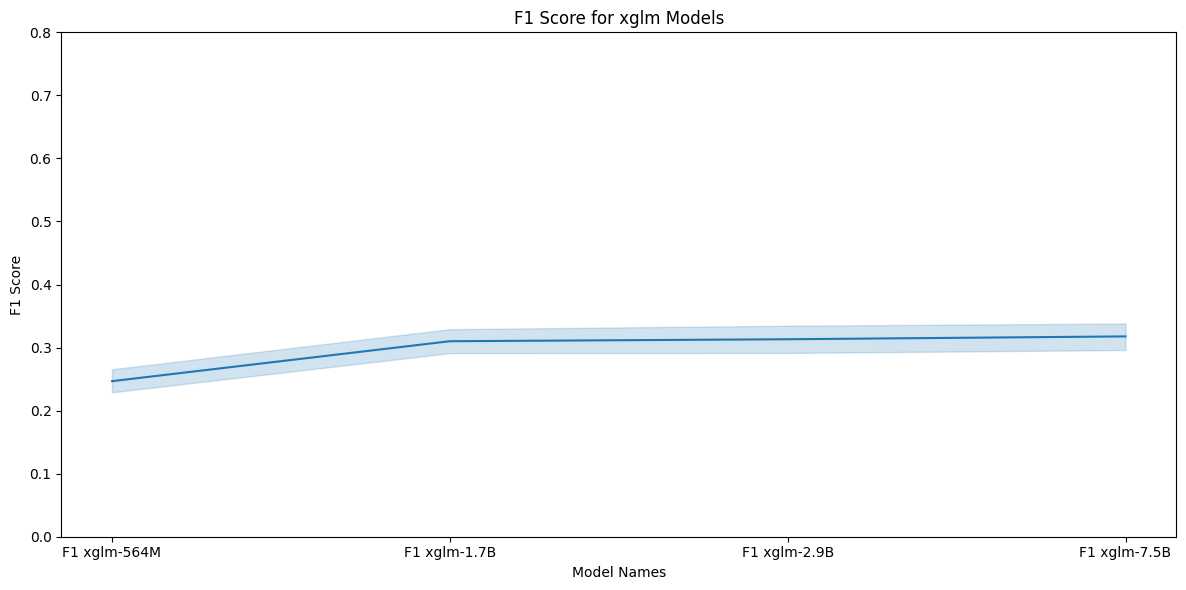

In [ ]:
modelsize_vs_f1(df, "xglm")

# Model vs Data sizes

In [ ]:
value_counts_sorted = df['Resource Level'].value_counts()
value_counts_sorted

1       90
0       31
3       26
4       18
2       16
None    14
5        9
Name: Resource Level, dtype: int64

In [ ]:
# ##### Zero Shot #####

# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming you have a list of F1 score column names
# # f1_scores = ['F1 bloomz-560m', 'F1 Bloomz-1b1', 'F1 Bloomz-1b7', 'F1 Bloomz-3b', 'F1 Bloomz-7b1']
# f1_scores = bloomz_models
# df = df[df['Resource Level'] != "None"]

# # Normalize 'BLOOMZ Finetune Data' between 0 and 1
# # scaler = MinMaxScaler()
# # df['Bloomz Finetune Data Normalized'] = scaler.fit_transform(df[['BLOOMZ Finetune Data']])
# # df['Bloom Finetune Data Normalized'] = scaler.fit_transform(df[['BLOOM Pretrain Data']])
# df['Bloomz Finetune Data Normalized'] = df['BLOOMZ Finetune Data'] / 100
# df['Bloom Finetune Data Normalized'] = df['BLOOM Pretrain Data'] / 100

# # Create a figure with 3 columns and 2 rows of subplots
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# # Flatten the 2D array of subplots to make it easier to iterate
# axes = axes.flatten()

# # Iterate through each F1 score and create a subplot
# for i, f1_score in enumerate(f1_scores):
#     ax = axes[i]

#     # Plot the first line
#     sns.lineplot(x='Resource Level', y=f1_score, data=df, ax=ax, label=f'{f1_score}')

#     # # Plot the second line with normalized data
#     # sns.lineplot(x='Resource Level', y='Bloomz Finetune Data Normalized', data=df, ax=ax, label='BLOOMZ Finetune Data Size')
#     sum_values = df.groupby('Resource Level')['Bloomz Finetune Data Normalized'].sum().reset_index()
#     sns.lineplot(x='Resource Level', y='Bloomz Finetune Data Normalized', data=sum_values, ax=ax, label='Sum of BLOOMZ Finetune Data Size')

#     # sns.lineplot(x='Resource Level', y='Bloom Finetune Data Normalized', data=df, ax=ax, label='BLOOM Pretrain Data Size')
#     sum_values = df.groupby('Resource Level')['Bloom Finetune Data Normalized'].sum().reset_index()
#     sns.lineplot(x='Resource Level', y='Bloom Finetune Data Normalized', data=sum_values, ax=ax, label='Sum of BLOOMZ Pretrain Size')

#     ax.set_title(f'{f1_score}')
#     ax.set_xlabel('Resource Level')
#     ax.set_ylabel('')
#     ax.legend(title='Legend', loc='upper left')
#     ax.set_ylim(0.0, 0.8)

# # Adjust layout to prevent overlapping
# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

def bloom_vs_zero_2s(df):
    df = df[df['Resource Level'] != "None"]

    df['Bloomz Finetune Data Normalized'] = df['BLOOMZ Finetune Data'] / 100
    df['Bloom Finetune Data Normalized'] = df['BLOOM Pretrain Data'] / 100

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
    axes = axes.flatten()

    legend_handles = None  # Collect legend handles only from the first subplot
    legend_labels = None   # Collect legend labels only from the first subplot

    for i, (f1_score_2s, f1_score_z) in enumerate(zip(bloomz_models_2s, bloomz_models)):
        ax = axes[i]

        sns.lineplot(x='Resource Level', y=f1_score_2s, data=df, ax=ax, label=f'bloomz-2-shot')
        sns.lineplot(x='Resource Level', y=f1_score_z, data=df, ax=ax, label=f'bloomz-0-shot')

        sum_values_2s = df.groupby('Resource Level')['Bloomz Finetune Data Normalized'].sum().reset_index()
        sns.lineplot(x='Resource Level', y='Bloomz Finetune Data Normalized', data=sum_values_2s, ax=ax, label='Sum of bloomz Finetune Data Size')

        sum_values_z = df.groupby('Resource Level')['Bloom Finetune Data Normalized'].sum().reset_index()
        sns.lineplot(x='Resource Level', y='Bloom Finetune Data Normalized', data=sum_values_z, ax=ax, label='Sum of bloomz Pretrain Data Size')

        ax.set_title(f'{f1_score_z[2:]}')
        ax.set_xlabel('Resource Level')
        ax.set_ylabel('')
        ax.set_ylim(0.0, 0.8)

        # Get legend handles and labels only from the first subplot
        if i == 0:
            handles, labels = ax.get_legend_handles_labels()
            legend_handles = handles
            legend_labels = labels

        # Remove legend from each subplot
        ax.legend().remove()

    # Add legend to the last subplot
    axes[-1].legend(legend_handles, legend_labels, loc='upper left', title='Legend')

    # Get current axes and hide axes and borders
    ax = plt.gca()
    ax.axis('off')

    plt.tight_layout()
    plt.show()

<ipython-input-222-1134a4997460>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-222-1134a4997460>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



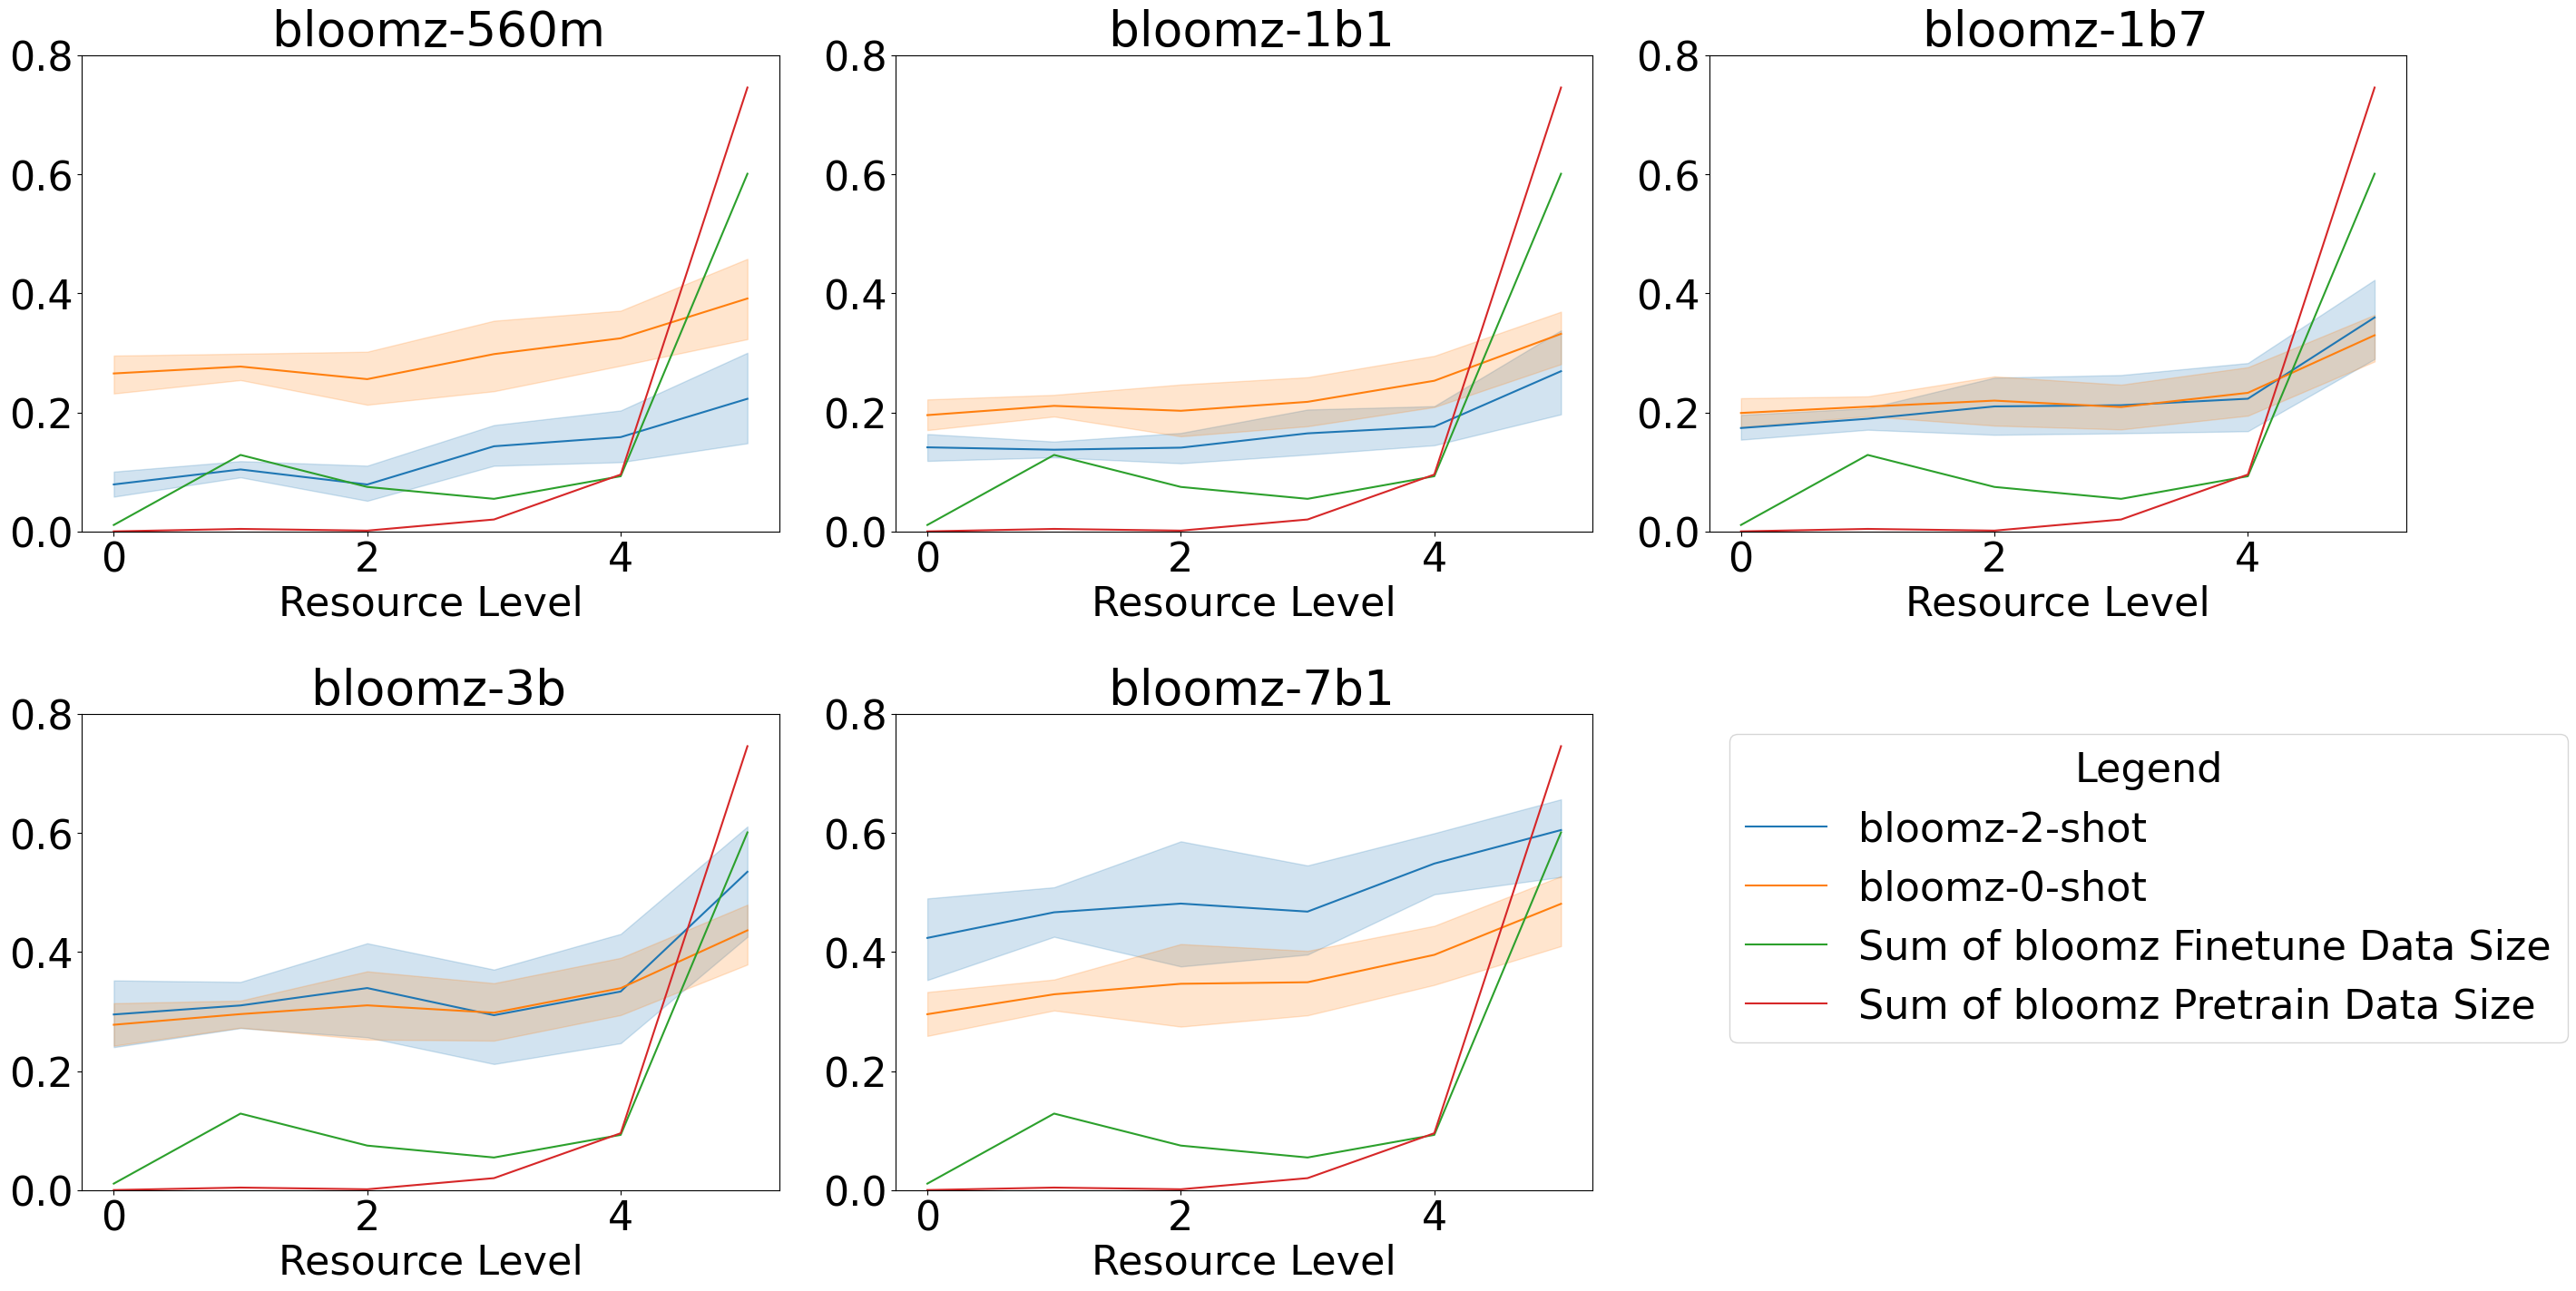

In [ ]:
bloom_vs_zero_2s(df)

# Scatter Plots

In [ ]:
import matplotlib.pyplot as plt

def scatter_f1_vs_data(df, model_name):

    if model_name == "bloom":
        x = df['BLOOM Pretrain Data']
        f1_columns = bloom_models
    elif model_name == "xglm":
        x = df['XGLM Pretrain Data']
        f1_columns = xglm_models

    plt.figure(figsize=(10, 6))


    for f1_column in f1_columns:
        y = df[f1_column]
        plt.scatter(x, y, label=f1_column[3:], linewidths=10.0)

    # plt.xlabel('Pretrain Data (%)')
    # plt.xticks(fontsize=14)
    # plt.ylabel('F1 Score')
    plt.yticks(np.arange(0.0, 0.8, 0.2))
    plt.xscale('log')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend().remove()

    # plt.legend(loc='upper left')
    # plt.grid(True)
    plt.show()

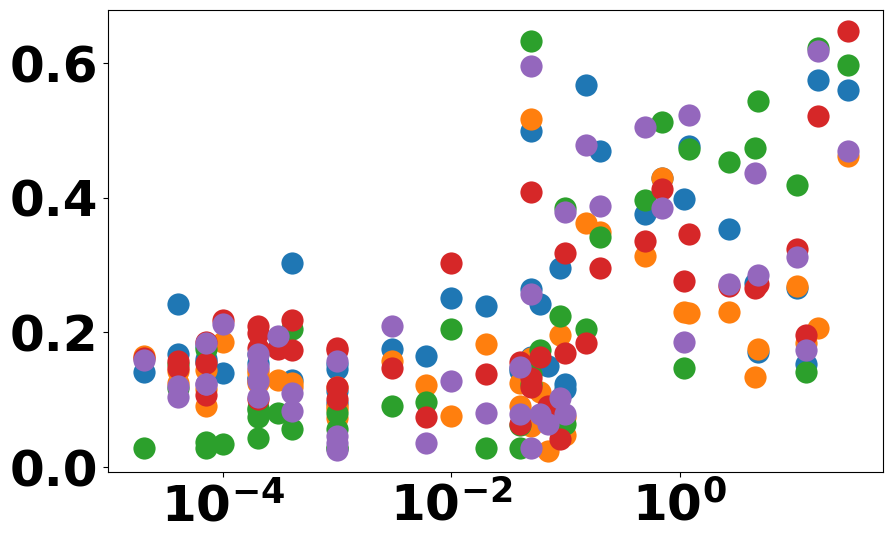

In [ ]:
scatter_f1_vs_data(df, 'bloom')

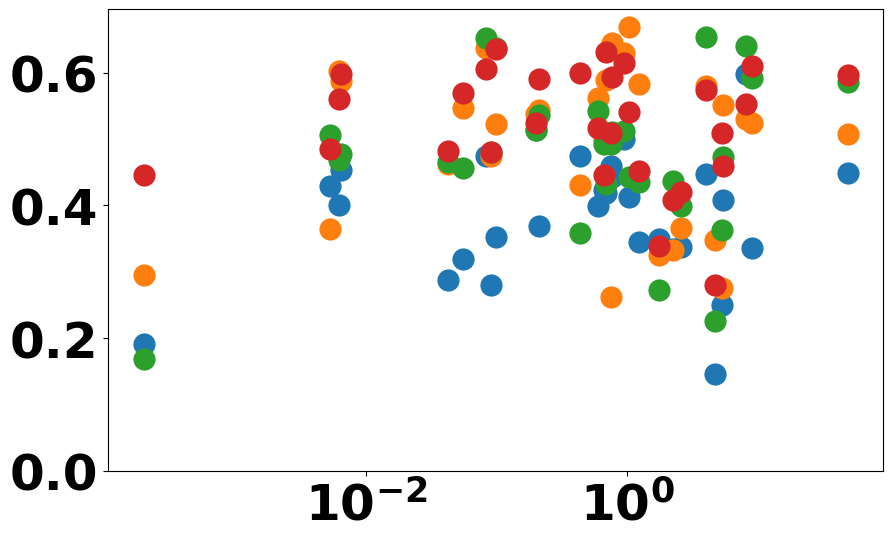

In [ ]:
scatter_f1_vs_data(df, 'xglm')

# Model size vs Datasize vs Resource level

In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


def f1_vs_model_resource(df, model_name, seen_flag, task):
    models = []
    df = df[df['Resource Level'] != "None"]
    # df = df[df['Folder Name'] == "eng_Latn"]
    # print(df["Folder Name"])

    if model_name == "bloom":
        model_name = "bloom 0-shot"
        models = bloom_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            seen_flag = "seen"
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
            seen_flag = "unseen"
        df = df.rename(columns={bloom_models[0]:0.560, bloom_models[1]:1.100, bloom_models[2]:1.700, bloom_models[3]:3.000, bloom_models[4]:7.100})
        models = [0.56, 1.1, 1.7, 3.0, 7.1]
    elif model_name == "bloomz":
        model_name = "bloomz 0-shot"
        models = bloomz_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
            seen_flag = "seen"
        elif seen_flag == 'False':
            seen_flag = "unseen"
            df = df[df['BLOOMZ Finetune Data'].isna()]
        df = df.rename(columns={bloomz_models[0]:0.560, bloomz_models[1]:1.100, bloomz_models[2]:1.700, bloomz_models[3]:3.000, bloomz_models[4]:7.100})
        models = [0.56, 1.1, 1.7, 3.0, 7.1]
    elif model_name == "xglm":
        model_name = "xglm 0-shot"
        models = xglm_models
        if seen_flag == 'True':
            seen_flag = "seen"
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            seen_flag = "unseen"
            df = df[df['XGLM Pretrain Data'].isna()]
        df = df.rename(columns={xglm_models[0]:0.564, xglm_models[1]:1.700, xglm_models[2]:2.900, xglm_models[3]:7.500})
        models = [0.564, 1.700, 2.900, 7.500]

    # 2-shots
    elif model_name == "bloom-2s":
        model_name = "bloom 2-shot"
        models = bloom_models_2s
        if seen_flag == 'True':
            seen_flag = "seen"
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            seen_flag = "unseen"
            df = df[df['BLOOM Pretrain Data'].isna()]
        df = df.rename(columns={bloom_models_2s[0]:0.560, bloom_models_2s[1]:1.100, bloom_models_2s[2]:1.700, bloom_models_2s[3]:3.000, bloom_models_2s[4]:7.100})
        models = [0.56, 1.1, 1.7, 3.0, 7.1]
    elif model_name == "xglm-2s":
        model_name = "xglm 2-shot"
        models = xglm_models_2s
        if seen_flag == 'True':
            seen_flag = "seen"
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            seen_flag = "unseen"
            df = df[df['XGLM Pretrain Data'].isna()]
        df = df.rename(columns={models[0]:0.564, models[1]:1.700, models[2]:2.900, models[3]:7.500})
        models = [0.564, 1.700, 2.900, 7.500]
    elif model_name == "bloomz-2s":
        model_name = "bloomz 2-shot"
        models = bloomz_models_2s
        if seen_flag == 'True':
            seen_flag = "seen"
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            seen_flag = "unseen"
            df = df[df['BLOOMZ Finetune Data'].isna()]
        # df = df.rename(columns={models[0]:0.564, models[1]:1.700, models[2]:2.900, models[3]:7.500})
        df = df.rename(columns={bloomz_models_2s[0]:0.560, bloomz_models_2s[1]:1.100, bloomz_models_2s[2]:1.700, bloomz_models_2s[3]:3.000, bloomz_models_2s[4]:7.100})
        models = [0.56, 1.1, 1.7, 3.0, 7.1]
    else:
        print("============ ERROR ============")
        print("Invalid model name")




    # Melt the DataFrame
    df_melted = pd.melt(df, id_vars=['Resource Level'], value_vars=models,
                            var_name='Model Names', value_name='F1 Score')

    # print(df_melted.head())

    # custom_palette = ["#e03c31", "#ff7f41", "#1d3557", "#1bb28c", "#147bd1", "#9f4cfd"]
    # custom_palette = ["#6f1711", "#c7291e", "#e86c64", "#a04efd", "#6c03e3", "#3c017e"]
    custom_palette = ["#6f1711", "#c7291e", "#ff9380", "#80cbff", "#0087e6", "#002d4d"]

    # Plotting using Seaborn
    plt.figure(figsize=(8, 5))
    # sns.lineplot(x='Model Names', y='F1 Score', hue='Resource Level', data=df_melted, marker='o', palette=custom_palette)
    sns.lineplot(x='Model Names', y='F1 Score', hue='Resource Level', data=df_melted, marker='o', palette=custom_palette, errorbar=None, linewidth=8, markersize=18)

    # Set x-axis tick labels
    plt.xticks(models)

    # Set plot labels and title
    plt.xlabel('')
    # plt.ylabel('F1 Score')
    plt.ylabel('')

    plt.title(model_name + " " + seen_flag, fontdict={'fontweight': 'bold'})

    # plt.ylim(0.0, 0.75)
    # plt.ylim(0.0, 75)
    if 'F1' in bloom_models[0]:
        plt.ylim(0.0, 0.75)
        plt.yticks(np.arange(0, 0.75, 0.2))
    else:
        plt.ylim(0.0, 70)
        plt.yticks(np.arange(0, 70, 20))

    if 'xglm' in model_name:
        plt.xticks([0.5, 1.7, 2.9, 7.5])
    elif 'bloom' in model_name:
        plt.xticks([0.5, 1.1, 1.7, 3.0, 7.1])
    # plt.xticks(fontsize=14)  # Adjust the value (12 in this case) as needed
    # plt.yticks(np.arange(0, 0.76, 0.2))
    # plt.yticks(np.arange(0, 75, 20))
    ax = plt.gca()
    ax.get_legend().remove()

    plt.savefig(f'line_plots/{model_name}_{seen_flag}_{task}.png')
    # Show the plot
    plt.show()

In [321]:
task = "class"

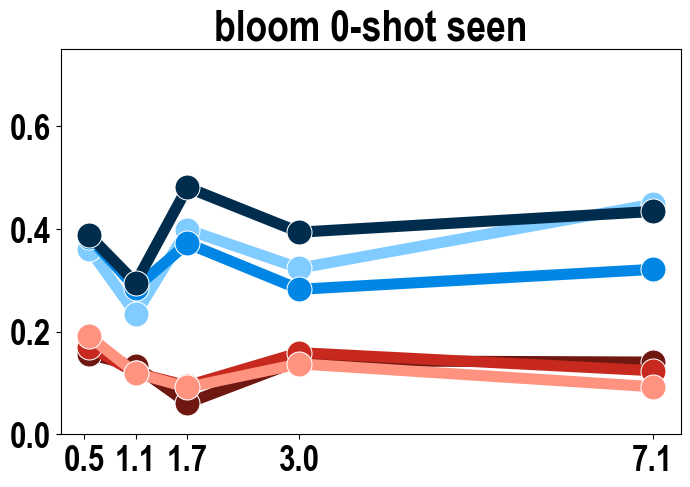

In [322]:
f1_vs_model_resource(df, model_name="bloom", seen_flag="True", task=task)

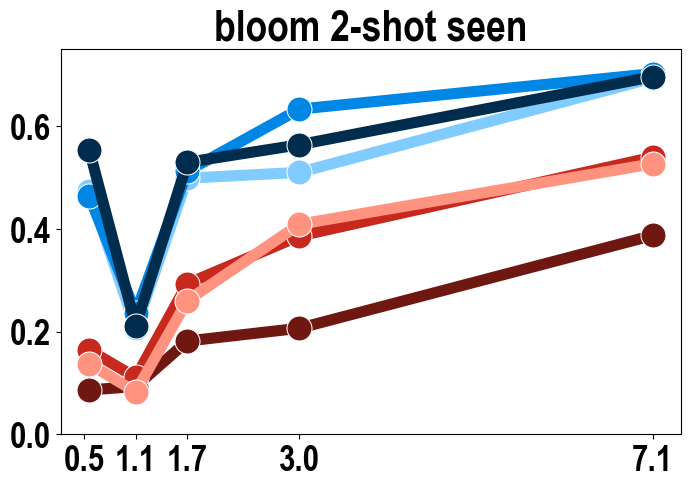

In [323]:
f1_vs_model_resource(df, model_name="bloom-2s", seen_flag="True", task=task)

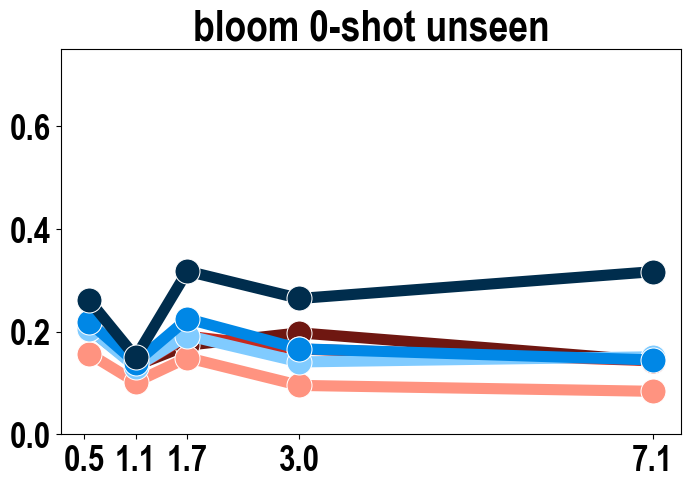

In [324]:
f1_vs_model_resource(df, model_name="bloom", seen_flag="False", task=task)

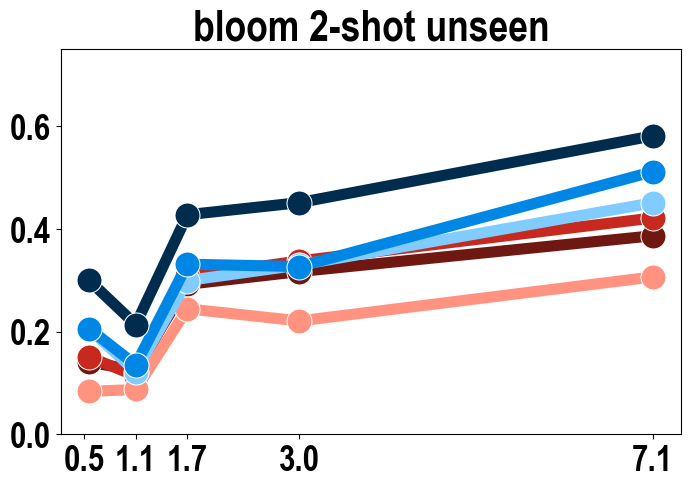

In [325]:
f1_vs_model_resource(df, model_name="bloom-2s", seen_flag="False", task=task)

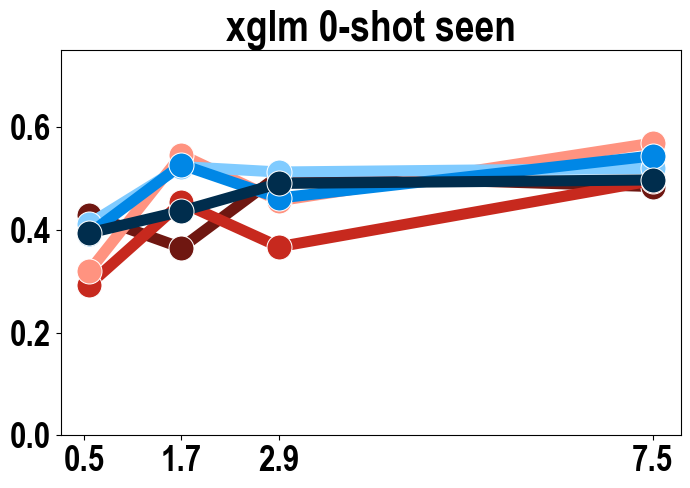

In [326]:
f1_vs_model_resource(df, model_name="xglm", seen_flag="True", task=task)

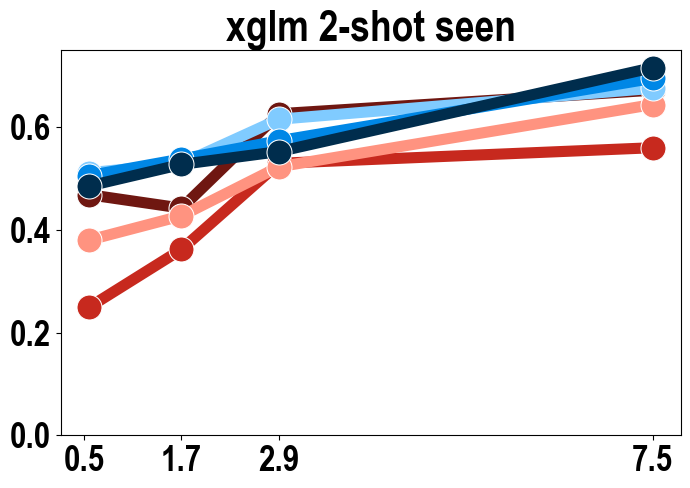

In [327]:
f1_vs_model_resource(df, model_name="xglm-2s", seen_flag="True", task=task)

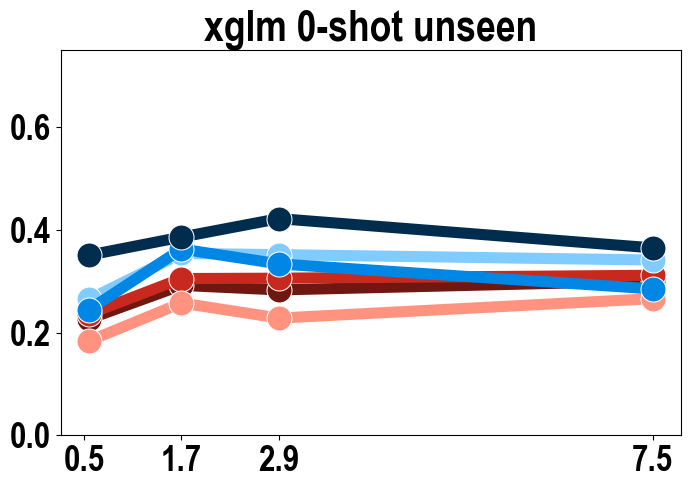

In [328]:
f1_vs_model_resource(df, model_name="xglm", seen_flag="False", task=task)

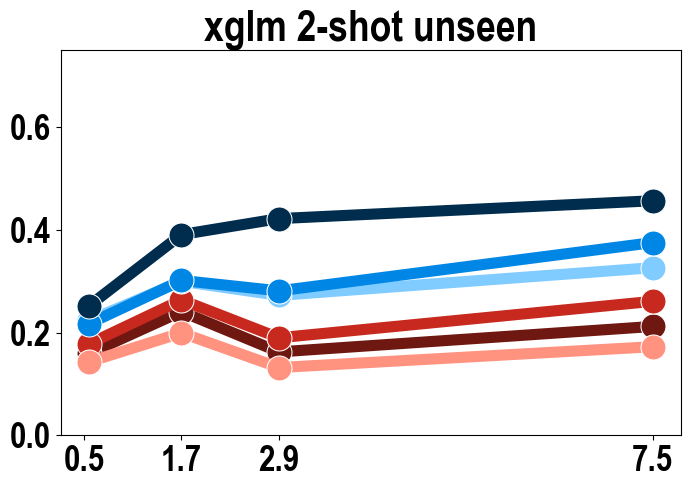

In [329]:
f1_vs_model_resource(df, model_name="xglm-2s", seen_flag="False", task=task)

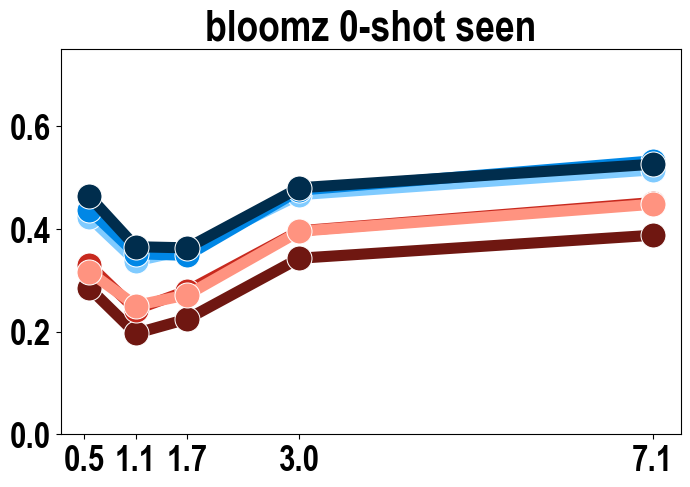

In [330]:
f1_vs_model_resource(df, model_name="bloomz", seen_flag="True", task=task)

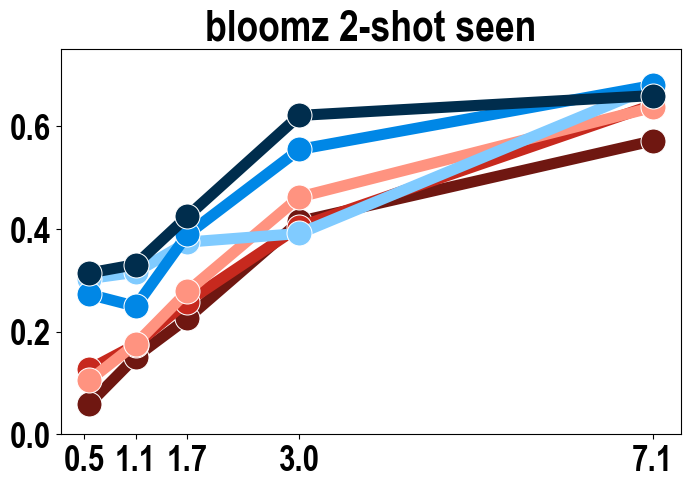

In [332]:
f1_vs_model_resource(df, model_name="bloomz-2s", seen_flag="True", task=task)

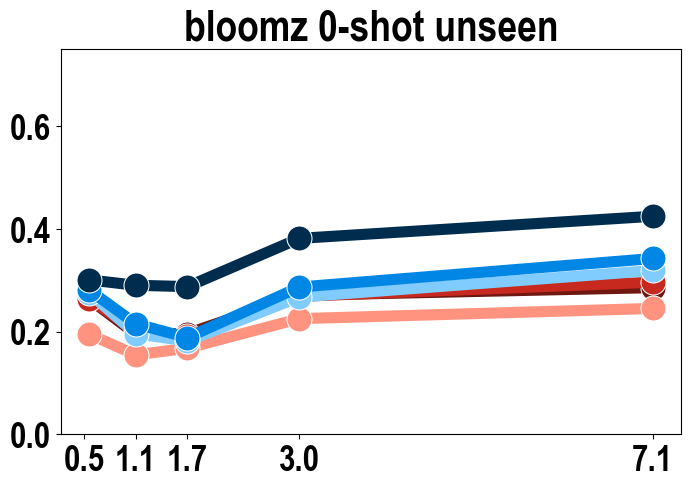

In [333]:
f1_vs_model_resource(df, model_name="bloomz", seen_flag="False", task=task)

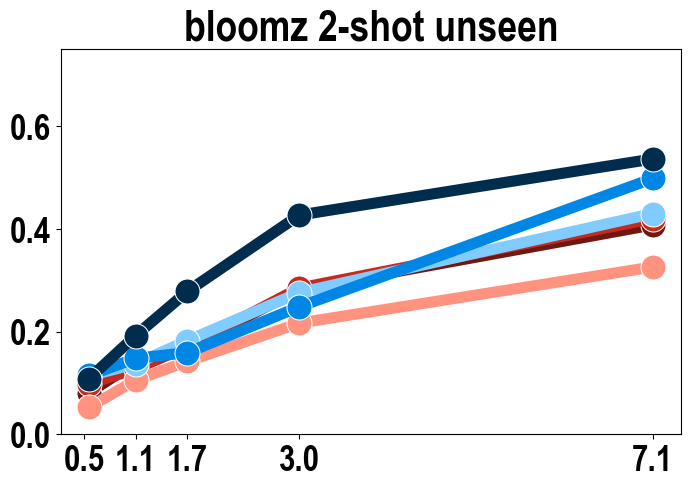

In [334]:
f1_vs_model_resource(df, model_name="bloomz-2s", seen_flag="False", task=task)

## Language Specific

In [823]:
# Language Specific

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def f1_vs_model_resource_per_lang(df, model_name, seen_flag):
    df = df[df['Resource Level'] != "None"]
    df = df[df['Folder Name'] == "eng_Latn"]
    print(df["Folder Name"])

    # if model_name == "bloom":
    # models = bloom_models
    if seen_flag == 'True':
        df_1 = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    elif seen_flag == 'False':
        df_1 = df[df['BLOOM Pretrain Data'].isna()]
    df_1 = df_1.rename(columns={bloom_models[0]:0.560, bloom_models[1]:1.100, bloom_models[2]:1.700, bloom_models[3]:3.000, bloom_models[4]:7.100})
    models_b = [0.560, 1.100, 1.700, 3.000, 7.100]

    # if model_name == "bloom-2s":
    # models = bloom_models_2s
    if seen_flag == 'True':
        df_4 = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    elif seen_flag == 'False':
        df_4 = df[df['BLOOM Pretrain Data'].isna()]
    df_4 = df_4.rename(columns={bloom_models_2s[0]:0.560, bloom_models_2s[1]:1.100, bloom_models_2s[2]:1.700, bloom_models_2s[3]:3.000, bloom_models_2s[4]:7.100})
    models_b_2s = [0.560, 1.100, 1.700, 3.000, 7.100]

    # elif model_name == "bloomz":
    # models = bloomz_models
    if seen_flag == 'True':
        df_2 = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
    elif seen_flag == 'False':
        df_2 = df[df['BLOOMZ Finetune Data'].isna()]
    df_2 = df_2.rename(columns={bloomz_models[0]:0.560, bloomz_models[1]:1.100, bloomz_models[2]:1.700, bloomz_models[3]:3.000, bloomz_models[4]:7.100})
    models_bz = [0.560, 1.100, 1.700, 3.000, 7.100]

    # elif model_name == "bloomz-2s":
    # models = bloomz_models_2s
    if seen_flag == 'True':
        df_5 = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
    elif seen_flag == 'False':
        df_5 = df[df['BLOOMZ Finetune Data'].isna()]
    df_5 = df_5.rename(columns={bloomz_models_2s[0]:0.560, bloomz_models_2s[1]:1.100, bloomz_models_2s[2]:1.700, bloomz_models_2s[3]:3.000, bloomz_models_2s[4]:7.100})
    models_bz_2s = [0.560, 1.100, 1.700, 3.000, 7.100]

    # elif model_name == "xglm":
    # models = xglm_models
    if seen_flag == 'True':
        df_3 = df.dropna(subset=['XGLM Pretrain Data'], how='any')
    elif seen_flag == 'False':
        df_3 = df[df['XGLM Pretrain Data'].isna()]
    df_3 = df_3.rename(columns={xglm_models[0]:0.564, xglm_models[1]:1.700, xglm_models[2]:2.900, xglm_models[3]:7.500})
    models_x = [0.564, 1.700, 2.900, 7.500]

    # elif model_name == "xglm-2s":
    # models_6 = xglm_models_2s
    if seen_flag == 'True':
        df_6 = df.dropna(subset=['XGLM Pretrain Data'], how='any')
    elif seen_flag == 'False':
        df_6 = df[df['XGLM Pretrain Data'].isna()]
    df_6 = df_6.rename(columns={xglm_models_2s[0]:0.564, xglm_models_2s[1]:1.700, xglm_models_2s[2]:2.900, xglm_models_2s[3]:7.500})
    models_x_2s = [0.564, 1.700, 2.900, 7.500]

    # else:
    #     print("============ ERROR ============")
    #     print("Invalid model name")


    # Melt the DataFrame
    df_melted_1 = pd.melt(df_1, id_vars=['Resource Level'], value_vars=models_b,
                            var_name='Model Names', value_name='F1 Score')
    df_melted_2 = pd.melt(df_2, id_vars=['Resource Level'], value_vars=models_bz,
                            var_name='Model Names', value_name='F1 Score')
    df_melted_3 = pd.melt(df_3, id_vars=['Resource Level'], value_vars=models_x,
                            var_name='Model Names', value_name='F1 Score')
    df_melted_4 = pd.melt(df_4, id_vars=['Resource Level'], value_vars=models_b_2s,
                            var_name='Model Names', value_name='F1 Score')
    df_melted_5 = pd.melt(df_5, id_vars=['Resource Level'], value_vars=models_bz_2s,
                            var_name='Model Names', value_name='F1 Score')
    df_melted_6 = pd.melt(df_6, id_vars=['Resource Level'], value_vars=models_x_2s,
                            var_name='Model Names', value_name='F1 Score')

    # custom_palette_1 = ["#1f78b4"]
    # custom_palette_2 = ["#33a02c"]
    # custom_palette_3 = ["#e31a1c"]
    # custom_palette = ["#e03c31", "#ff7f41", "#1d3557", "#1bb28c", "#147bd1", "#9f4cfd"]
    color_palette = ["#1DB52C", "#0bb4ff", "#e60049"]

    # Plotting using Seaborn
    plt.figure(figsize=(7.5, 7.5))
    # sns.lineplot(x='Model Names', y='F1 Score', data=df_melted_3, marker='o', color=color_palette[0], label="xglm-0s", linestyle="solid", linewidth=5, markersize=14)
    # sns.lineplot(x='Model Names', y='F1 Score', data=df_melted_1, marker='o', color=color_palette[1], label="bloom-0s", linestyle="solid", linewidth=5, markersize=14)
    # sns.lineplot(x='Model Names', y='F1 Score', data=df_melted_2, marker='o', color=color_palette[2], label="bloomz-0s", linestyle="solid", linewidth=5, markersize=14)

    sns.lineplot(x='Model Names', y='F1 Score', data=df_melted_6, marker='o', color=color_palette[0], label="xglm-2s", linestyle="solid", linewidth=5, markersize=14)
    sns.lineplot(x='Model Names', y='F1 Score', data=df_melted_4, marker='o', color=color_palette[1], label="bloom-2s", linestyle="solid", linewidth=5, markersize=14)
    sns.lineplot(x='Model Names', y='F1 Score', data=df_melted_5, marker='o', color=color_palette[2], label="bloomz-2s", linestyle="solid", linewidth=5, markersize=14)


    # Set x-axis tick labels
    plt.xticks([0.5, 1.1, 1.7, 3.0, 7.1])

    # Set plot labels and title
    plt.xlabel('')
    plt.ylabel('F1 Score')
    # plt.ylabel('')
    # plt.title('English')

    # plt.ylim(0.0, 20)
    plt.yticks(np.arange(0.2, 0.8, 0.2))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

    plt.savefig("eng_lineplots.png")
    
    # Show the plot
    plt.show()

48    eng_Latn
Name: Folder Name, dtype: object


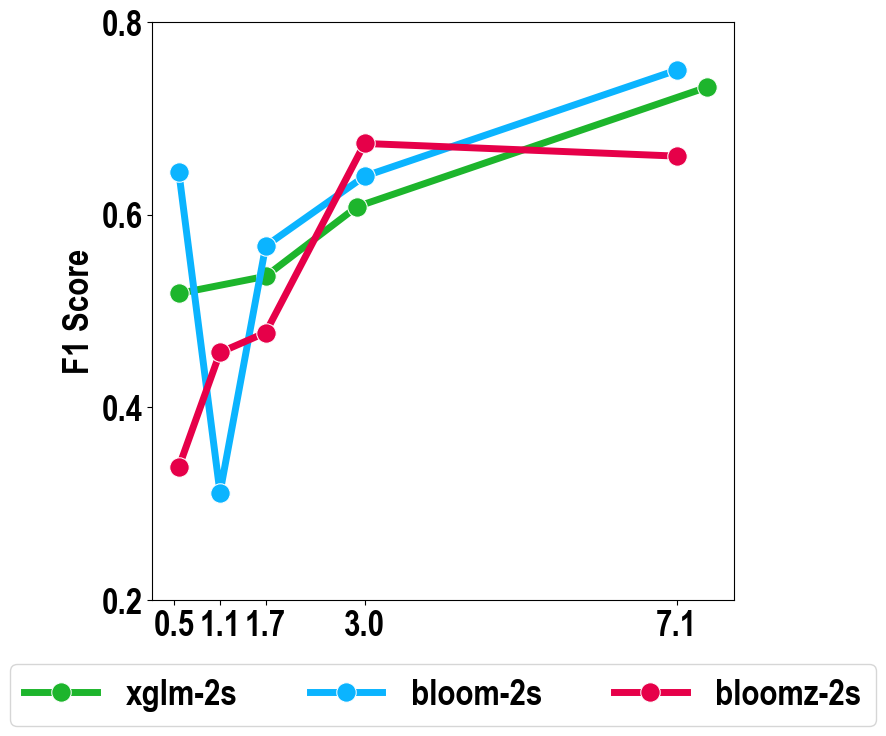

In [824]:
f1_vs_model_resource_per_lang(df, "bloom", "True")

48    eng_Latn
Name: Folder Name, dtype: object


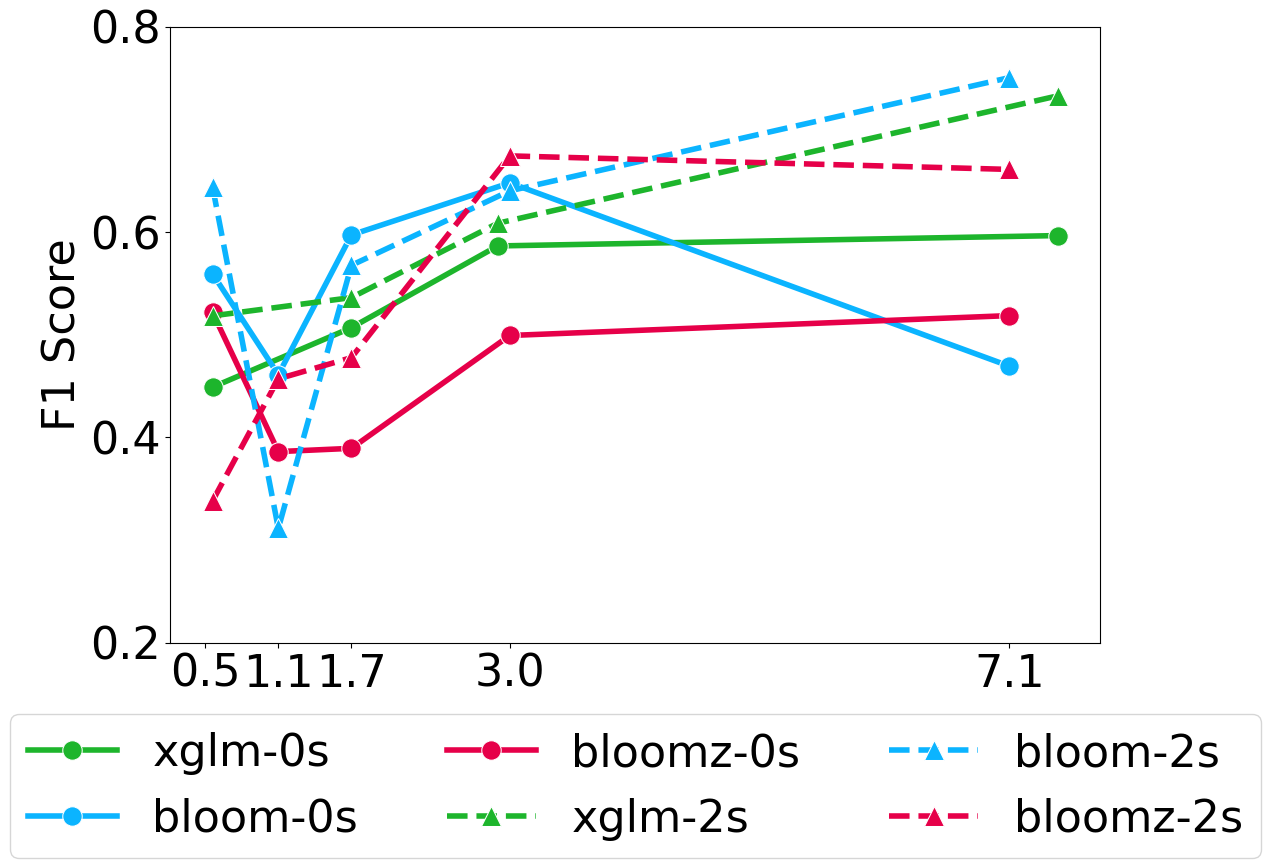

In [ ]:
f1_vs_model_resource_per_lang(df, "bloom", "True")

<ipython-input-32-c16255c490e4>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




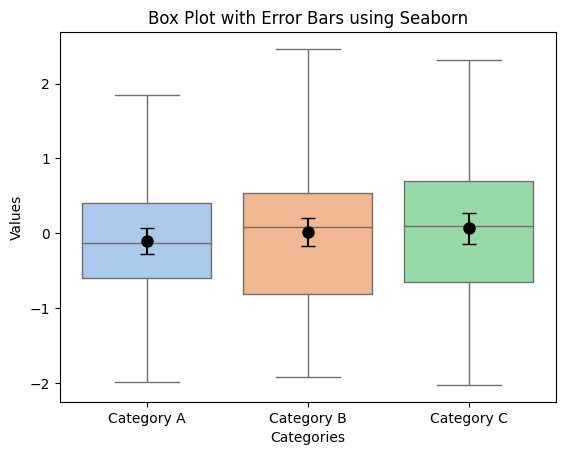

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Generating example data
np.random.seed(42)  # Setting seed for reproducibility
categories = ['Category A', 'Category B', 'Category C']
data = [np.random.normal(0, 1, 100) for _ in categories]  # Random data for each category

# Creating a DataFrame for Seaborn
df = pd.DataFrame({'Category': np.repeat(categories, 100), 'Value': np.concatenate(data)})

# Plotting the box plot using Seaborn
ax = sns.boxplot(x='Category', y='Value', data=df, showfliers=False, palette='pastel')

# Adding error bars (95% confidence intervals) manually
for i, category in enumerate(categories):
    box_data = df[df['Category'] == category]['Value']
    ci = stats.norm.interval(0.95, loc=np.mean(box_data), scale=np.std(box_data) / np.sqrt(len(box_data)))

    ax.errorbar(i, np.mean(box_data), yerr=np.diff(ci) / 2, fmt='o', color='black', markersize=8, capsize=5)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Box Plot with Error Bars using Seaborn')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def f1_vs_model_resource_vs_error_bar(df, model_name, seen_flag):
    df = df[df['Resource Level'] != "None"]

    if model_name == "bloom":
        models = bloom_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]

    elif model_name == "bloom-2s":
        models = bloom_models_2s
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]

    elif model_name == "bloomz":
        models = bloomz_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOMZ Finetune Data'].isna()]
    elif model_name == "xglm":
        models = xglm_models
        if seen_flag == 'True':
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['XGLM Pretrain Data'].isna()]
    elif model_name == "xglm-2s":
        models = xglm_models_2s
        if seen_flag == 'True':
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['XGLM Pretrain Data'].isna()]
    else:
        print("============ ERROR ============")
        print("Invalid model name")

    # if model_name == "bloom":
    #     models = bloom_models
    #     df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    # if model_name == "bloomz":
    #     models = bloomz_models
    #     df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    # if model_name == "xglm":
    #     models = xglm_models
    #     df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')

    # Melt the DataFrame to reshape it for seaborn
    df_melted = pd.melt(df, id_vars=['Resource Level'], value_vars=models,
                        var_name='Model Names', value_name='F1 Score')

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='Model Names', y='F1 Score', hue='Resource Level', data=df_melted, palette='pastel')

    # Adding error bars (95% confidence intervals) manually
    for i, model in enumerate(models):
        for j, resource_level in enumerate(df_melted['Resource Level'].unique()):
            box_data = df_melted[(df_melted['Model Names'] == model) & (df_melted['Resource Level'] == resource_level)]['F1 Score']
            ci = stats.norm.interval(0.95, loc=np.mean(box_data), scale=np.std(box_data) / np.sqrt(len(box_data)))
            # ax.errorbar(i + (j - 1) * 0.2, np.mean(box_data), yerr=np.diff(ci) / 2,
            #             fmt='o', color='black', markersize=8, capsize=5)

    # Set plot labels and title
    plt.xlabel('Model Names', fontsize=14)
    plt.ylabel('F1 Score', fontsize=14)

    flag = "seen" if seen_flag == "True" else "unseen"
    plt.title(model_name + " - " + flag)
    # plt.ylim(range(0.0, 0.85, 0.2))

    # Show the plot
    plt.show()

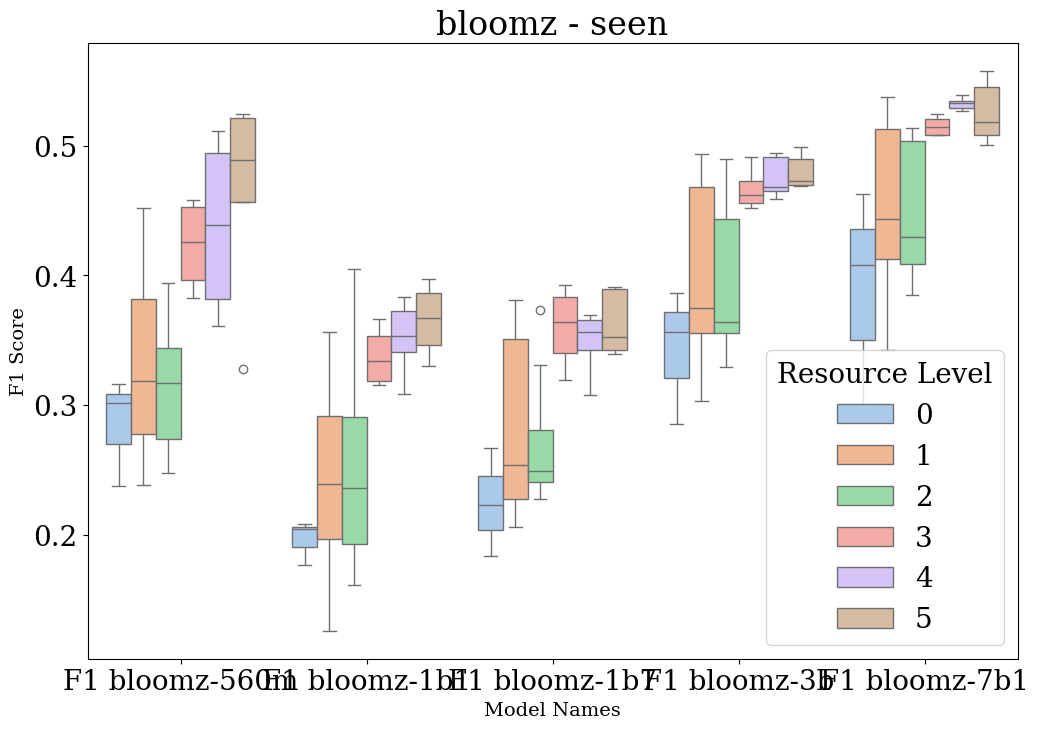

In [ ]:
f1_vs_model_resource_vs_error_bar(df, 'bloomz', 'True')

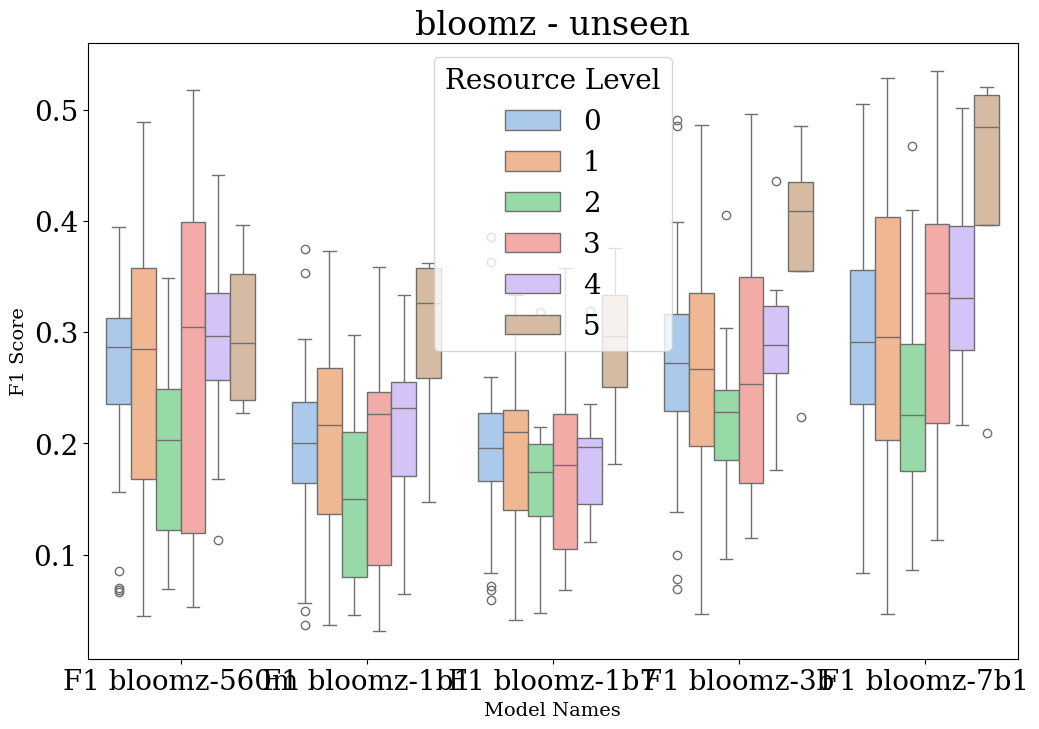

In [ ]:
f1_vs_model_resource_vs_error_bar(df, 'bloomz', 'False')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning:

invalid value encountered in multiply



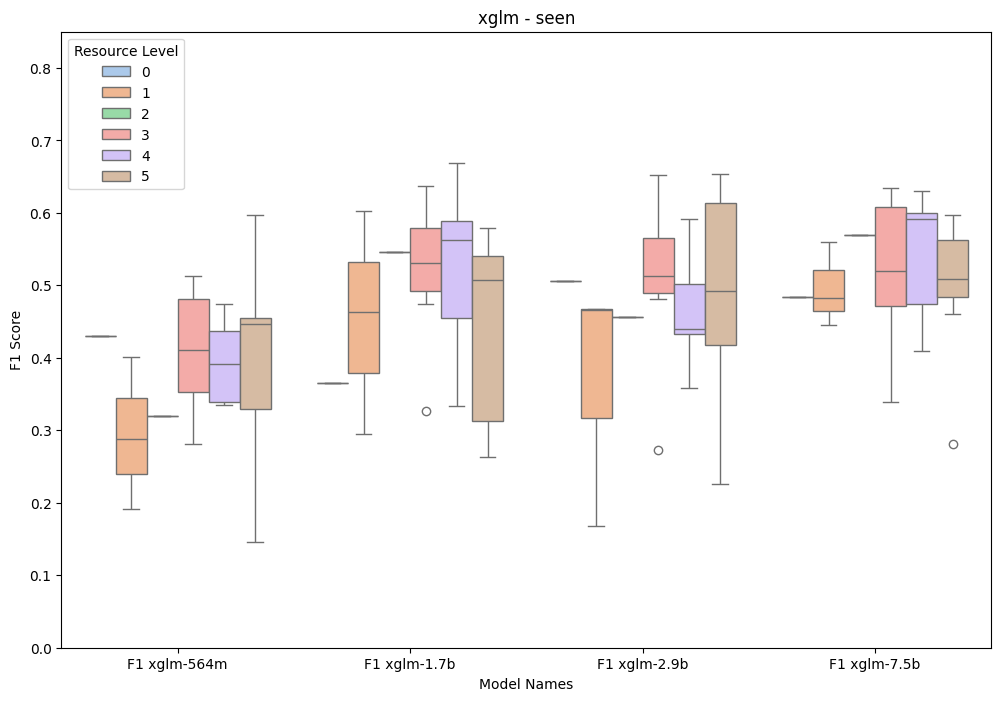

In [ ]:
# Call the function with your DataFrame and model name
f1_vs_model_resource_vs_error_bar(df, 'xglm', 'True')

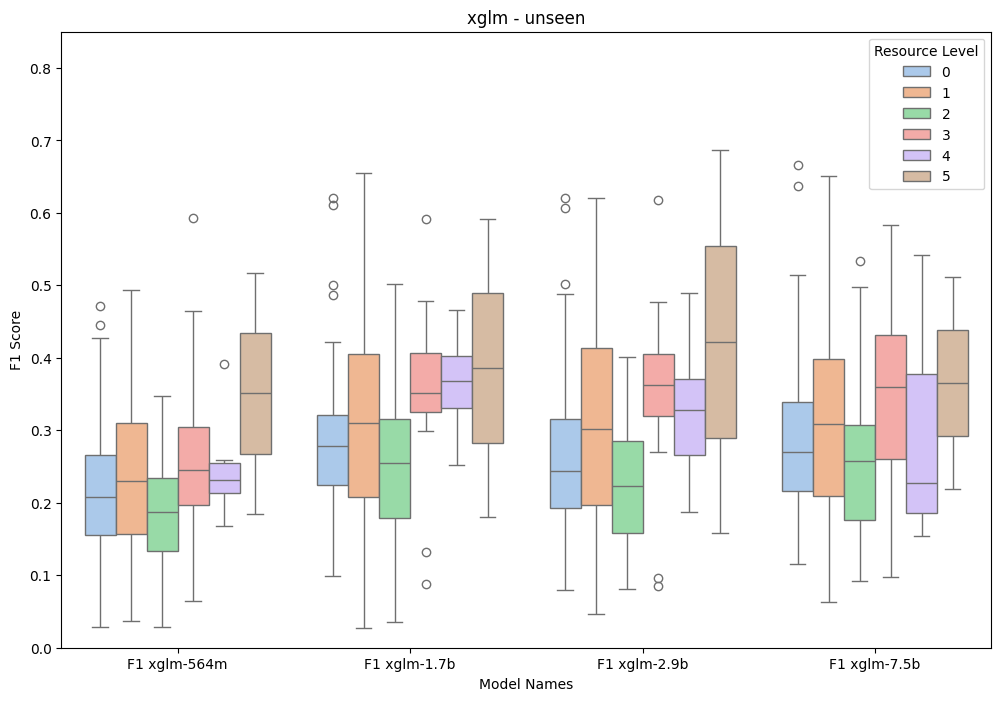

In [ ]:
# Call the function with your DataFrame and model name
f1_vs_model_resource_vs_error_bar(df, 'xglm', 'False')

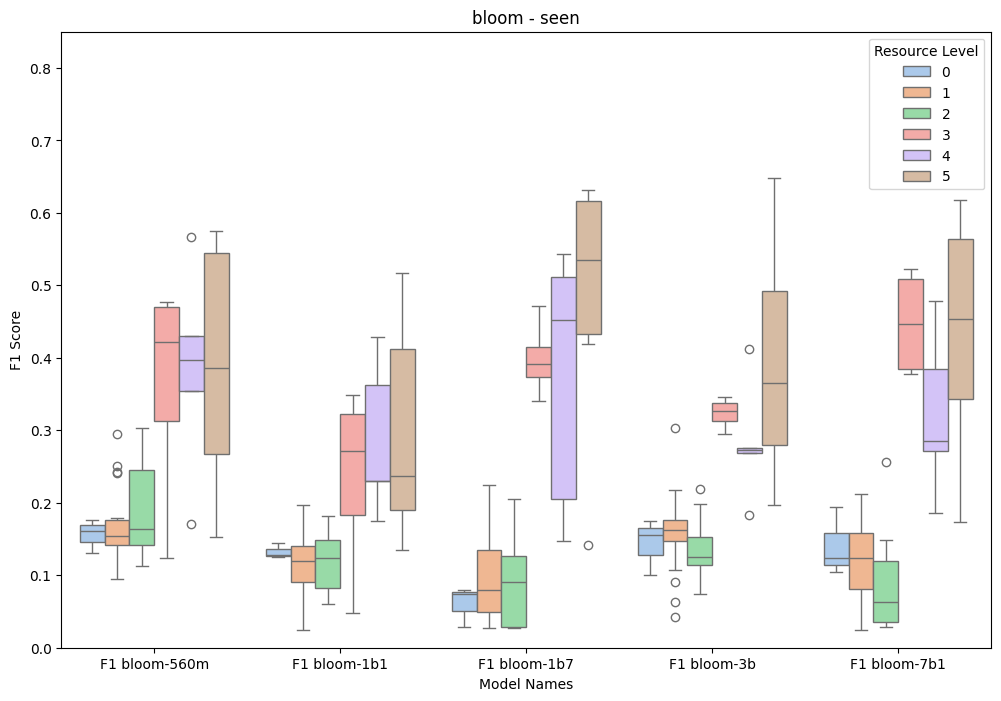

In [ ]:
# Call the function with your DataFrame and model name
f1_vs_model_resource_vs_error_bar(df, "bloom", 'True')

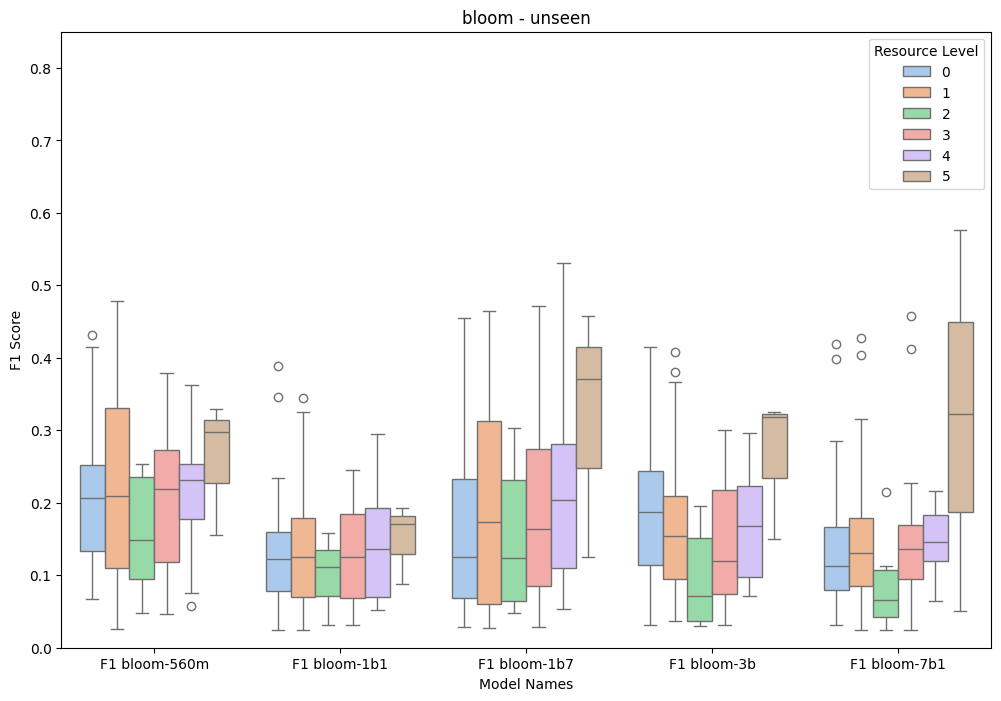

In [ ]:
# Call the function with your DataFrame and model name
f1_vs_model_resource_vs_error_bar(df, "bloom", 'False')

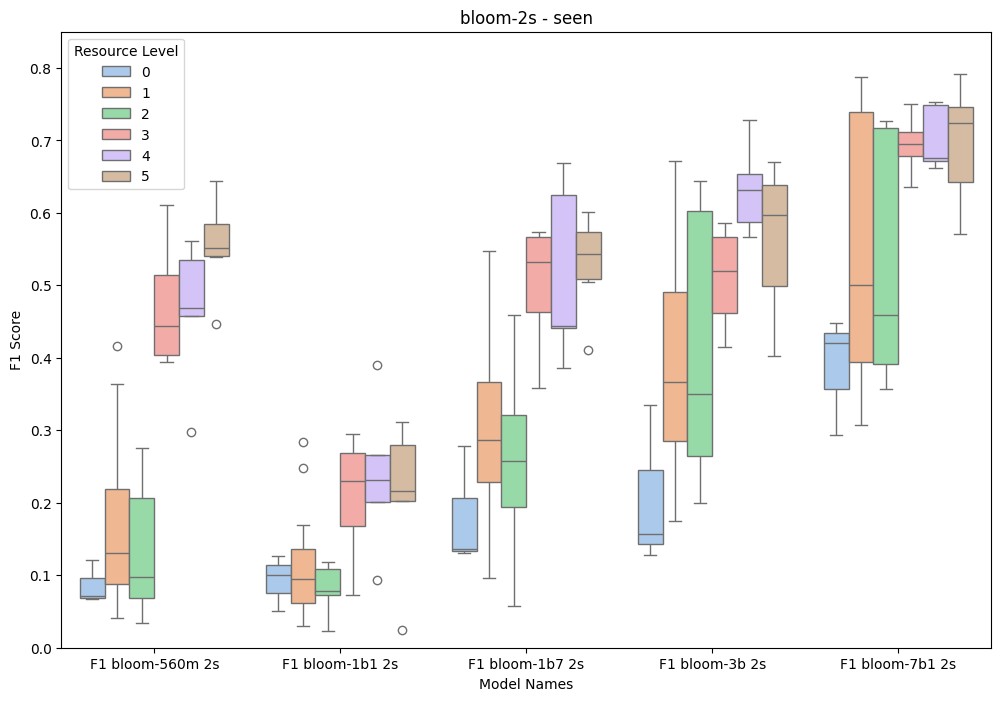

In [ ]:
# Call the function with your DataFrame and model name
f1_vs_model_resource_vs_error_bar(df, 'bloom-2s', 'True')

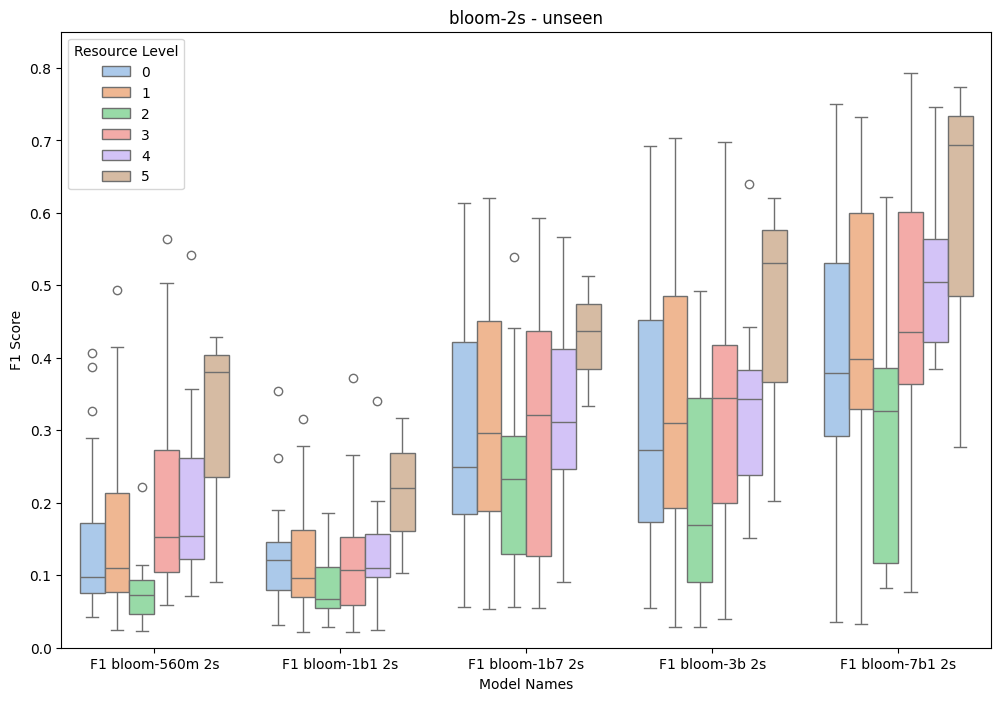

In [ ]:
# Call the function with your DataFrame and model name
f1_vs_model_resource_vs_error_bar(df, 'bloom-2s', 'False')

In [ ]:
# f1_vs_model_resource_vs_error_bar(df, 'xglm-2s', 'True')
# # f1_vs_model_resource_vs_error_bar(df, 'bloomz-2s', 'False')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def f1_vs_error_bar(df, model_name):
    if model_name == "bloom":
        models = bloom_models
        df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    if model_name == "bloomz":
        models = bloomz_models
        df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    if model_name == "xglm":
        models = xglm_models
        df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')

    melted_df = pd.melt(df, value_vars=models, var_name='Model', value_name='F1 Score')

    # Plotting boxplots with error bars using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Model', y='F1 Score', data=melted_df, showfliers=False, notch=True)
    plt.title('Boxplot with Error Bars for F1 Scores')
    plt.xlabel('Models')
    plt.ylabel('F1 Score')

    # Adding error bars using seaborn's pointplot
    sns.pointplot(x='Model', y='F1 Score', data=melted_df, errorbar='sd', color='black', capsize=0.1)

    plt.show()

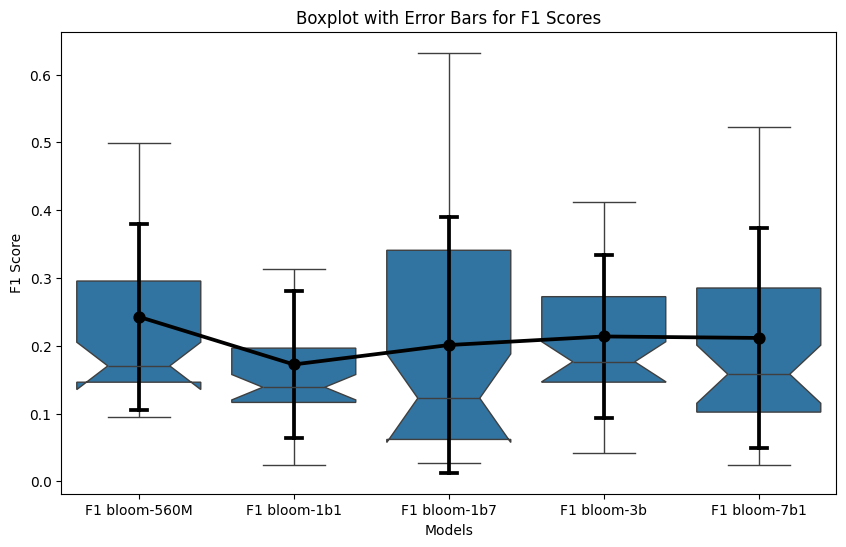

In [ ]:
f1_vs_error_bar(df, "bloom")

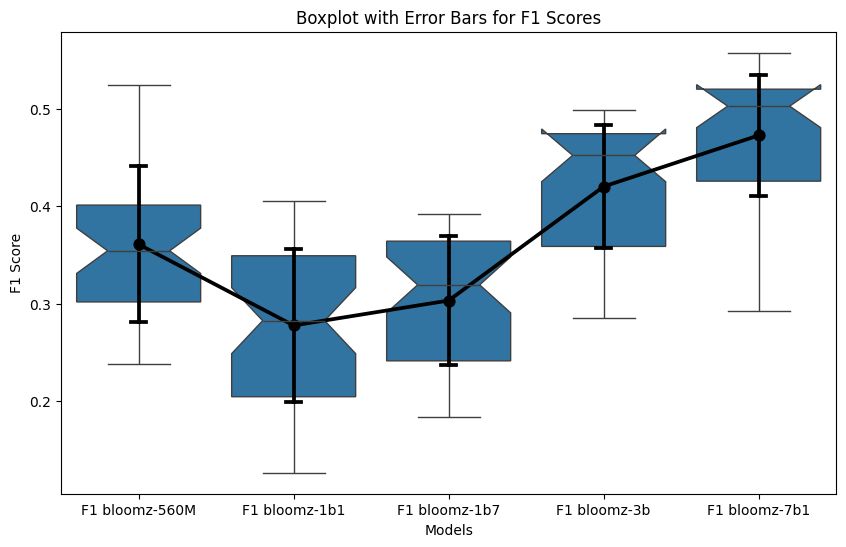

In [ ]:
f1_vs_error_bar(df, "bloomz")

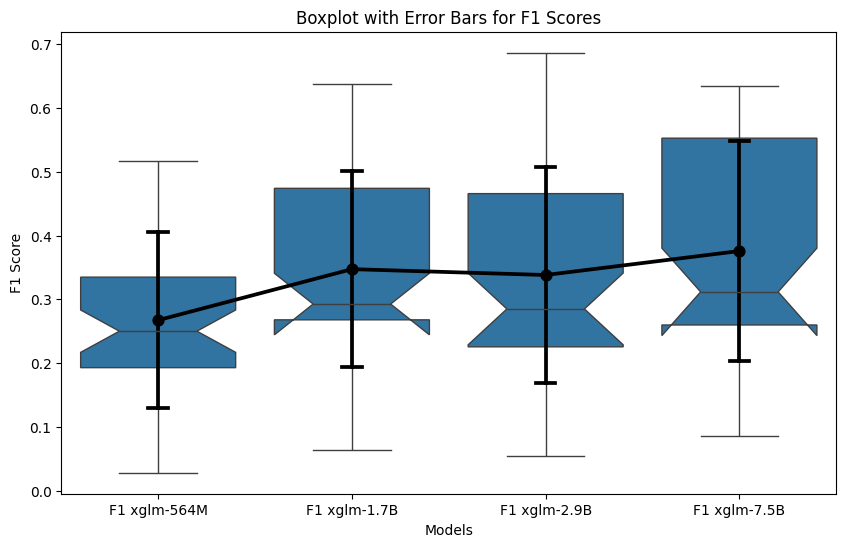

In [ ]:
f1_vs_error_bar(df, "xglm")

# F1 vs Model sizes

## Zero-shot

In [724]:
# All in one place

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data(df, model_name, seen_flag):

    if model_name == "bloom":
        # models = bloom_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            model_name = model_name + "-seen 0s"
            # model_name = model_name + "-seen"
        elif seen_flag == 'False':
            model_name = model_name + "-unseen 0s"
            # model_name = model_name + "-unseen"
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name + "-all 0s"
            # model_name = model_name + "-all"
            pass
        df = df[bloom_models]
        df = df.rename(columns={bloom_models[0]:0.56, bloom_models[1]:1.1, bloom_models[2]:1.7, bloom_models[3]:3.0, bloom_models[4]:7.1})

    elif model_name == "bloomz":
        # models = bloomz_models
        if seen_flag == 'True':
            model_name = model_name + "-seen 0s"
            # model_name = model_name + "-seen"
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            model_name = model_name + "-unseen 0s"
            # model_name = model_name + "-unseen"
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name + "-all 0s"
            # model_name = model_name + "-all"
            pass
        df = df[bloomz_models]
        df = df.rename(columns={bloomz_models[0]:0.56, bloomz_models[1]:1.1, bloomz_models[2]:1.7, bloomz_models[3]:3.0, bloomz_models[4]:7.1})

    elif model_name == "xglm":
        # models = xglm_models
        if seen_flag == 'True':
            model_name = model_name + "-seen 0s"
            # model_name = model_name + "-seen"
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            model_name = model_name + "-unseen 0s"
            # model_name = model_name + "-unseen"
            df = df[df['XGLM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name + "-all 0s"
            # model_name = model_name + "-all"
            pass
        df = df[xglm_models]
        df = df.rename(columns={xglm_models[0]:0.564, xglm_models[1]:1.70, xglm_models[2]:2.90, xglm_models[3]:7.50})


    df = df.transpose().reset_index()
    df.columns = ['Model Size'] + list(range(df.shape[1]-1))

    # Create a new column for model type
    df['Model Type'] = model_name

    # Melt the DataFrame to combine columns
    df_melted = pd.melt(df, id_vars=['Model Size', 'Model Type'], var_name='Value')

    return df_melted

def f1_vs_modelsize_all(df):

    seen_flag = "True"
    df_melted_1 = prepare_data(df, "bloom", seen_flag)
    df_melted_2 = prepare_data(df, "bloomz", seen_flag)
    df_melted_4 = prepare_data(df, "xglm", seen_flag)

    seen_flag = "False"
    df_melted_5 = prepare_data(df, "bloom", seen_flag)
    df_melted_6 = prepare_data(df, "bloomz", seen_flag)
    df_melted_8 = prepare_data(df, "xglm", seen_flag)

    seen_flag = "All"
    df_melted_9 = prepare_data(df, "bloom", seen_flag)
    df_melted_10 = prepare_data(df, "bloomz", seen_flag)
    df_melted_12 = prepare_data(df, "xglm", seen_flag)

    # Combine all melted DataFrames
    df_combined_1 = pd.concat([df_melted_1, df_melted_2, df_melted_4])
    df_combined_2 = pd.concat([df_melted_5, df_melted_6, df_melted_8])
    df_combined_3 = pd.concat([df_melted_9, df_melted_10, df_melted_12])


    legend_items_1 = sorted(df_combined_1['Model Type'].unique(), reverse=True)
    legend_items_1[1], legend_items_1[2] = legend_items_1[2], legend_items_1[1]

    legend_items_2 = sorted(df_combined_2['Model Type'].unique(), reverse=True)
    legend_items_2[1], legend_items_2[2] = legend_items_2[2], legend_items_2[1]

    legend_items_3 = sorted(df_combined_3['Model Type'].unique(), reverse=True)
    legend_items_3[1], legend_items_3[2] = legend_items_3[2], legend_items_3[1]

    # color_palette = ["mediumblue", 'green', 'red']
    # color_palette = ["#E869B6", "#6977E8", "#1DB52C"]
    color_palette = ["#1DB52C", "#0bb4ff", "#e60049"]

    plt.figure(figsize=(7, 7))

    # df_combined_1.to_csv("0s-seen-generation.csv", index=False)
    # df_combined_2.to_csv("0s-unseen-generation.csv", index=False)

    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_1, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_1, linewidth=5,  markersize=14, errorbar=None)
    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_2, palette=color_palette, marker='o', linestyle='dotted', hue_order=legend_items_2, linewidth=5, markersize=14, errorbar=None)
    # sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_3, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_3, linewidth=4, markersize=14, errorbar=None)

    if 'F1' in bloom_models[0]:
        plt.ylim(0.0, 0.75)
        plt.yticks(np.arange(0, 0.75, 0.2))
    else:
        plt.ylim(0.0, 70)
        plt.yticks(np.arange(0, 70, 20))

    plt.xticks([0.5, 1.1, 1.7, 3.0, 7.1])
    # plt.xticks(fontsize=16)  # Adjust the value (12 in this case) as needed
    # plt.yticks(np.arange(0, 0.76, 0.2))
    # plt.yticks(np.arange(0, 70, 20))

    # # Get the current axes
    ax = plt.gca()
    plt.title("0-shot", fontdict={'fontweight': 'bold'})
    # plt.title("0-shot")
    plt.ylabel('SacreBLEU')
    plt.xlabel('')
    # plt.xscale('log')

    # ax.get_legend().remove()

    # # Move the legend outside the box using bbox_to_anchor
    # ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.savefig('zs-gen.png')

    plt.show()

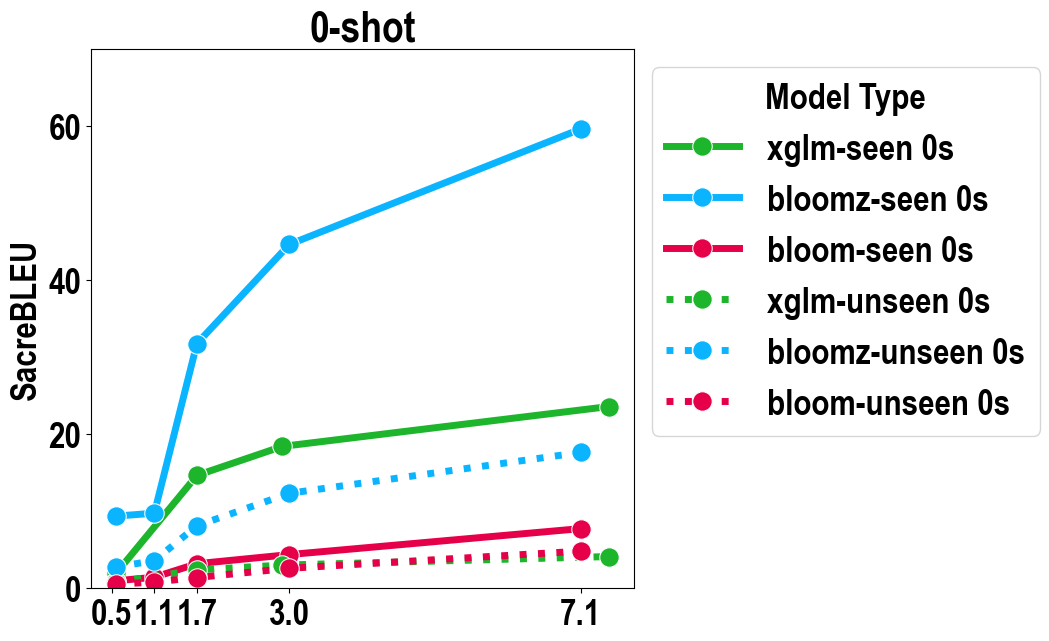

In [725]:
f1_vs_modelsize_all(df)

## 2-shot

In [794]:
# All in one place

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data_2s(df, model_name, seen_flag):

    if model_name == "bloom-2s":
        models = bloom_models_2s
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            model_name = model_name[:-3] + "-seen 2s"
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"

        df = df[bloom_models_2s]
        df = df.rename(columns={bloom_models_2s[0]:0.560, bloom_models_2s[1]:1.100, bloom_models_2s[2]:1.700, bloom_models_2s[3]:3.000, bloom_models_2s[4]:7.100})

    elif model_name == "bloom-2s":
        models = bloom_models_2s
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            model_name = model_name[:-3] + "-seen 2s"
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"

        df = df[bloom_models_2s]
        df = df.rename(columns={bloom_models_2s[0]:0.560, bloom_models_2s[1]:1.100, bloom_models_2s[2]:1.700, bloom_models_2s[3]:3.000, bloom_models_2s[4]:7.100})

    elif model_name == "bloomz-2s":
        models = bloomz_models_2s
        if seen_flag == 'True':
            model_name = model_name[:-3] + "-seen 2s"
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['BLOOMZ Finetune Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"

        df = df[bloomz_models_2s]
        # df = df.rename(columns={bloomz_models_2s[0]:0.560, bloomz_models_2s[1]:1.100, bloomz_models_2s[2]:1.700, bloomz_models_2s[3]:3.000, bloomz_models_2s[4]:7.100})
        df = df.rename(columns={bloomz_models_2s[0]:0.560, bloomz_models_2s[1]:1.100, bloomz_models_2s[2]:1.700, bloomz_models_2s[3]:3.000, bloomz_models_2s[4]:7.100})

    elif model_name == "xglm-2s":
        models = xglm_models_2s
        if seen_flag == 'True':
            model_name = model_name[:-3] + "-seen 2s"
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['XGLM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"
            # pass
        df = df[xglm_models_2s]
        df = df.rename(columns={xglm_models_2s[0]:0.564, xglm_models_2s[1]:1.700, xglm_models_2s[2]:2.900, xglm_models_2s[3]:7.500})


    df = df.transpose().reset_index()
    df.columns = ['Model Size'] + list(range(df.shape[1]-1))

    # Create a new column for model type
    df['Model Type'] = model_name

    # Melt the DataFrame to combine columns
    df_melted = pd.melt(df, id_vars=['Model Size', 'Model Type'], var_name='Value')

    return df_melted


def f1_vs_modelsize_all_2s(df):
    #  # ------- 0-shot -------
    # seen_flag = "True"
    # df_melted_1 = prepare_data(df, "bloom", seen_flag)
    # df_melted_2 = prepare_data(df, "bloomz", seen_flag)
    # df_melted_4 = prepare_data(df, "xglm", seen_flag)

    # seen_flag = "False"
    # df_melted_5 = prepare_data(df, "bloom", seen_flag)
    # df_melted_6 = prepare_data(df, "bloomz", seen_flag)
    # df_melted_8 = prepare_data(df, "xglm", seen_flag)

    # seen_flag = "All"
    # df_melted_9 = prepare_data(df, "bloom", seen_flag)
    # df_melted_10 = prepare_data(df, "bloomz", seen_flag)
    # df_melted_12 = prepare_data(df, "xglm", seen_flag)
    
    # # ------- 2-shot -------
    # seen_flag = "True"
    # df_melted_1 = prepare_data_2s(df, "bloom-2s", seen_flag)
    # df_melted_2 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_4 = prepare_data_2s(df, "xglm-2s", seen_flag)

    # seen_flag = "False"
    # df_melted_5 = prepare_data_2s(df, "bloom-2s", seen_flag)
    # df_melted_6 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_8 = prepare_data_2s(df, "xglm-2s", seen_flag)

    # seen_flag = "All"
    # df_melted_9 = prepare_data_2s(df, "bloom-2s", seen_flag)
    # df_melted_10 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_12 = prepare_data_2s(df, "xglm-2s", seen_flag)
    # # ----------------------

    # # ------- 2-shot generation task (without bloomz and all)-------
    # seen_flag = "True"
    # df_melted_1 = prepare_data_2s(df, "bloom-2s", seen_flag)
    # # df_melted_2 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_4 = prepare_data_2s(df, "xglm-2s", seen_flag)

    # seen_flag = "False"
    # df_melted_5 = prepare_data_2s(df, "bloom-2s", seen_flag)
    # # df_melted_6 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_8 = prepare_data_2s(df, "xglm-2s", seen_flag)

    # seen_flag = "All"
    # df_melted_9 = prepare_data_2s(df, "bloom-2s", seen_flag)
    # # df_melted_10 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_12 = prepare_data_2s(df, "xglm-2s", seen_flag)

    # ------- 0-shot generation task (without bloomz and all)-------
    seen_flag = "True"
    df_melted_1 = prepare_data(df, "bloom", seen_flag)
    # df_melted_2 = prepare_data(df, "bloomz", seen_flag)
    df_melted_4 = prepare_data(df, "xglm", seen_flag)

    seen_flag = "False"
    df_melted_5 = prepare_data(df, "bloom", seen_flag)
    # df_melted_6 = prepare_data(df, "bloomz", seen_flag)
    df_melted_8 = prepare_data(df, "xglm", seen_flag)

    seen_flag = "All"
    df_melted_9 = prepare_data(df, "bloom", seen_flag)
    # df_melted_10 = prepare_data(df, "bloomz", seen_flag)
    df_melted_12 = prepare_data(df, "xglm", seen_flag)
    # ----------------------


    # ---------
    # seen_flag = "True"
    # df_melted_1 = prepare_data(df, "bloom", seen_flag)
    # # df_melted_2 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_4 = prepare_data(df, "xglm", seen_flag)

    # seen_flag = "False"
    # df_melted_5 = prepare_data(df, "bloom", seen_flag)
    # # df_melted_6 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_8 = prepare_data(df, "xglm", seen_flag)

    # seen_flag = "All"
    # df_melted_9 = prepare_data(df, "bloom", seen_flag)
    # # df_melted_10 = prepare_data_2s(df, "bloomz-2s", seen_flag)
    # df_melted_12 = prepare_data(df, "xglm", seen_flag)
    # ---------



    # df_combined_1 = pd.concat([df_melted_1, df_melted_2, df_melted_4])
    # df_combined_2 = pd.concat([df_melted_5, df_melted_6, df_melted_8])
    # df_combined_3 = pd.concat([df_melted_9, df_melted_10, df_melted_12])

    df_combined_1 = pd.concat([df_melted_1, df_melted_4])
    df_combined_2 = pd.concat([df_melted_5, df_melted_8])
    df_combined_3 = pd.concat([df_melted_9, df_melted_12])

    legend_items_1 = sorted(df_combined_1['Model Type'].unique(), reverse=True)
    # legend_items_1[1], legend_items_1[2] = legend_items_1[2], legend_items_1[1]
    legend_items_2 = sorted(df_combined_2['Model Type'].unique(), reverse=True)
    # legend_items_2[1], legend_items_2[2] = legend_items_2[2], legend_items_2[1]
    # legend_items_3 = sorted(df_combined_3['Model Type'].unique(), reverse=True)
    # # legend_items_3[1], legend_items_3[2] = legend_items_3[2], legend_items_3[1]



    color_palette = ["#1DB52C", "#0bb4ff", "#e60049"]
    # color_palette = ["#ff1a87", "#011db1"]

    plt.figure(figsize=(7, 7))

    # df_combined_1.to_csv("2s-seen-generation.csv", index=False)
    # df_combined_2.to_csv("2s-unseen-generation.csv", index=False)


    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_1, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_1, linewidth=5, markersize=14, errorbar=None)
    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_2, palette=color_palette, marker='o', linestyle='dotted', hue_order=legend_items_2, linewidth=5, markersize=14, errorbar=None)
    # sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_3, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_3, linewidth=4, markersize=14, errorbar=None)

    plt.title("0-shot", fontdict={'fontweight': 'bold'})
    # plt.title("2-shot")
    plt.ylabel("SacreBLEU Score")
    plt.xlabel("# of parameters (in billions)")

    if 'F1' in bloom_models[0]:
        plt.ylim(0.0, 0.75)
        plt.yticks(np.arange(0, 0.75, 0.2))
    else:
        plt.ylim(0.0, 70)
        plt.yticks(np.arange(0, 70, 20))

    plt.xticks([.5, 1.1, 1.7, 3.0, 7.1])
    # plt.xticks(fontsize=16)  # Adjust the value (12 in this case) as needed
    # plt.yticks()


    # # Get the current axes
    ax = plt.gca()

    # # Move the legend outside the box using bbox_to_anchor
    # ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.legend(title='Model')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # ax.legend().remove()
    # sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.savefig('2s-gen.png')
    plt.show()


/var/folders/bp/3svr9j5n4cq63mz4j2lb22x00000gn/T/ipykernel_6593/940770429.py:192: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

/var/folders/bp/3svr9j5n4cq63mz4j2lb22x00000gn/T/ipykernel_6593/940770429.py:193: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



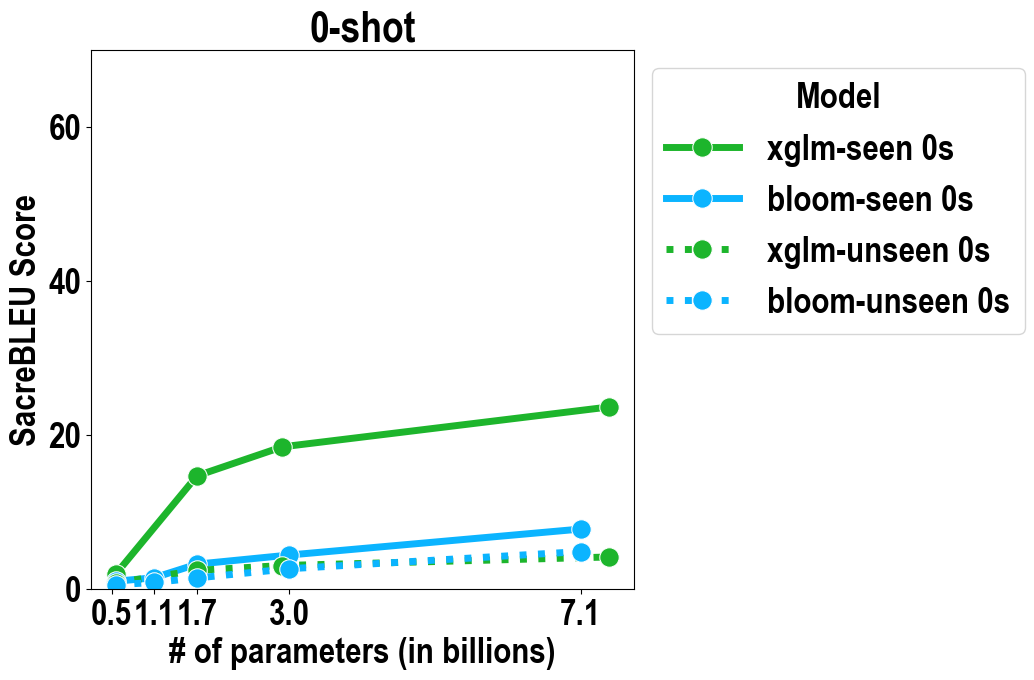

In [795]:
f1_vs_modelsize_all_2s(df)

<Figure size 1000x600 with 0 Axes>

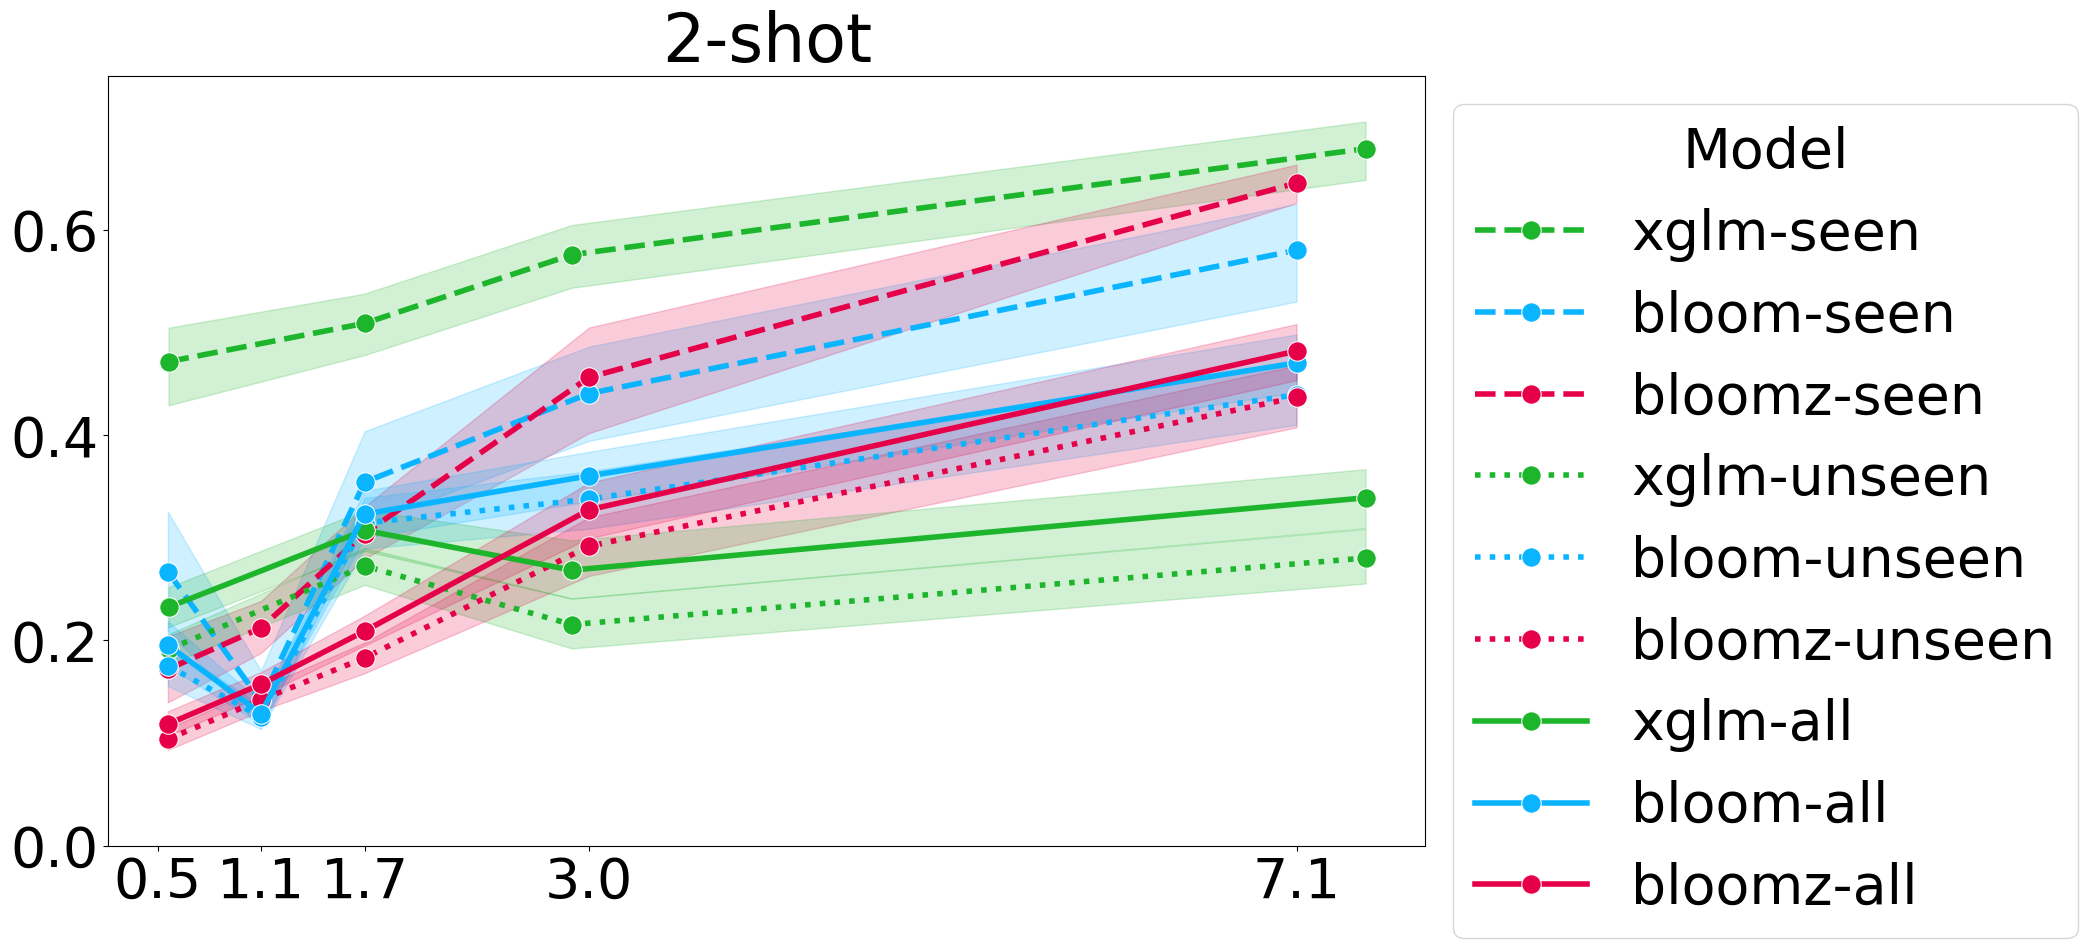

In [ ]:
f1_vs_modelsize_all_2s(df)

## Bloomz - generation

In [802]:
# All in one place

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data_2s(df, model_name, seen_flag):

    if model_name == "bloom-2s":
        models = bloom_models_2s
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            model_name = model_name[:-3] + "-seen 2s"
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"

        df = df[bloom_models_2s]
        df = df.rename(columns={bloom_models_2s[0]:0.560, bloom_models_2s[1]:1.100, bloom_models_2s[2]:1.700, bloom_models_2s[3]:3.000, bloom_models_2s[4]:7.100})

    elif model_name == "bloom-2s":
        models = bloom_models_2s
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            model_name = model_name[:-3] + "-seen 2s"
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"

        df = df[bloom_models_2s]
        df = df.rename(columns={bloom_models_2s[0]:0.560, bloom_models_2s[1]:1.100, bloom_models_2s[2]:1.700, bloom_models_2s[3]:3.000, bloom_models_2s[4]:7.100})

    elif model_name == "bloomz-2s":
        models = bloomz_models_2s
        if seen_flag == 'True':
            model_name = model_name[:-3] + "-seen 2s"
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['BLOOMZ Finetune Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"

        df = df[bloomz_models_2s]
        # df = df.rename(columns={bloomz_models_2s[0]:0.560, bloomz_models_2s[1]:1.100, bloomz_models_2s[2]:1.700, bloomz_models_2s[3]:3.000, bloomz_models_2s[4]:7.100})
        df = df.rename(columns={bloomz_models_2s[0]:0.560, bloomz_models_2s[1]:1.100, bloomz_models_2s[2]:1.700, bloomz_models_2s[3]:3.000, bloomz_models_2s[4]:7.100})

    elif model_name == "xglm-2s":
        models = xglm_models_2s
        if seen_flag == 'True':
            model_name = model_name[:-3] + "-seen 2s"
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            model_name = model_name[:-3] + "-unseen 2s"
            df = df[df['XGLM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            model_name = model_name[:-3] + "-all 2s"
            # pass
        df = df[xglm_models_2s]
        df = df.rename(columns={xglm_models_2s[0]:0.564, xglm_models_2s[1]:1.700, xglm_models_2s[2]:2.900, xglm_models_2s[3]:7.500})


    df = df.transpose().reset_index()
    df.columns = ['Model Size'] + list(range(df.shape[1]-1))

    # Create a new column for model type
    df['Model Type'] = model_name

    # Melt the DataFrame to combine columns
    df_melted = pd.melt(df, id_vars=['Model Size', 'Model Type'], var_name='Value')

    return df_melted


def f1_vs_modelsize_all_bloomz(df):

    # ------- bloomz-only -------
    seen_flag = "True"
    df_melted_1 = prepare_data(df, "bloomz", seen_flag)
    df_melted_4 = prepare_data_2s(df, "bloomz-2s", seen_flag)

    seen_flag = "False"
    df_melted_5 = prepare_data(df, "bloomz", seen_flag)
    df_melted_8 = prepare_data_2s(df, "bloomz-2s", seen_flag)

    seen_flag = "All"
    df_melted_9 = prepare_data(df, "bloomz", seen_flag)
    df_melted_12 = prepare_data_2s(df, "bloomz-2s", seen_flag)


    
    df_combined_1 = pd.concat([df_melted_1, df_melted_4])
    df_combined_2 = pd.concat([df_melted_5, df_melted_8])
    df_combined_3 = pd.concat([df_melted_9, df_melted_12])

    # legend_items_1 = sorted(df_combined_1['Model Type'].unique(), reverse=True)
    # legend_items_1[1], legend_items_1[2] = legend_items_1[2], legend_items_1[1]
    # legend_items_2 = sorted(df_combined_2['Model Type'].unique(), reverse=True)
    # legend_items_2[1], legend_items_2[2] = legend_items_2[2], legend_items_2[1]
    # legend_items_3 = sorted(df_combined_3['Model Type'].unique(), reverse=True)
    # legend_items_3[1], legend_items_3[2] = legend_items_3[2], legend_items_3[1]


    # for bloomz only
    legend_items_1 = sorted(df_combined_1['Model Type'].unique(), reverse=False)
    # legend_items_1[1], legend_items_1[2] = legend_items_1[2], legend_items_1[1]
    legend_items_2 = sorted(df_combined_2['Model Type'].unique(), reverse=False)
    # legend_items_2[1], legend_items_2[2] = legend_items_2[2], legend_items_2[1]
    legend_items_3 = sorted(df_combined_3['Model Type'].unique(), reverse=False)
    # legend_items_3[1], legend_items_3[2] = legend_items_3[2], legend_items_3[1]


    # color_palette = ["#1DB52C", "#0bb4ff", "#e60049"]
    color_palette = ["#ff1a87", "#011db1"]

    plt.figure(figsize=(9, 5))

    # df_combined_1.to_csv("2s-seen-generation.csv", index=False)
    # df_combined_2.to_csv("2s-unseen-generation.csv", index=False)


    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_1, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_1, linewidth=5, markersize=14, errorbar=None)
    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_2, palette=color_palette, marker='o', linestyle='dotted', hue_order=legend_items_2, linewidth=5, markersize=14, errorbar=None)
    # sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_3, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_3, linewidth=4, markersize=14, errorbar=None)

    # plt.title("0-shot", fontdict={'fontweight': 'bold'})
    # plt.title("2-shot")
    plt.ylabel('')
    plt.xlabel("")

    if 'F1' in bloom_models[0]:
        plt.ylim(0.0, 0.75)
        plt.yticks(np.arange(0, 0.75, 0.2))
    else:
        plt.ylim(0.0, 70)
        plt.yticks(np.arange(0, 70, 20))

    plt.xticks([.5, 1.1, 1.7, 3.0, 7.1])
    # plt.xticks(fontsize=16)  # Adjust the value (12 in this case) as needed
    # plt.yticks()


    # # Get the current axes
    ax = plt.gca()

    # # Move the legend outside the box using bbox_to_anchor
    # ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.legend(title='Model')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # ax.legend().remove()
    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.savefig('bloomz_only_gen.png')
    plt.show()


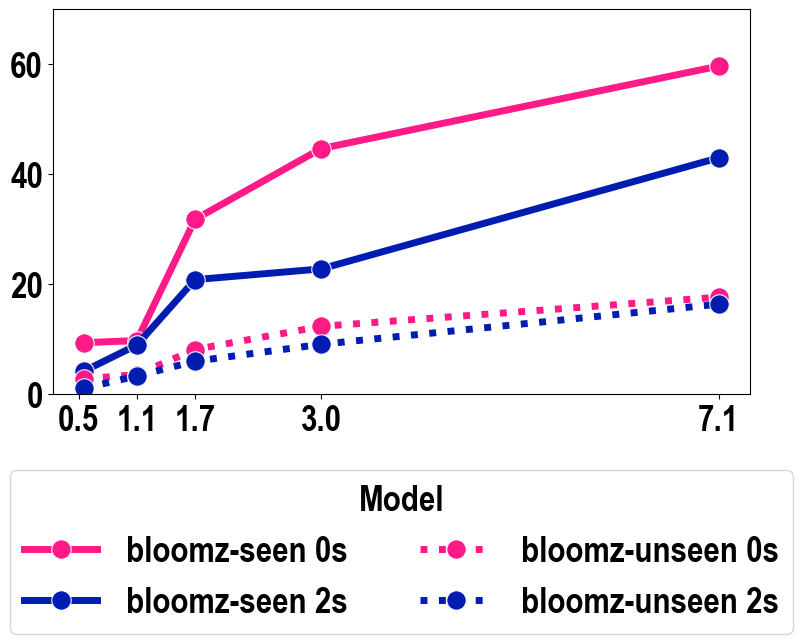

In [803]:
f1_vs_modelsize_all_bloomz(df)

## Delta plot

In [607]:
# All in one place

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_differences(df, column_list_zs, column_list_2s):
    diff_df = pd.DataFrame()
    for col_zs, col_2s in zip(column_list_zs, column_list_2s):
        diff_df[col_zs] = df[col_zs] - df[col_2s]

    return diff_df

def calculate_ratios(df, column_list_1, column_list_2):
    ratio_df = pd.DataFrame()
    for col_1, col_2 in zip(column_list_1, column_list_2):
        ratio_df[col_1] = df[col_2] / df[col_1]

    return ratio_df

def calculate_percentage_increase(df, column_list_1, column_list_2):
    percentage_increase_df = pd.DataFrame()
    for col_1, col_2 in zip(column_list_1, column_list_2):
        percentage_increase_df[col_1] = ((df[col_2] - df[col_1]) / df[col_1]) * 100

    return percentage_increase_df


def prepare_data_delta(df, model_name, seen_flag):

    if model_name == "bloom":
        if seen_flag == 'True':
            model_name = model_name + "-seen"
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
            df = calculate_percentage_increase(df, bloom_models, bloom_models_2s)
        elif seen_flag == 'False':
            model_name = model_name + "-unseen"
            df = df[df['BLOOM Pretrain Data'].isna()]
            df = calculate_percentage_increase(df, bloom_models, bloom_models_2s)
        elif seen_flag == 'All':
            model_name = model_name + "-all"
            df = calculate_percentage_increase(df, bloom_models, bloom_models_2s)

        df = df.rename(columns={bloom_models[0]:0.560, bloom_models[1]:1.100, bloom_models[2]:1.700, bloom_models[3]:3.000, bloom_models[4]:7.100})

    elif model_name == "bloomz":
        if seen_flag == 'True':
            model_name = model_name + "-seen"
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
            df = calculate_percentage_increase(df, bloomz_models, bloomz_models_2s)
        elif seen_flag == 'False':
            model_name = model_name + "-unseen"
            df = df[df['BLOOMZ Finetune Data'].isna()]
            df = calculate_percentage_increase(df, bloomz_models, bloomz_models_2s)
        elif seen_flag == 'All':
            model_name = model_name + "-all"
            df = calculate_percentage_increase(df, bloomz_models, bloomz_models_2s)
        df = df.rename(columns={bloomz_models[0]:0.560, bloomz_models[1]:1.100, bloomz_models[2]:1.700, bloomz_models[3]:3.000, bloomz_models[4]:7.100})

    elif model_name == "xglm":
        if seen_flag == 'True':
            model_name = model_name + "-seen"
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
            df = calculate_percentage_increase(df, xglm_models, xglm_models_2s)
        elif seen_flag == 'False':
            model_name = model_name + "-unseen"
            df = df[df['XGLM Pretrain Data'].isna()]
            df = calculate_percentage_increase(df, xglm_models, xglm_models_2s)
        elif seen_flag == 'All':
            model_name = model_name + "-all"
            df = calculate_percentage_increase(df, xglm_models, xglm_models_2s)
        df = df.rename(columns={xglm_models[0]:0.564, xglm_models[1]:1.700, xglm_models[2]:2.900, xglm_models[3]:7.500})


    df = df.transpose().reset_index()
    df.columns = ['Model Size'] + list(range(df.shape[1]-1))

    # Create a new column for model type
    df['Model Type'] = model_name

    # Melt the DataFrame to combine columns
    df_melted = pd.melt(df, id_vars=['Model Size', 'Model Type'], var_name='Value')

    return df_melted

def delta_plot(df):

    seen_flag = "True"
    df_melted_1 = prepare_data_delta(df, "bloom", seen_flag)
    df_melted_2 = prepare_data_delta(df, "bloomz", seen_flag)
    df_melted_4 = prepare_data_delta(df, "xglm", seen_flag)

    seen_flag = "False"
    df_melted_5 = prepare_data_delta(df, "bloom", seen_flag)
    df_melted_6 = prepare_data_delta(df, "bloomz", seen_flag)
    df_melted_8 = prepare_data_delta(df, "xglm", seen_flag)

    # seen_flag = "All"
    # df_melted_9 = prepare_data_delta(df, "bloom", seen_flag)
    # df_melted_10 = prepare_data_delta(df, "bloomz", seen_flag)
    # df_melted_12 = prepare_data_delta(df, "xglm", seen_flag)


    df_combined_1 = pd.concat([df_melted_1, df_melted_2, df_melted_4])
    df_combined_2 = pd.concat([df_melted_5, df_melted_6, df_melted_8])
    # df_combined_3 = pd.concat([df_melted_9, df_melted_10, df_melted_12])

    legend_items_1 = sorted(df_combined_1['Model Type'].unique(), reverse=True)
    # legend_items_1[1], legend_items_1[2] = legend_items_1[2], legend_items_1[1]

    legend_items_2 = sorted(df_combined_2['Model Type'].unique(), reverse=True)
    # legend_items_2[1], legend_items_2[2] = legend_items_2[2], legend_items_2[1]

    # -----------------------------
    df_combined_1 = df_combined_1.reset_index(drop=True)
    df_combined_2 = df_combined_2.reset_index(drop=True)
    # -----------------------------
    
    plt.figure(figsize=(8, 6))

    # color_palette = ["#E869B6", "#6977E8", "#1DB52C"]
    color_palette = ["#1DB52C", "#0bb4ff", "#e60049"]
    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_1, palette=color_palette, marker='o', linestyle='solid', hue_order=legend_items_1, errorbar=None, linewidth=5, markersize=14)
    sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_2, palette=color_palette, marker='^', linestyle='dashed', hue_order=legend_items_2, errorbar=None, linewidth=5, markersize=14)
    # sns.lineplot(x='Model Size', y='value', hue='Model Type', data=df_combined_3, palette=color_palette, marker='o')

    plt.axhline(y=0, color='gray', linestyle=':')
    plt.ylabel('Percentage Improvement')
    # plt.ylabel('')
    plt.xlabel('')

    plt.xticks([0.5, 1.1, 1.7, 3.0, 7.1])
    # plt.xticks()

    # plt.yticks([0, 25, 50, 100, 300, 500], fontsize=14)
    plt.yscale('symlog', linthresh=50)

    ax = plt.gca()

    plt.legend(title='Model')
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0.0, -0.1), ncol=2)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(-0.15, -0.1), ncol=3)
    plt.legend(title='Model').remove()

    plt.savefig('delta_plot_class.png')
    plt.show()

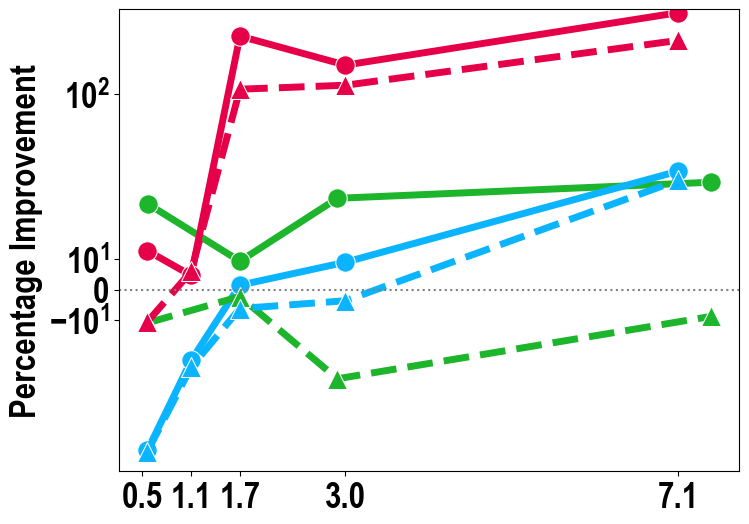

In [608]:
delta_plot(df)

In [ ]:
# def calculate_percentage_increase(df, column_list_1, column_list_2):
#     percentage_increase_df = pd.DataFrame()

#     # Add the "Folder Name" column from the original DataFrame to the new DataFrame
#     percentage_increase_df["Folder Name"] = df["Folder Name"]

#     # Calculate percentage increase for each pair of columns
#     for col_1, col_2 in zip(column_list_1, column_list_2):
#         percentage_increase_df[col_1] = ((df[col_2] - df[col_1]) / df[col_1]) * 100

#     return percentage_increase_df

# Correlations - Heatmaps, Lineplots

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def generate_heatmaps(df, column_list):
    # Assuming df is your DataFrame
    # resource_levels = sorted(df['Resource Level'].unique())
    resource_levels = [0,1,2,3,4,5]

    # column_list = ['F1 bloomz-560m', 'F1 Bloomz-1b1', 'F1 Bloomz-1b7', 'F1 Bloomz-3b', 'F1 Bloomz-7b1']

    # Set up subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Pearson Correlation', fontsize=16)

    for i, resource_level in enumerate(resource_levels):
        # Subset the DataFrame for the specific resource level
        subset_df = df[df['Resource Level'] == resource_level]

        # Select the relevant columns
        correlation_columns = subset_df[column_list]

        # Calculate the correlation matrix
        correlation_matrix = correlation_columns.corr()

        # Create a heatmap for the current subplot
        ax = axes[i // 3, i % 3]
        sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, ax=ax)
        ax.set_title(f'Resource Level: {resource_level}')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plots
    plt.show()


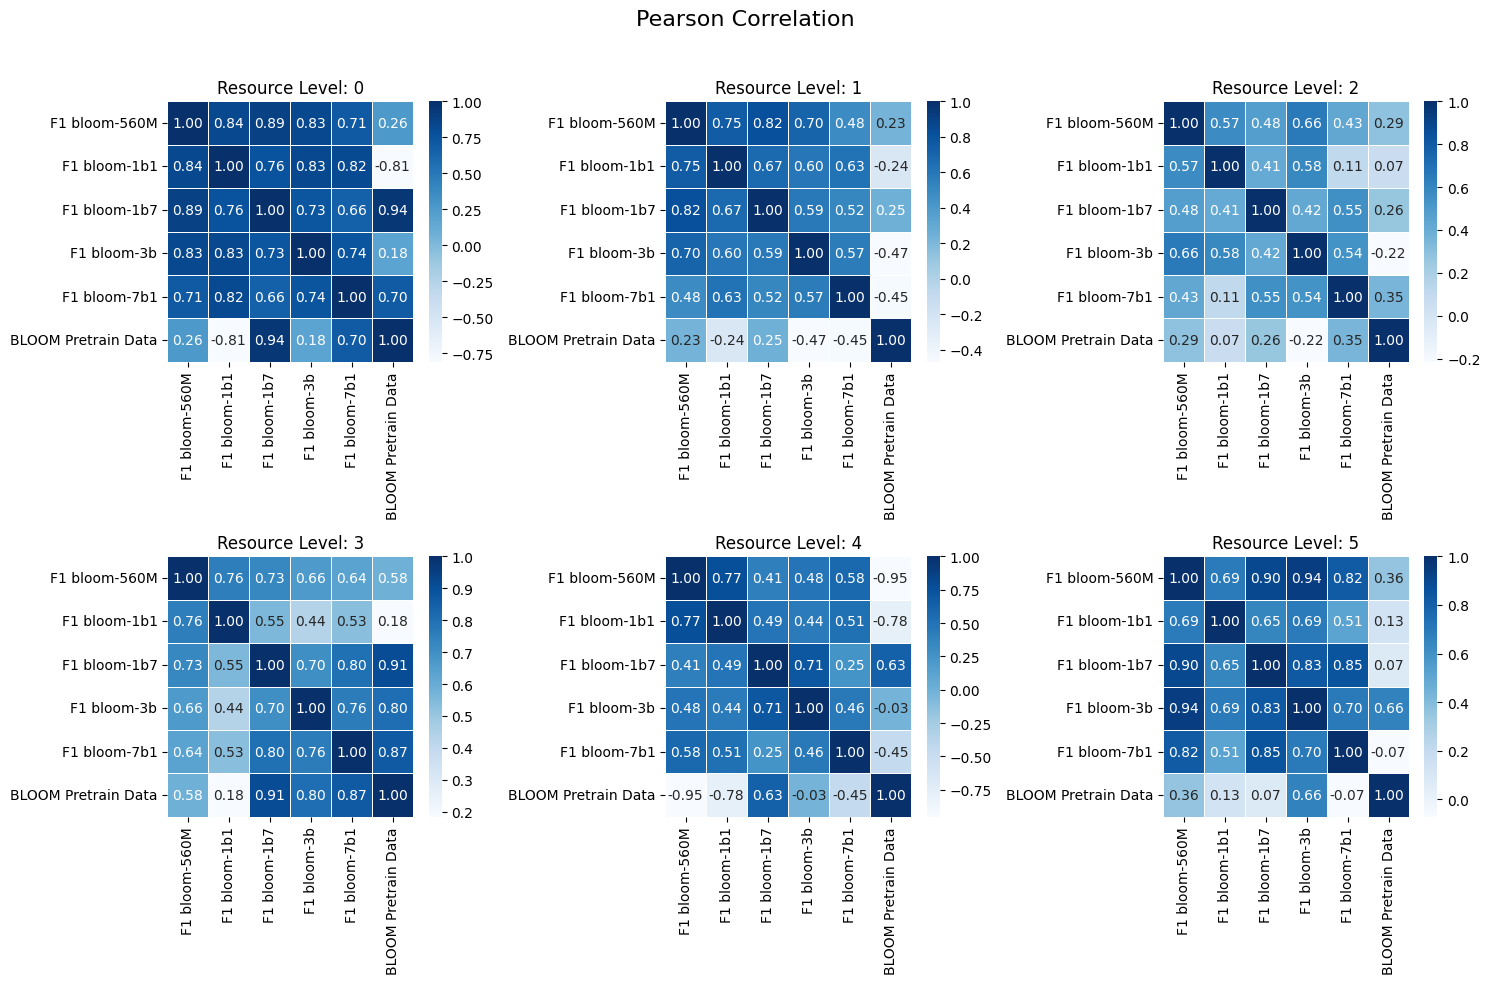

In [ ]:
generate_heatmaps(df, column_list_bloom)

In [ ]:
def corr_values(model, corr_method, column_to_compare):
    column_names = model
    df_filtered = df.dropna(subset=[column_to_compare], how='any')

    # Calculating correlations
    correlations = df_filtered[column_names].corrwith(df_filtered[column_to_compare], method=corr_method)

    print(corr_method)
    # Printing the results
    for column_name, correlation in correlations.items():
        print(f"{column_name}:    {correlation}")


In [ ]:
corr_values(bloom_models_2s, "pearson", "BLOOM Pretrain Data")

pearson
F1 bloom-560m 2s:    0.559291389910643
F1 bloom-1b1 2s:    0.3609069359664861
F1 bloom-1b7 2s:    0.4619423853532831
F1 bloom-3b 2s:    0.30219118078184853
F1 bloom-7b1 2s:    0.3006709184099433


In [ ]:
corr_values(bloom_models_2s, "kendall", "BLOOM Pretrain Data")

kendall
F1 bloom-560m 2s:    0.6823719820082511
F1 bloom-1b1 2s:    0.3983908278191885
F1 bloom-1b7 2s:    0.5495750394018549
F1 bloom-3b 2s:    0.46376778417926046
F1 bloom-7b1 2s:    0.5087144416768099


In [ ]:
corr_values(bloomz_models_2s, "pearson", "BLOOMZ Finetune Data")

pearson
F1 bloomz-560m 2s:    0.3302312440149345
F1 bloomz-1b1 2s:    0.5030611203772393
F1 bloomz-1b7 2s:    0.4124578809755628
F1 bloomz-3b 2s:    0.2774708785702063
F1 bloomz-7b1 2s:    0.04676263984916579


In [ ]:
corr_values(bloomz_models_2s, "kendall", "BLOOMZ Finetune Data")

kendall
F1 bloomz-560m 2s:    0.24650235167166423
F1 bloomz-1b1 2s:    0.23529769932295222
F1 bloomz-1b7 2s:    0.3226939876429059
F1 bloomz-3b 2s:    0.24874328214140662
F1 bloomz-7b1 2s:    0.0


In [ ]:
corr_values(xglm_models, "pearson", "XGLM Pretrain Data")

pearson
F1 xglm-564m:    0.1105195592292075
F1 xglm-1.7b:    -0.012525838826850082
F1 xglm-2.9b:    0.20684123323584558
F1 xglm-7.5b:    0.12202165285322938


In [ ]:
corr_values(xglm_models, "pearson", "XGLM Train Percentage - Upscaled")

pearson
F1 xglm-564m:    0.1278493423182773
F1 xglm-1.7b:    0.07173275940761838
F1 xglm-2.9b:    0.18410201952489047
F1 xglm-7.5b:    0.08787564721013408


In [ ]:
xglm_models

['F1 xglm-564m', 'F1 xglm-1.7b', 'F1 xglm-2.9b', 'F1 xglm-7.5b']

In [ ]:
corr_values(xglm_models_2s, "kendall", "XGLM Pretrain Data")

kendall
F1 xglm-564m 2s:    0.3977011494252874
F1 xglm-1.7b 2s:    0.40689655172413797
F1 xglm-2.9b 2s:    0.10804597701149425
F1 xglm-7.5b 2s:    0.26436781609195403


In [ ]:
corr_values(bloomz_models_2s, "pearson", "BLOOM Pretrain Data")

pearson
F1 bloomz-560m 2s:    0.4288175951751202
F1 bloomz-1b1 2s:    0.5239141262187091
F1 bloomz-1b7 2s:    0.4830867677088279
F1 bloomz-3b 2s:    0.3441888918071771
F1 bloomz-7b1 2s:    0.06492948181156248


In [ ]:
corr_values(bloomz_models_2s, "kendall", "BLOOM Pretrain Data")

kendall
F1 bloomz-560m 2s:    0.6312962348519449
F1 bloomz-1b1 2s:    0.6374253245107016
F1 bloomz-1b7 2s:    0.6251671451931882
F1 bloomz-3b 2s:    0.48011202326927843
F1 bloomz-7b1 2s:    0.39430476804668396


In [ ]:
def corr_values_zs_fs(model, corr_method):

    df_filtered = df[model]

    correlations = df_filtered.corr()

    # return correlations.iloc[:, 0]
    return correlations


In [ ]:
corr_values_zs_fs(bloom_models + bloom_models_2s, "pearson")

F1 bloom-560m  F1 bloom-1b1  F1 bloom-1b7  F1 bloom-3b  \
F1 bloom-560m          1.000000      0.765324      0.766896     0.728546   
F1 bloom-1b1           0.765324      1.000000      0.652519     0.642075   
F1 bloom-1b7           0.766896      0.652519      1.000000     0.719308   
F1 bloom-3b            0.728546      0.642075      0.719308     1.000000   
F1 bloom-7b1           0.595224      0.584673      0.720945     0.708910   
F1 bloom-560m 2s       0.651143      0.615502      0.752441     0.606729   
F1 bloom-1b1 2s        0.584165      0.530795      0.650616     0.558597   
F1 bloom-1b7 2s        0.740322      0.598062      0.726385     0.722759   
F1 bloom-3b 2s         0.719558      0.633394      0.692129     0.671948   
F1 bloom-7b1 2s        0.679553      0.556943      0.653901     0.660681   

                  F1 bloom-7b1  F1 bloom-560m 2s  F1 bloom-1b1 2s  \
F1 bloom-560m         0.595224          0.651143         0.584165   
F1 bloom-1b1          0.584673          0.615502         0.530795   
F1 bloom-1b7          0.720945          0.752441         0.650616   
F1 bloom-3b           0.708910          0.606729         0.558597   
F1 bloom-7b1          1.000000          0.712574         0.565111   
F1 bloom-560m 2s      0.712574          1.000000         0.728048   
F1 bloom-1b1 2s       0.565111          0.728048         1.000000   
F1 bloom-1b7 2s       0.591401          0.739300         0.716641   
F1 bloom-3b 2s        0.584374          0.711824         0.691529   
F1 bloom-7b1 2s       0.597391          0.739932         0.662203   

                  F1 bloom-1b7 2s  F1 bloom-3b 2s  F1 bloom-7b1 2s  
F1 bloom-560m            0.740322        0.719558         0.679553  
F1 bloom-1b1             0.598062        0.633394         0.556943  
F1 bloom-1b7             0.726385        0.692129         0.653901  
F1 bloom-3b              0.722759        0.671948         0.660681  
F1 bloom-7b1             0.591401        0.584374         0.597391  
F1 bloom-560m 2s         0.739300        0.711824         0.739932  
F1 bloom-1b1 2s          0.716641        0.691529         0.662203  
F1 bloom-1b7 2s          1.000000        0.856575         0.846600  
F1 bloom-3b 2s           0.856575        1.000000         0.879172  
F1 bloom-7b1 2s          0.846600        0.879172         1.000000

In [ ]:
corr_values_zs_fs(xglm_models + xglm_models_2s, "pearson")

F1 xglm-564m  F1 xglm-1.7b  F1 xglm-2.9b  F1 xglm-7.5b  \
F1 xglm-564m         1.000000      0.800508      0.885425      0.848270   
F1 xglm-1.7b         0.800508      1.000000      0.875258      0.873716   
F1 xglm-2.9b         0.885425      0.875258      1.000000      0.907812   
F1 xglm-7.5b         0.848270      0.873716      0.907812      1.000000   
F1 xglm-564m 2s      0.756338      0.683041      0.742375      0.743828   
F1 xglm-1.7b 2s      0.823872      0.798462      0.840580      0.814534   
F1 xglm-2.9b 2s      0.769905      0.691251      0.767755      0.760511   
F1 xglm-7.5b 2s      0.790752      0.710285      0.779513      0.772015   

                 F1 xglm-564m 2s  F1 xglm-1.7b 2s  F1 xglm-2.9b 2s  \
F1 xglm-564m            0.756338         0.823872         0.769905   
F1 xglm-1.7b            0.683041         0.798462         0.691251   
F1 xglm-2.9b            0.742375         0.840580         0.767755   
F1 xglm-7.5b            0.743828         0.814534         0.760511   
F1 xglm-564m 2s         1.000000         0.912778         0.919367   
F1 xglm-1.7b 2s         0.912778         1.000000         0.903422   
F1 xglm-2.9b 2s         0.919367         0.903422         1.000000   
F1 xglm-7.5b 2s         0.930728         0.921492         0.954567   

                 F1 xglm-7.5b 2s  
F1 xglm-564m            0.790752  
F1 xglm-1.7b            0.710285  
F1 xglm-2.9b            0.779513  
F1 xglm-7.5b            0.772015  
F1 xglm-564m 2s         0.930728  
F1 xglm-1.7b 2s         0.921492  
F1 xglm-2.9b 2s         0.954567  
F1 xglm-7.5b 2s         1.000000

In [ ]:
corr_values_zs_fs(bloomz_models + bloomz_models_2s, "pearson")

F1 bloomz-560m  F1 bloomz-1b1  F1 bloomz-1b7  F1 bloomz-3b  \
F1 bloomz-560m           1.000000       0.903167       0.848555      0.880920   
F1 bloomz-1b1            0.903167       1.000000       0.886193      0.894768   
F1 bloomz-1b7            0.848555       0.886193       1.000000      0.945795   
F1 bloomz-3b             0.880920       0.894768       0.945795      1.000000   
F1 bloomz-7b1            0.874711       0.886555       0.911716      0.965885   
F1 bloomz-560m 2s        0.656760       0.711529       0.727965      0.720618   
F1 bloomz-1b1 2s         0.784742       0.786471       0.789377      0.793162   
F1 bloomz-1b7 2s         0.821707       0.832303       0.877310      0.877534   
F1 bloomz-3b 2s          0.778492       0.733063       0.753752      0.793942   
F1 bloomz-7b1 2s         0.882154       0.863076       0.847435      0.915102   

                   F1 bloomz-7b1  F1 bloomz-560m 2s  F1 bloomz-1b1 2s  \
F1 bloomz-560m          0.874711           0.656760          0.784742   
F1 bloomz-1b1           0.886555           0.711529          0.786471   
F1 bloomz-1b7           0.911716           0.727965          0.789377   
F1 bloomz-3b            0.965885           0.720618          0.793162   
F1 bloomz-7b1           1.000000           0.695657          0.751994   
F1 bloomz-560m 2s       0.695657           1.000000          0.807380   
F1 bloomz-1b1 2s        0.751994           0.807380          1.000000   
F1 bloomz-1b7 2s        0.859007           0.782926          0.841578   
F1 bloomz-3b 2s         0.782620           0.556771          0.671491   
F1 bloomz-7b1 2s        0.943146           0.599028          0.728204   

                   F1 bloomz-1b7 2s  F1 bloomz-3b 2s  F1 bloomz-7b1 2s  
F1 bloomz-560m             0.821707         0.778492          0.882154  
F1 bloomz-1b1              0.832303         0.733063          0.863076  
F1 bloomz-1b7              0.877310         0.753752          0.847435  
F1 bloomz-3b               0.877534         0.793942          0.915102  
F1 bloomz-7b1              0.859007         0.782620          0.943146  
F1 bloomz-560m 2s          0.782926         0.556771          0.599028  
F1 bloomz-1b1 2s           0.841578         0.671491          0.728204  
F1 bloomz-1b7 2s           1.000000         0.764812          0.798309  
F1 bloomz-3b 2s            0.764812         1.000000          0.805395  
F1 bloomz-7b1 2s           0.798309         0.805395          1.000000

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

def correlation_values(df, column_list, x_labels, model_name):

    if model_name=="bloom":
        df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
    elif model_name=="bloomz":
        df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
    elif model_name=="xglm":
        df = df.dropna(subset=['XGLM Pretrain Data'], how='any')


    resource_levels = [0, 5]

    # Divide languages into 2 categories (0, 1, 2) and (3, 4, 5)
    # print(df['Resource Level'].value_counts())
    df = df[df['Resource Level'] != 'None']
    df['Resource Level'] = df['Resource Level'].apply(lambda x: 0 if x in [0, 1, 2] else 5)
    print(df['Resource Level'].value_counts())

    df['Resource Level'] = df['Resource Level'].astype(float)
    df['Resource Level'] = pd.to_numeric(df['Resource Level'], errors='coerce')
    # print(df['Resource Level'].head())

    correlation_values_per_resource = []

    for i, resource_level in enumerate(resource_levels):
        # Subset the DataFrame for the specific resource level
        subset_df = df[df['Resource Level'] == resource_level]

        # Select the relevant columns
        df_correlation_columns = subset_df[column_list]

        # Calculate the correlation matrix
        correlation_matrix = df_correlation_columns.corr()
        # print(correlation_matrix)

        # Append the values from the last row to the list
        last_row_values = correlation_matrix.iloc[-1, :].values.tolist()
        correlation_values_per_resource.append(last_row_values[:-1])

    return correlation_values_per_resource

def generate_heatmap(correlation_values_per_resource, x_labels):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Convert the list to a NumPy array for better indexing
    correlation_array = np.array(correlation_values_per_resource)

    im = ax.imshow(correlation_array, cmap='Blues', aspect='auto', vmin=-1, vmax=1)

    # Set the ticks and labels for the axes
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(correlation_values_per_resource)))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels([f'Resource Level {i}' for i in range(len(correlation_values_per_resource))])

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
    # cbar.set_label('Correlation')

    # Add annotations
    for i in range(len(correlation_values_per_resource)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, f'{correlation_array[i, j]:.2f}', ha='center', va='center', color='black')

    # plt.title('Correlation between proportion of seen language and F1 scores at different resource level')
    # plt.xlabel('Model sizes')
    # plt.ylabel('Resource Levels')

    plt.show()

0    30
5    15
Name: Resource Level, dtype: int64


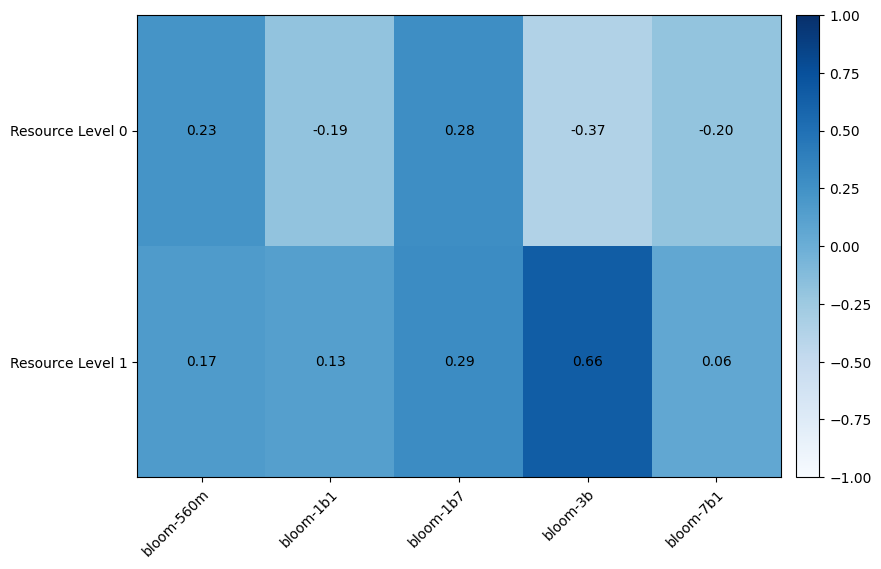

In [ ]:
x_labels_stripped = [label[3:] for label in column_list_bloom[:-1]]
# print(column_list_bloom)
correlation_values_per_resource = correlation_values(df, column_list_bloom, x_labels_stripped, "bloom")
generate_heatmap(correlation_values_per_resource, x_labels_stripped)

In [ ]:
correlation_values_per_resource

[[0.23048828376243785,
  -0.1906583331598174,
  0.2751367949979527,
  -0.37001231501763365,
  -0.19831419076507842],
 [0.16906630364866074,
  0.12665945909250415,
  0.29012644080907857,
  0.6554700899945003,
  0.05859935578917456]]

In [ ]:
import pandas as pd

def corr_by_rl(df, model_name, seen_flag, merge_flag):
    models = ""

    if model_name == "bloom":
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            pass
        models = bloom_models + ['Resource Level']
    elif model_name == "bloomz-p":
        models = bloomz_models + ['Resource Level']
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            pass
    elif model_name == "bloomz-f":
        models = bloomz_models + ['Resource Level']
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOMZ Finetune Data'].isna()]
        elif seen_flag == 'All':
            pass
    elif model_name == "xglm":
        models = xglm_models + ['Resource Level']
        if seen_flag == 'True':
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['XGLM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            pass

    # 2-shot
    if model_name == "bloom-2s":
        models = bloom_models_2s + ['Resource Level']
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            pass
    elif model_name == "bloomz-2s":
        models = bloomz_models_2s + ['Resource Level']
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            pass
    # elif model_name == "bloomz-f":
    #     models = bloomz_models + ['Resource Level']
    #     if seen_flag == 'True':
    #         df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
    #     elif seen_flag == 'False':
    #         df = df[df['BLOOMZ Finetune Data'].isna()]
    #     elif seen_flag == 'All':
    #         pass
    elif model_name == "xglm-2s":
        models = xglm_models_2s + ['Resource Level']
        if seen_flag == 'True':
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['XGLM Pretrain Data'].isna()]
        elif seen_flag == 'All':
            pass


    df = df[df['Resource Level'] != 'None']

    if merge_flag==True:
        df['Resource Level'] = df['Resource Level'].apply(lambda x: 0 if x in [0, 1, 2] else 5)
    else:
        df['Resource Level'] = df['Resource Level'].astype(int)

    # print(df['Resource Level'].unique())

    df = df[models]

    # df = df.dropna()
    # df = df[df['Resource Level'] == 0]

    correlation = df.corr(method='spearman')

    return correlation['Resource Level']
    # return correlation
    # return df

In [ ]:
seen_flag = "True"
merge_flag = True

In [ ]:
corr_by_rl(df, "bloom", seen_flag, merge_flag)

F1 bloom-560m     0.602542
F1 bloom-1b1      0.656988
F1 bloom-1b7      0.766008
F1 bloom-3b       0.758622
F1 bloom-7b1      0.784030
Resource Level    1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_by_rl(df, "xglm", seen_flag, merge_flag)

F1 xglm-564m      0.304844
F1 xglm-1.7b      0.129171
F1 xglm-2.9b      0.222175
F1 xglm-7.5b      0.149839
Resource Level    1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_by_rl(df, "bloomz-p", seen_flag, merge_flag)

F1 bloomz-560m    0.642469
F1 bloomz-1b1     0.689656
F1 bloomz-1b7     0.544466
F1 bloomz-3b      0.558985
F1 bloomz-7b1     0.642469
Resource Level    1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_by_rl(df, "bloom", "False")

F1 bloom-560m     0.013338
F1 bloom-1b1      0.041604
F1 bloom-1b7      0.099635
F1 bloom-3b      -0.044558
F1 bloom-7b1      0.107509
Resource Level    1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_by_rl(df, "bloomz-f", 'False')

F1 bloomz-560m    0.083955
F1 bloomz-1b1     0.072326
F1 bloomz-1b7     0.024290
F1 bloomz-3b      0.084106
F1 bloomz-7b1     0.174318
Resource Level    1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_by_rl(df, "bloomz-p", 'False')

F1 bloomz-560m    0.079041
F1 bloomz-1b1     0.053130
F1 bloomz-1b7     0.002050
F1 bloomz-3b      0.064358
F1 bloomz-7b1     0.160624
Resource Level    1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_by_rl(df, "xglm", "False")

F1 xglm-564m      0.126270
F1 xglm-1.7b      0.177107
F1 xglm-2.9b      0.161309
F1 xglm-7.5b      0.064188
Resource Level    1.000000
Name: Resource Level, dtype: float64

<ipython-input-47-6a728f9fcce7>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



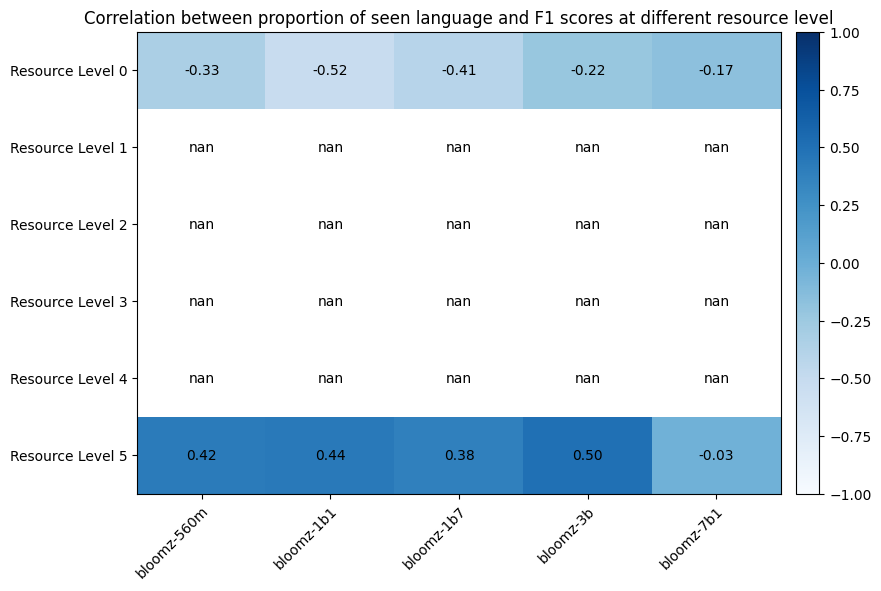

In [ ]:
x_labels_stripped = [label[3:] for label in column_list_bloomz[:-1]]

correlation_values_per_resource = correlation_values(df, column_list_bloomz, x_labels_stripped, "bloomz")
generate_heatmap(correlation_values_per_resource, x_labels_stripped)

<ipython-input-47-6a728f9fcce7>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



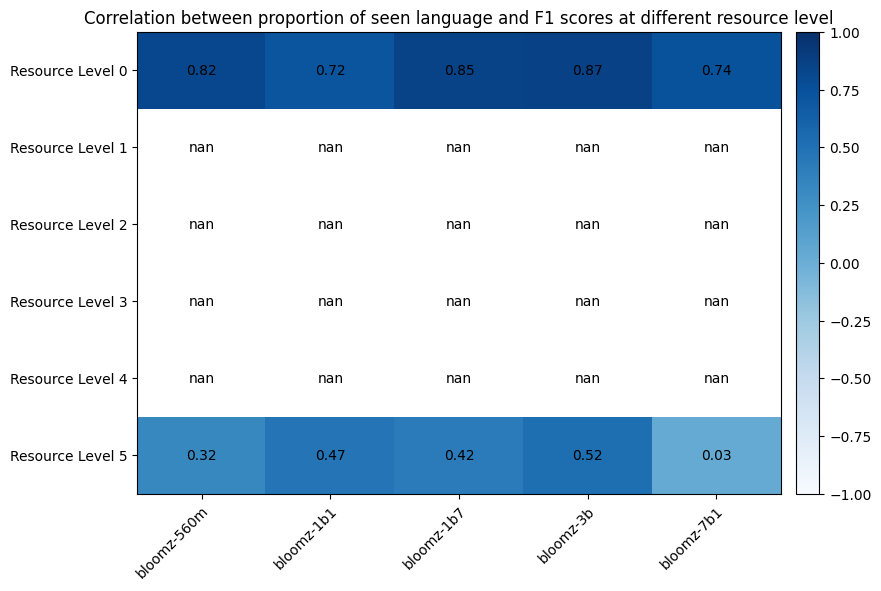

In [ ]:
# remove finetune and add pretraing to bloomz
column_list_bloomz_1 = column_list_bloomz[:-1] + ['BLOOM Pretrain Data']
x_labels_stripped = [label[3:] for label in column_list_bloomz_1[:-1]]

correlation_values_per_resource = correlation_values(df, column_list_bloomz_1, x_labels_stripped, "bloomz")
generate_heatmap(correlation_values_per_resource, x_labels_stripped)

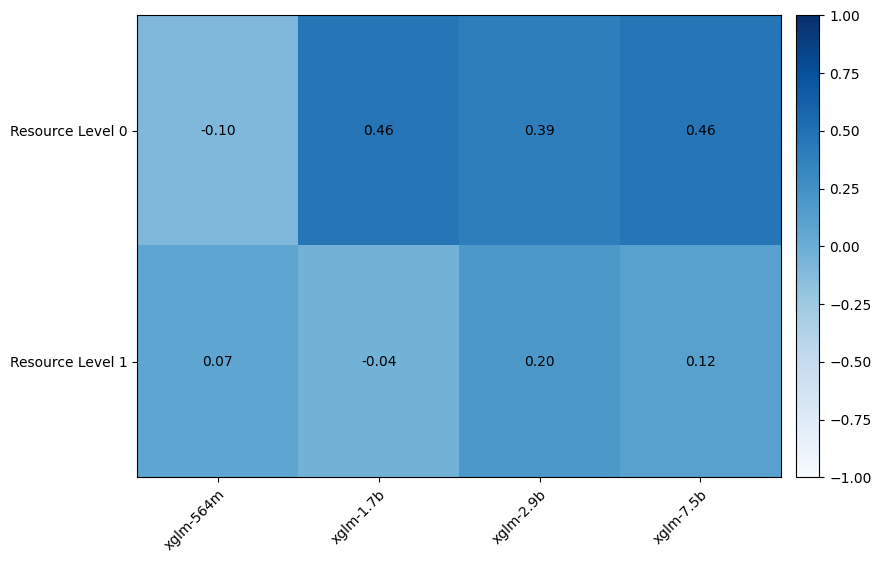

In [ ]:
x_labels_stripped = [label[3:] for label in column_list_xglm[:-1]]

correlation_values_per_resource = correlation_values(df, column_list_xglm, x_labels_stripped, "xglm")
generate_heatmap(correlation_values_per_resource, x_labels_stripped)

In [ ]:
def corr_two_columns(df, model):
    column1 = ''
    if model == 'bloom':
        column1 = 'BLOOM Pretrain Data'
        df = df.dropna(subset=[column1], how='any')
    elif model == 'bloomz':
        column1 = 'BLOOMZ Finetune Data'
        df = df.dropna(subset=[column1], how='any')
    elif model == 'xglm':
        column1 = 'XGLM Pretrain Data'
        df = df.dropna(subset=[column1], how='any')

    df = df[df['Resource Level'] != 'None']
    # df['Resource Level'] = df['Resource Level'].apply(lambda x: 0 if x in [0, 1, 2] else 5)
    df['Resource Level'] = df['Resource Level'].astype(int)


    column2 = 'Resource Level'

    df = df[[column1, column2]]
    correlation = df.corr(method='spearman')

    return correlation['Resource Level']

In [ ]:
corr_two_columns(df, 'bloom')

BLOOM Pretrain Data    0.776107
Resource Level         1.000000
Name: Resource Level, dtype: float64

In [ ]:
corr_two_columns(df, 'bloomz')

BLOOMZ Finetune Data    0.61331
Resource Level          1.00000
Name: Resource Level, dtype: float64

In [ ]:
corr_two_columns(df, 'xglm')

XGLM Pretrain Data    0.800185
Resource Level        1.000000
Name: Resource Level, dtype: float64

In [ ]:
import pandas as pd

def corr_by_rl(df, model_name):

    if model_name=="bloom":
        df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        models = bloom_models + ['Resource Level']
    elif model_name=="bloomz-p":
        df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        models = bloomz_models + ['Resource Level']
    elif model_name=="bloomz-f":
        df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        models = bloomz_models + ['Resource Level']
    elif model_name=="xglm":
        df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        models = xglm_models + ['Resource Level']

    df = df[df['Resource Level'] != 'None']
    df['Resource Level'] = df['Resource Level'].apply(lambda x: 0 if x in [0, 1, 2] else 5)
    # print(df['Resource Level'].unique())

    df = df[models]

    # df = df[df['Resource Level'] == 0]

    correlation = df.corr()

    return correlation['Resource Level']

In [ ]:
corr_by_rl(df, 'bloom')

F1 bloom-560m     0.710581
F1 bloom-1b1      0.681634
F1 bloom-1b7      0.841226
F1 bloom-3b       0.740568
F1 bloom-7b1      0.830857
Resource Level    1.000000
Name: Resource Level, dtype: float64

# Language Family - Boxplots

## By Language Family

In [81]:
import pandas as pd
import plotly.express as px

def box_by_family(df, model_name, languages_to_plot, seen_flag):
    if model_name == "bloom":
        models = bloom_models
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "bloomz":
        models = bloomz_models
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "xglm":
        models = xglm_models
        if seen_flag == "True":
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['XGLM Pretrain Data'].isna()]


    # Filter the DataFrame based on provided languages and bloom models
    filtered_df = df[df['Language Family'].isin(languages_to_plot)][['Language Family'] + models]

    # Sort the DataFrame based on the order of specified language families
    filtered_df['Language Family'] = pd.Categorical(filtered_df['Language Family'], categories=languages_to_plot, ordered=True)



    language_order = lang_family_by_model(df, model_name).keys()
    # language_order = list(language_order).remove('Isolate')
    filtered_df['Language Family'] = pd.Categorical(filtered_df['Language Family'], categories=language_order, ordered=True)
    filtered_df = filtered_df.sort_values(by='Language Family')
    # filtered_df = filtered_df.sort_values(by='Language Family')



    # Melt the DataFrame to make it suitable for Plotly Express
    melted_df = pd.melt(filtered_df, id_vars=['Language Family'], var_name='Model Sizes', value_name='F1 Score')

    # Create a box plot using Plotly Express
    fig = px.box(melted_df, x='Language Family', y='F1 Score', color='Model Sizes',
                 title=f'{model_name}',
                 labels={'F1 Score': 'F1 Score', 'Language Family': 'Language Family'},
                 height=600, width=1200)

    # Update the title for each facet to make it two lines
    fig.update_layout(title_x=0.5)

    # Show the plot
    fig.show()

In [ ]:
box_by_family(df, model_name="bloom", languages_to_plot=bloom_families, seen_flag="True")

In [ ]:
box_by_family(df, model_name="bloom", languages_to_plot=bloom_families, seen_flag="False")

In [ ]:
box_by_family(df, model_name="bloomz", languages_to_plot=bloomz_families, seen_flag="True")

In [ ]:
import pandas as pd
import plotly.express as px

def bar_by_family(df, model_name, language_family, r_level, seen_flag):

    if model_name == "bloom":
        models = bloom_models
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "bloomz":
        models = bloomz_models
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "xglm":
        models = xglm_models
        if seen_flag == "True":
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['XGLM Pretrain Data'].isna()]

    # Ensure that language_family is a single string
    assert isinstance(language_family, str), "Language family must be a single string."

    # Filter the DataFrame based on the specified language family and bloom models
    # filtered_df = df[df['Language Family'] == language_family]
    filtered_df = df[(df['Language Family'] == language_family) &
                    (df['Resource Level'].isin(r_level))]

    # Get all languages within the specified language family
    languages_in_family = filtered_df['Folder Name'].unique()

    # Filter the DataFrame based on the specified languages and bloom models
    filtered_df = filtered_df[['Folder Name'] + models]

    # Melt the DataFrame to make it suitable for Plotly Express
    melted_df = pd.melt(filtered_df, id_vars=['Folder Name'], var_name='Model Sizes', value_name='F1 Score')

    # Create a grouped bar plot using Plotly Express
    fig = px.bar(melted_df, x='Folder Name', y='F1 Score', color='Model Sizes',
                 barmode='group',
                 labels={'F1 Score': 'F1 Score', 'Folder Name': 'Languages'},
                 title=f'{language_family} -- Resource level {r_level} -- Seen: {seen_flag}',
                 height=600, width=1200)

    # Update the title for each facet to make it two lines
    fig.update_layout(title_x=0.5)
    fig.update_yaxes(range=[0.0, 0.7])

    # Show the plot
    fig.show()


In [ ]:
bar_by_family(df, model_name="bloom", language_family="Niger-Congo", r_level=[4], seen_flag="True")

In [ ]:
bar_by_family(df, model_name="bloom", language_family="Indo-European", r_level=[1], seen_flag="True")

In [ ]:
bar_by_family(df, model_name="bloom", language_family="Indo-European", r_level=[1], seen_flag="False")

In [ ]:
df.columns

Index(['Folder Name', 'Language Name', 'Language Family', 'Resource Level',
       'BLOOM Pretrain Data', 'BLOOMZ Finetune Data', 'XGLM Pretrain Data',
       'F1 bloomz-560m', 'F1 bloomz-1b1', 'F1 bloomz-1b7', 'F1 bloomz-3b',
       'F1 bloomz-7b1', 'F1 bloom-560m', 'F1 bloom-1b1', 'F1 bloom-1b7',
       'F1 bloom-3b', 'F1 bloom-7b1', 'F1 xglm-564m', 'F1 xglm-1.7b',
       'F1 xglm-2.9b', 'F1 xglm-7.5b', 'F1 bloomz-560m 2s', 'F1 bloomz-1b1 2s',
       'F1 bloomz-1b7 2s', 'F1 bloomz-3b 2s', 'F1 bloomz-7b1 2s',
       'F1 bloom-560m 2s', 'F1 bloom-1b1 2s', 'F1 bloom-1b7 2s',
       'F1 bloom-3b 2s', 'F1 bloom-7b1 2s', 'F1 xglm-564m 2s',
       'F1 xglm-1.7b 2s', 'F1 xglm-2.9b 2s', 'F1 xglm-7.5b 2s'],
      dtype='object')

## Language Family Data

In [ ]:
import pandas as pd

def percent_by_rl(df):
    grouped_data = df.groupby('Resource Level')['BLOOM Pretrain Data'].sum().reset_index()
    total_sum = grouped_data['BLOOM Pretrain Data'].sum()
    grouped_data['Percentage'] = (grouped_data['BLOOM Pretrain Data'] / total_sum) * 100
    new_df = grouped_data[['Resource Level', 'Percentage']]
    print(grouped_data.columns)
    print(new_df)

In [ ]:
percent_by_rl(df)

Index(['Resource Level', 'BLOOM Pretrain Data', 'Percentage'], dtype='object')
  Resource Level  Percentage
0              0    0.000658
1              1    0.480058
2              2    0.148353
3              3    2.307196
4              4   11.016861
5              5   86.046875
6           None    0.000000


In [ ]:
def family_by_pdata(df, model_name):
    if model_name == "all":
        return df['Language Family'].value_counts()
    elif model_name == "bloom":
        df_filtered = df.dropna(subset=['BLOOM Pretrain Data'])
        result = df_filtered.groupby('Language Family').agg({'BLOOM Pretrain Data': ['count', 'sum']})
    elif model_name == "bloomz":
        df_filtered = df.dropna(subset=['BLOOMZ Finetune Data'])
        result = df_filtered.groupby('Language Family').agg({'BLOOMZ Finetune Data': ['count', 'sum']})
    if model_name == "xglm":
        df_filtered = df.dropna(subset=['XGLM Pretrain Data'])
        result = df_filtered.groupby('Language Family').agg({'XGLM Pretrain Data': ['count', 'sum']})


    result.columns = ['Count', 'Sum']
    result = result.sort_values(by='Sum', ascending=False)
    return result

In [ ]:
import pandas as pd


def family_by_pdata(df, model_name):
    pretrain_data = ""
    if model_name == "bloom":
        pretrain_data = 'BLOOM Pretrain Data'
    elif model_name == "bloomz":
        pretrain_data = 'BLOOMZ Finetune Data'
    if model_name == "xglm":
        pretrain_data = 'XGLM Pretrain Data'


    result_df = pd.DataFrame(columns=['Language Family', 'Count', 'Seen %', 'Seen Count', 'Unseen Count'])

    grouped = df.groupby('Language Family')
    dfs = []

    for family, group in grouped:
        count = len(group)
        seen_percentage = round(group[pretrain_data].sum(), 2)
        seen_count = (group[pretrain_data] > 0).sum()
        unseen_count = count - seen_count
        dfs.append(pd.DataFrame({
            'Language Family': [family],
            'Count': [count],
            'Seen %': [seen_percentage],
            'Seen Count': [seen_count],
            'Unseen Count': [unseen_count]
        }))

    result_df = pd.concat(dfs, ignore_index=True)
    result_df = result_df.sort_values(by='Seen %', ascending=False)

    return result_df

In [ ]:
family_by_pdata(df, "xglm")

Language Family  Count  Seen %  Seen Count  Unseen Count
7          Indo-European     75   81.44          13            62
17          Sino-Tibetan      9    8.10           2             7
9                Japonic      1    4.03           1             0
20                Uralic      3    1.22           2             1
11              Koreanic      1    1.22           1             0
2           Austronesian     21    0.94           1            20
19                Turkic     11    0.76           1            10
0           Afro-Asiatic     21    0.75           1            20
1         Austro-Asiatic      3    0.68           1             2
12               Kra-Dai      3    0.66           1             2
6              Dravidian      4    0.13           2             2
14           Niger-Congo     35    0.06           1            34
8                Isolate      1    0.01           1             0
5                 Creole      5    0.01           1             4
13              Mongolic      1    0.00           0             1
15          Nilo-Saharan      5    0.00           0             5
16              Quechuan      1    0.00           1             0
4   Constructed language      1    0.00           0             1
18                Tupian      1    0.00           0             1
3                Aymaran      1    0.00           0             1
10            Kartvelian      1    0.00           0             1

In [ ]:
family_by_pdata(df, 'bloom')

Language Family  Count  Seen %  Seen Count  Unseen Count
7          Indo-European     75   61.30          14            61
17          Sino-Tibetan      9   16.25           2             7
0           Afro-Asiatic     21    4.60           1            20
1         Austro-Asiatic      3    2.70           1             2
2           Austronesian     21    1.20           1            20
6              Dravidian      4    0.45           4             0
8                Isolate      1    0.15           1             0
14           Niger-Congo     35    0.04          21            14
13              Mongolic      1    0.00           0             1
19                Turkic     11    0.00           0            11
18                Tupian      1    0.00           0             1
16              Quechuan      1    0.00           0             1
15          Nilo-Saharan      5    0.00           0             5
10            Kartvelian      1    0.00           0             1
12               Kra-Dai      3    0.00           0             3
11              Koreanic      1    0.00           0             1
9                Japonic      1    0.00           0             1
5                 Creole      5    0.00           0             5
4   Constructed language      1    0.00           0             1
3                Aymaran      1    0.00           0             1
20                Uralic      3    0.00           0             3

In [ ]:
family_by_pdata(df, "bloomz")

Language Family  Count  Seen %  Seen Count  Unseen Count
7          Indo-European     75   63.45          13            62
14           Niger-Congo     35   17.85          22            13
17          Sino-Tibetan      9    4.51           1             8
2           Austronesian     21    3.33           1            20
0           Afro-Asiatic     21    2.72           1            20
1         Austro-Asiatic      3    2.11           1             2
6              Dravidian      4    1.93           4             0
8                Isolate      1    0.34           1             0
13              Mongolic      1    0.00           0             1
19                Turkic     11    0.00           0            11
18                Tupian      1    0.00           0             1
16              Quechuan      1    0.00           0             1
15          Nilo-Saharan      5    0.00           0             5
10            Kartvelian      1    0.00           0             1
12               Kra-Dai      3    0.00           0             3
11              Koreanic      1    0.00           0             1
9                Japonic      1    0.00           0             1
5                 Creole      5    0.00           0             5
4   Constructed language      1    0.00           0             1
3                Aymaran      1    0.00           0             1
20                Uralic      3    0.00           0             3

## Seen vs Unseen - by Family

In [135]:
import pandas as pd
import plotly.express as px

def bar_by_family_avg(df, model_name, language_family, r_level, seen_flag):

    if model_name == "bloom":
        models = bloom_models
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "bloomz":
        models = bloomz_models
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "xglm":
        models = xglm_models
        if seen_flag == "True":
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['XGLM Pretrain Data'].isna()]

    elif model_name == "bloom-2s":
        models = bloom_models_2s
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "bloomz-2s":
        models = bloomz_models_2s
        if seen_flag == "True":
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "xglm-2s":
        models = xglm_models_2s
        if seen_flag == "True":
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any') # True
        elif seen_flag == "False":
            df = df[df['XGLM Pretrain Data'].isna()]

    # Ensure that language_family is a single string
    assert isinstance(language_family, str), "Language family must be a single string."

    # Filter the DataFrame based on the specified language family and bloom models
    # filtered_df = df[df['Language Family'] == language_family]

    filtered_df = df[(df['Language Family'] == language_family) &
                    (df['Resource Level'].isin(r_level))]

    # Get all languages within the specified language family
    languages_in_family = filtered_df['Folder Name'].unique()

    # Filter the DataFrame based on the specified languages and bloom models
    filtered_df = filtered_df[['Folder Name'] + models]

    # Melt the DataFrame to make it suitable for Plotly Express
    melted_df = pd.melt(filtered_df, id_vars=['Folder Name'], var_name='Model Sizes', value_name='F1 Score')

    return melted_df

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_by_lf_and_model(df, model_name, rl_level, lang_family, task):
    model_order = []
    if model_name == 'bloomz':
        model_order = bloomz_models
    elif model_name == 'xglm':
        model_order = xglm_models
    elif model_name == 'bloomz-2s':
        model_order = bloomz_models_2s
    elif model_name == 'xglm-2s':
        model_order = xglm_models_2s
    elif model_name == 'bloom':
        model_order = bloom_models
    elif model_name == 'bloom-2s':
        model_order = bloom_models_2s


    df1 = bar_by_family_avg(df, model_name=model_name, language_family=lang_family, r_level=rl_level, seen_flag='True')
    df2 = bar_by_family_avg(df, model_name=model_name, language_family=lang_family, r_level=rl_level, seen_flag='False')

    # print(df1)

    if df1.empty:
        print("Seen data is empty for RL-" + str(rl_level[0]))
        return
    elif df2.empty:
        print("Unseen data is empty for RL-" + str(rl_level[0]))
        return

    # df1.fillna(0, inplace=True)
    # df2.fillna(0, inplace=True)

    # Calculate average F1 scores for each model in each table
    avg_f1_1 = df1.groupby('Model Sizes')['F1 Score'].mean().reset_index()
    avg_f1_2 = df2.groupby('Model Sizes')['F1 Score'].mean().reset_index()


    if 'xglm' in model_name:
        priority_list = ['564', '1.7', '2.9', '7.5']
        def custom_sort(name):
            for priority_str in priority_list:
                if priority_str in name:
                    return priority_list.index(priority_str)
            return len(priority_list)

        # Apply the custom sorting function to create a sorting key
        avg_f1_1['Sort_Key'] = avg_f1_1['Model Sizes'].apply(custom_sort)
        avg_f1_2['Sort_Key'] = avg_f1_2['Model Sizes'].apply(custom_sort)

        # Sort the DataFrame based on the sorting key
        avg_f1_1 = avg_f1_1.sort_values('Sort_Key').drop(columns=['Sort_Key'])
        avg_f1_2 = avg_f1_2.sort_values('Sort_Key').drop(columns=['Sort_Key'])
    elif 'bloom' in model_name:
        priority_list = ['560', '1b1', '1b7', '3b', '7b1']
        def custom_sort(name):
            for priority_str in priority_list:
                if priority_str in name:
                    return priority_list.index(priority_str)
            return len(priority_list)

        # Apply the custom sorting function to create a sorting key
        avg_f1_1['Sort_Key'] = avg_f1_1['Model Sizes'].apply(custom_sort)
        avg_f1_2['Sort_Key'] = avg_f1_2['Model Sizes'].apply(custom_sort)

        # Sort the DataFrame based on the sorting key
        avg_f1_1 = avg_f1_1.sort_values('Sort_Key').drop(columns=['Sort_Key'])
        avg_f1_2 = avg_f1_2.sort_values('Sort_Key').drop(columns=['Sort_Key'])

    print(avg_f1_1)

    # elif 'bloomz' in model_name:
    #     sort_order = ['bloomz-564M', 'xglm-1.7B', 'xglm-2.9B', 'xglm-7.5B']
    #     avg_f1_1 = avg_f1_1.sort_values(by=sort_order)


    # Merge the two averages into a single dataframe
    avg_f1 = pd.merge(avg_f1_1, avg_f1_2, on='Model Sizes', suffixes=('_1', '_2'))

    # Plot the grouped bar plot
    fig, ax = plt.subplots(figsize=(7, 4))

    # Number of bars for each group
    bar_width = 0.35
    index = avg_f1.index

    # ["#1DB52C", "#0bb4ff", "#e60049"]
    # Plot Avg F1 Score_1
    if task == 'class':
        bars1 = ax.bar(index, avg_f1['F1 Score_1'], bar_width, label='seen', color='#0bb4ff')
        bars2 = ax.bar(index + bar_width, avg_f1['F1 Score_2'], bar_width, label='unseen', color = '#e60049')
    else:
        bars1 = ax.bar(index, avg_f1['F1 Score_1'], bar_width, label='seen', color='#1FE095')
        bars2 = ax.bar(index + bar_width, avg_f1['F1 Score_2'], bar_width, label='unseen', color = '#F30CA3')

    # Plot Avg F1 Score_2
    

    # Sort it
    # model_order = ['abcd', 'xyz']
    avg_f1 = avg_f1.sort_values(by='Model Sizes', key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))
    avg_f1.reset_index(drop=True, inplace=True)
    # print(avg_f1)

    avg_f1['Model Sizes'] = avg_f1['Model Sizes'].str[3:]
    # avg_f1['Model Sizes'] = avg_f1['Model Sizes'].str[:-2]


    if 'F1' in bloom_models[0]:
        plt.ylim(0.0, 0.73)
        plt.yticks(np.arange(0, 0.75, 0.2))
    else:
        plt.ylim(0.0, 73)
        plt.yticks(np.arange(0, 70, 20))

    # ax.set_xlabel('Model Sizes')
    # plt.ylim(0.0, 0.8)
    # plt.ylim(0.0, 0.8)
    # plt.yticks(np.arange(0.0, 0.8, 0.2))
    # plt.yticks(np.arange(0.0, 75, 20))
    # ax.set_ylabel('Avg. SacreBLEU Score')
    # ax.set_title(f'{model_name} - {lang_family} - RL {rl_level}')
    # ax.set_title(f'{model_name} [{lang_family}]', fontdict={'fontweight': 'bold'})
    # ax.set_title(f'{model_name}-{lang_family}-RL {rl_level[0]} ')
    ax.set_title(f'{model_name} {lang_family}', fontdict={'fontweight': 'bold'})
    ax.set_xticks(index + bar_width / 2)

    # ax.legend()
    # sns.move_legend(ax, "upper center", bbox_to_anchor=(0.15, -0.1), ncol=2)
    # sns.move_legend(ax, "upper center")
    ax.legend().remove()

    if 'xglm' in model_name:
        # plt.xticks(['564m', '1.7b', '2.9b', '7.5b'])
        ax.set_xticklabels(['564m', '1.7b', '2.9b', '7.5b'], rotation=0)
        # ax.set_xticklabels(avg_f1['Model Sizes'], rotation=0)
    elif 'bloom' in model_name:
        ax.set_xticklabels(['560m', '1.1b', '1.7b', '3b', '7b1'], rotation=0)

    plt.savefig(f'figures/{model_name}_{lang_family}_gen.png')
    plt.tight_layout()
    plt.show()

In [237]:
# model_name = 'bloomz'
# lang_family = 'Niger-Congo'
task = 'class'

    Model Sizes  F1 Score
2  F1 xglm-564m  0.319635
0  F1 xglm-1.7b  0.546288
1  F1 xglm-2.9b  0.456891
3  F1 xglm-7.5b  0.569195


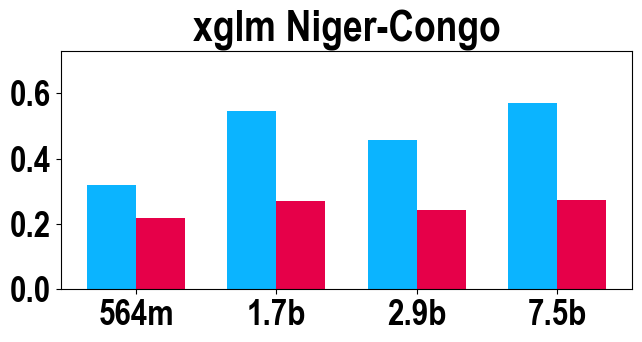

In [238]:
bar_by_lf_and_model(df, model_name='xglm', rl_level=[0,1,2,3,4,5], lang_family='Niger-Congo', task=task)

      Model Sizes  F1 Score
3  F1 bloomz-560m  0.292495
0   F1 bloomz-1b1  0.204421
1   F1 bloomz-1b7  0.237862
2    F1 bloomz-3b  0.357677
4   F1 bloomz-7b1  0.416704


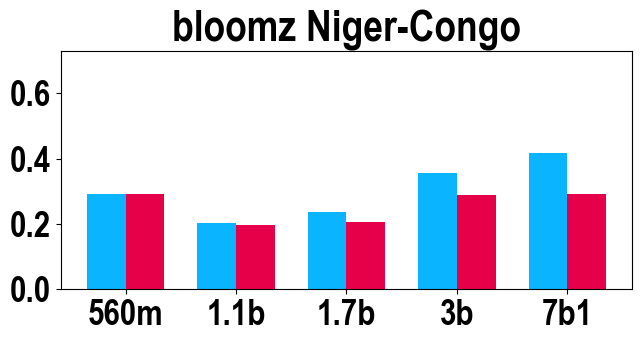

In [239]:
bar_by_lf_and_model(df, model_name='bloomz', rl_level=[0,1,2,3,4,5], lang_family='Niger-Congo', task=task)

    Model Sizes  F1 Score
2  F1 xglm-564m  0.360300
0  F1 xglm-1.7b  0.456135
1  F1 xglm-2.9b  0.467255
3  F1 xglm-7.5b  0.505503


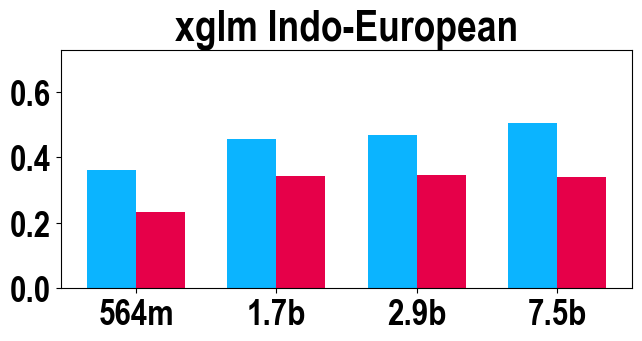

In [240]:
bar_by_lf_and_model(df, model_name='xglm', rl_level=[0,1,2,3,4,5], lang_family='Indo-European', task=task)

      Model Sizes  F1 Score
3  F1 bloomz-560m  0.432178
0   F1 bloomz-1b1  0.347383
1   F1 bloomz-1b7  0.366868
2    F1 bloomz-3b  0.474076
4   F1 bloomz-7b1  0.524467


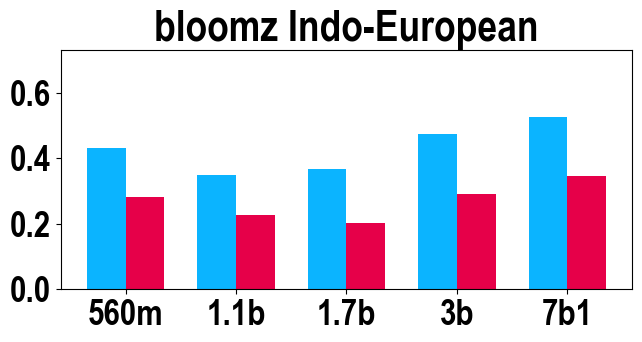

In [241]:
bar_by_lf_and_model(df, model_name='bloomz', rl_level=[0,1,2,3,4,5], lang_family='Indo-European', task=task)

Seen data is empty for RL-0
Seen data is empty for RL-1
Seen data is empty for RL-2


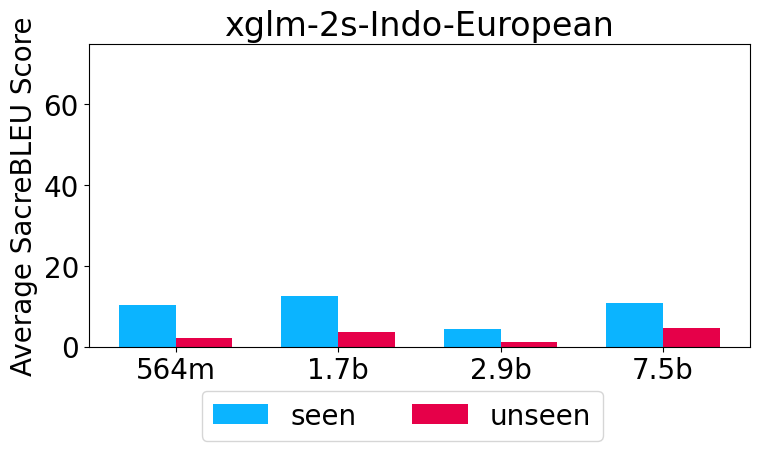

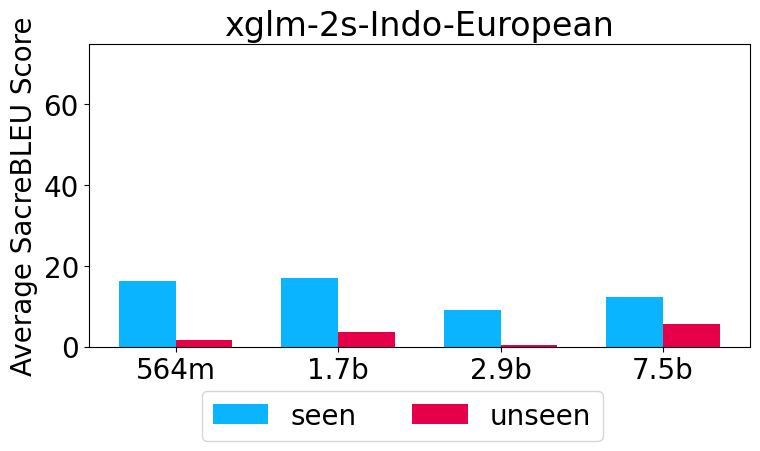

Unseen data is empty for RL-5


In [ ]:
for i in range(0,6):
    bar_by_lf_and_model(df, model_name='xglm-2s', rl_level=[i], lang_family='Indo-European')

## Unseen vs Truely Unseen - Part #1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def unseen_vs_true_unseen(df, model_name, language_family_1, language_family_2):

    models = []
    if model_name == 'bloomz':
        models = bloomz_models
        pretrain_data = 'BLOOM Pretrain Data'
    elif model_name == 'bloomz-2s':
        models = bloomz_models_2s
        pretrain_data = 'BLOOMZ Finetune Data'
    elif model_name == 'xglm':
        models = xglm_models
        pretrain_data = 'XGLM Pretrain Data'
    elif model_name == 'xglm-2s':
        models = xglm_models_2s
        pretrain_data = 'XGLM Pretrain Data'
    elif model_name == 'bloom':
        models = bloom_models
        pretrain_data = 'BLOOM Pretrain Data'
    elif model_name == 'bloom-2s':
        models = bloom_models_2s
        pretrain_data = 'BLOOMZ Finetune Data'

    # Filter the DataFrame for the two language families
    filtered_df_1 = df[df['Language Family'] == language_family_1]
    filtered_df_2 = df[df['Language Family'] == language_family_2]

    # Initialize lists to store average F1 scores for language family 1 (unseen) and language family 2
    avg_f1_unseen_1 = []
    avg_f1_2 = []

    # Calculate average F1 scores for unseen in language family 1 and entire language family 2 for each model
    for model in models:
        # unseen_f1_1 = filtered_df_1[filtered_df_1[pretrain_data].isna()][model].mean()
        unseen_f1_1 = filtered_df_1[filtered_df_1[pretrain_data] > 0][model].mean()
        f1_2 = filtered_df_2[model].mean()
        avg_f1_unseen_1.append(unseen_f1_1)
        avg_f1_2.append(f1_2)

    print(avg_f1_unseen_1)
    print(avg_f1_2)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'Model': models * 2,
        'Average F1': avg_f1_unseen_1 + avg_f1_2,
        'Language Family': [f'{language_family_1} (Unseen)'] * len(models) + [f'{language_family_2} (Entire)'] * len(models)
    })

    # Plot
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    sns.barplot(data=plot_df, x='Model', y='Average F1', hue='Language Family', palette=['#FE8D24', '#2496FE'])
    # plt.title(f'{language_family_1} (Unseen) vs {language_family_2} (Entire)')
    plt.title(f'{model_name}')
    plt.xlabel('')
    plt.ylabel('Avg F1 Score')
    plt.xticks(rotation=0)
    plt.ylim(0.0, 0.8)
    plt.yticks(np.arange(0.0, 0.8, 0.2))

    if 'xglm' in model_name:
        xticks = np.arange(len(models))
        ax.set_xticks(xticks)
        ax.set_xticklabels(['564m', '1.7b', '2.9b', '7.5b'], rotation=0)
    elif 'bloom' in model_name:
        xticks = np.arange(len(models))
        ax.set_xticks(xticks)
        ax.set_xticklabels(['560m', '1.1b', '1.7b', '3b', '7b1'], rotation=0)

    unseen_f1_1 = filtered_df_1[filtered_df_1[pretrain_data].isna()][model]
    text_box = f"{language_family_1} count: {len(unseen_f1_1)}, {language_family_2} count: {len(filtered_df_2)}"
    # ax.text(0.5, 0.9, text_box, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.text(0.5, 0.95, text_box, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

    ax.legend()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(0.0, -0.1), ncol=2)


    plt.tight_layout()
    plt.show()

[0.36030026842327784, 0.45613465006370935, 0.46725508600494997, 0.5055025118747157]
[0.1728822902369118, 0.21946890135452318, 0.197277060635508, 0.19509805777422742]


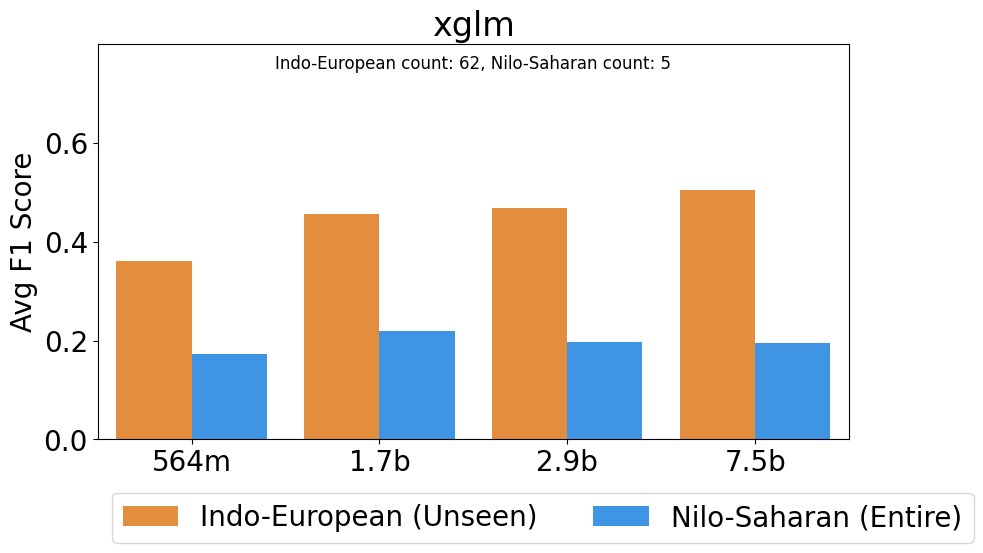

In [ ]:
unseen_vs_true_unseen(df, model_name="xglm", language_family_1= "Indo-European", language_family_2="Nilo-Saharan")

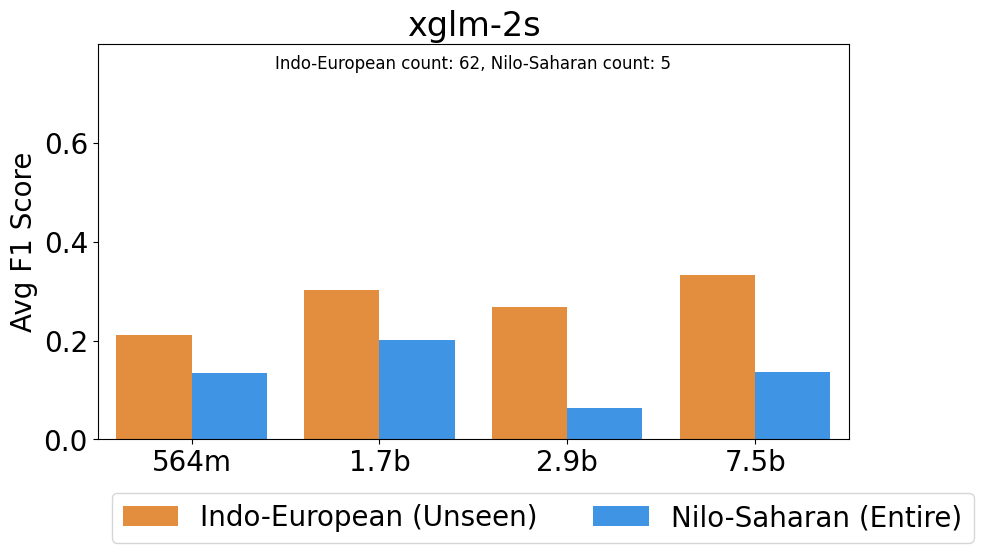

In [ ]:
unseen_vs_true_unseen(df, model_name="xglm-2s", language_family_1= "Indo-European", language_family_2="Nilo-Saharan")

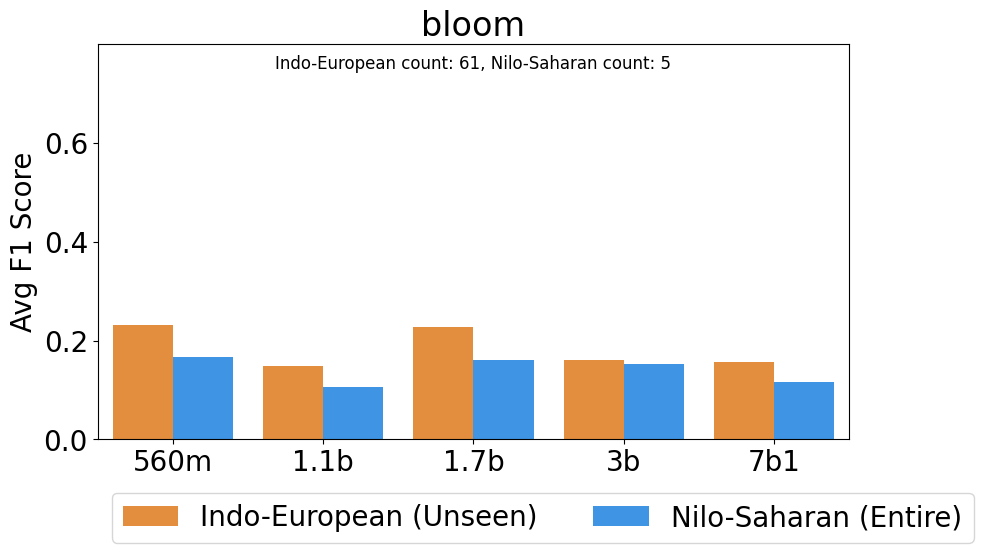

In [ ]:
unseen_vs_true_unseen(df, model_name="bloom", language_family_1= "Indo-European", language_family_2="Nilo-Saharan")

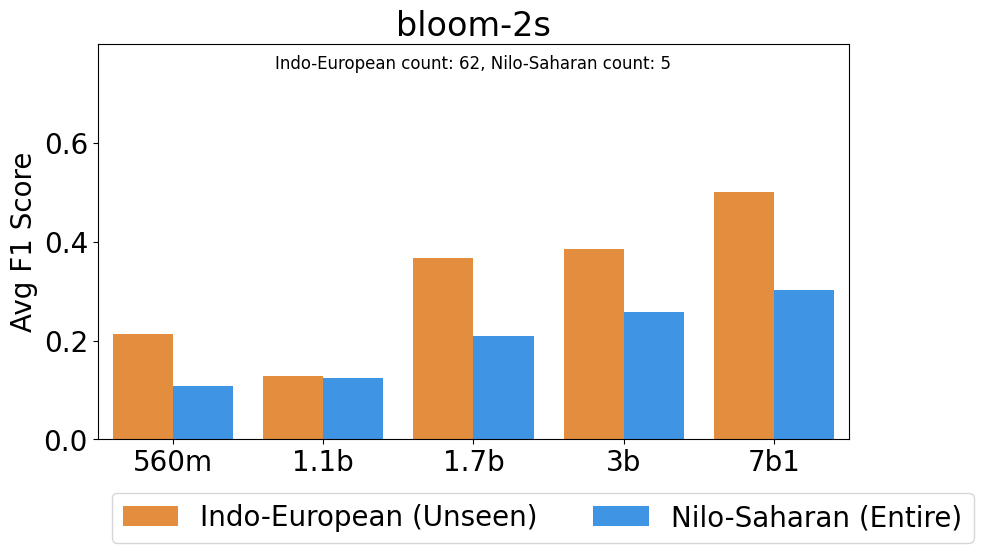

In [ ]:
unseen_vs_true_unseen(df, model_name="bloom-2s", language_family_1= "Indo-European", language_family_2="Nilo-Saharan")

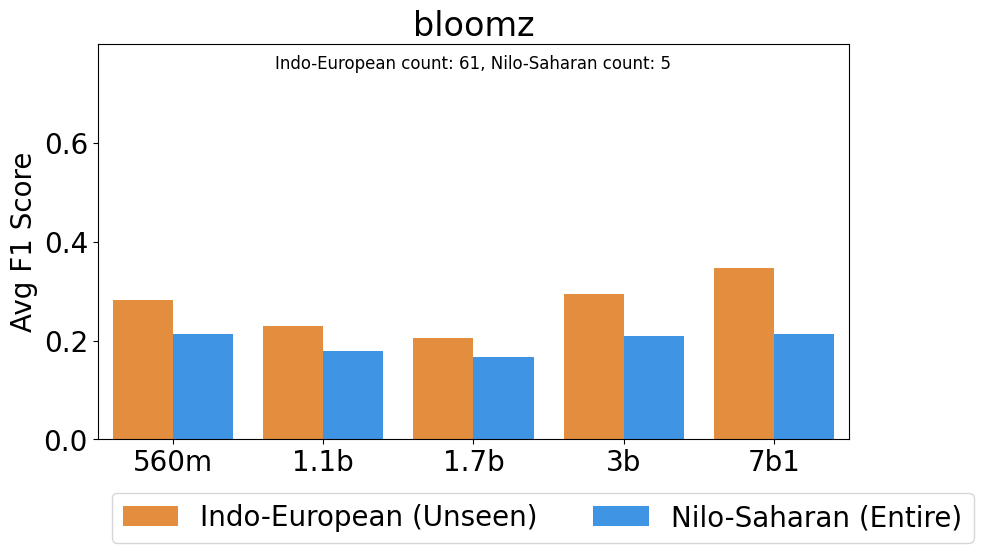

In [ ]:
unseen_vs_true_unseen(df, model_name="bloomz", language_family_1= "Indo-European", language_family_2="Nilo-Saharan")

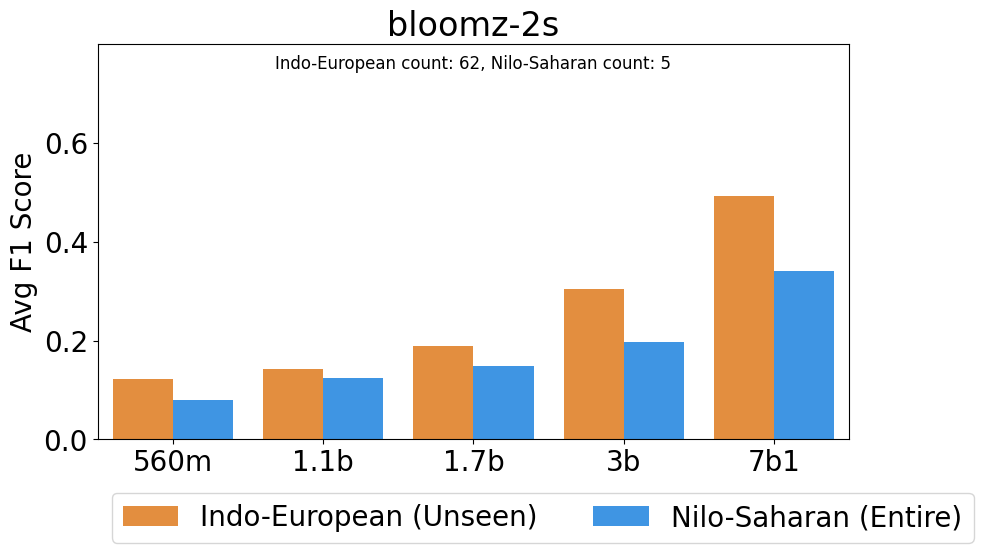

In [ ]:
unseen_vs_true_unseen(df, model_name="bloomz-2s", language_family_1= "Indo-European", language_family_2="Nilo-Saharan")

## Unseen vs Truely Unseen - Part #2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def unseen_vs_true_unseen(df, model_name, language_family_1, language_family_2):

    models = []
    if model_name == 'bloomz':
        models = bloomz_models
        pretrain_data = 'BLOOM Pretrain Data'
    elif model_name == 'bloomz-2s':
        models = bloomz_models_2s
        pretrain_data = 'BLOOMZ Finetune Data'
    elif model_name == 'xglm':
        models = xglm_models
        pretrain_data = 'XGLM Pretrain Data'
    elif model_name == 'xglm-2s':
        models = xglm_models_2s
        pretrain_data = 'XGLM Pretrain Data'
    elif model_name == 'bloom':
        models = bloom_models
        pretrain_data = 'BLOOM Pretrain Data'
    elif model_name == 'bloom-2s':
        models = bloom_models_2s
        pretrain_data = 'BLOOMZ Finetune Data'

    # Filter the DataFrame for the language families
    filtered_df_1 = df[df['Language Family'].isin(language_family_1)]
    filtered_df_2 = df[df['Language Family'].isin(language_family_2)]

    # Initialize lists to store average F1 scores for each model for both language families
    avg_f1_1 = []
    avg_f1_2 = []

    # Calculate average F1 scores for each model for language_family_1
    for model in models:
        unseen_f1_1 = filtered_df_1[filtered_df_1[pretrain_data] > 0][model]
        if not unseen_f1_1.empty:
            avg_f1_1.append(unseen_f1_1.mean())
        else:
            avg_f1_1.append(0)  # Add 0 if no data for the model in language_family_1

    # Calculate average F1 scores for each model for language_family_2
    for model in models:
        avg_f1_2.append(filtered_df_2[model].mean())

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'Model': models * 2,
        'Average F1': avg_f1_1 + avg_f1_2,
        'Language Family': [language_family_1[0]] * len(models) + [language_family_2[0]] * len(models)
    })

    # Plot
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    sns.barplot(data=plot_df,
                x='Model',
                y='Average F1',
                hue='Language Family',
                palette=['#FE8D24', '#2496FE'],
                )

    plt.title(f'{model_name}')
    plt.xlabel('')
    plt.ylabel('Avg F1 Score')
    plt.xticks(rotation=0)
    plt.ylim(0.0, 0.8)
    plt.yticks(np.arange(0.0, 0.8, 0.2))

    if 'xglm' in model_name:
        xticks = np.arange(len(models))
        ax.set_xticks(xticks)
        ax.set_xticklabels(['564m', '1.7b', '2.9b', '7.5b'], rotation=0)
    elif 'bloom' in model_name:
        xticks = np.arange(len(models))
        ax.set_xticks(xticks)
        ax.set_xticklabels(['560m', '1.1b', '1.7b', '3b', '7b1'], rotation=0)

    handles, labels = ax.get_legend_handles_labels()
    custom_legend = plt.legend(handles, ['Unseen', 'Truly Unseen'], loc='upper left')
    ax.add_artist(custom_legend)

    plt.tight_layout()
    plt.show()


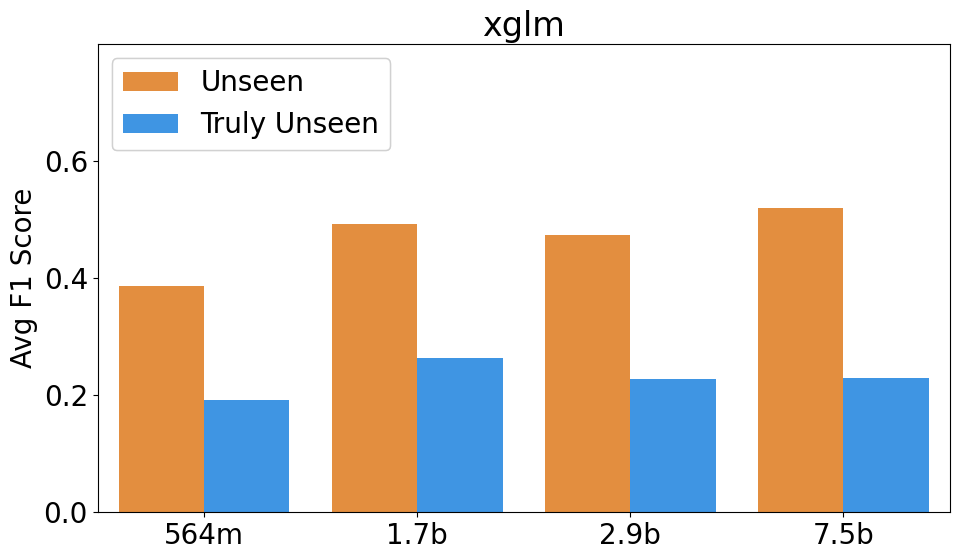

In [ ]:
xglm_family_data = family_by_pdata(df, "xglm")
xglm_families_seen = list(xglm_family_data[xglm_family_data['Seen Count']!=0]['Language Family'])
xglm_families_unseen = list(xglm_family_data[xglm_family_data['Seen Count']==0]['Language Family'])
unseen_vs_true_unseen(df, model_name="xglm", language_family_1= xglm_families_seen, language_family_2=xglm_families_unseen)

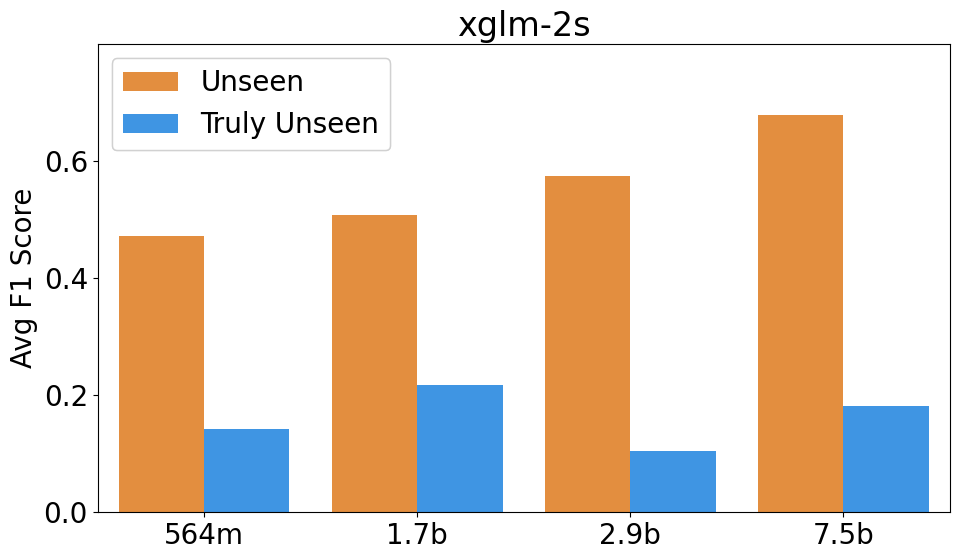

In [ ]:
xglm_family_data = family_by_pdata(df, "xglm")
xglm_families_seen = list(xglm_family_data[xglm_family_data['Seen Count']!=0]['Language Family'])
xglm_families_unseen = list(xglm_family_data[xglm_family_data['Seen Count']==0]['Language Family'])
unseen_vs_true_unseen(df, model_name="xglm-2s", language_family_1= xglm_families_seen, language_family_2=xglm_families_unseen)

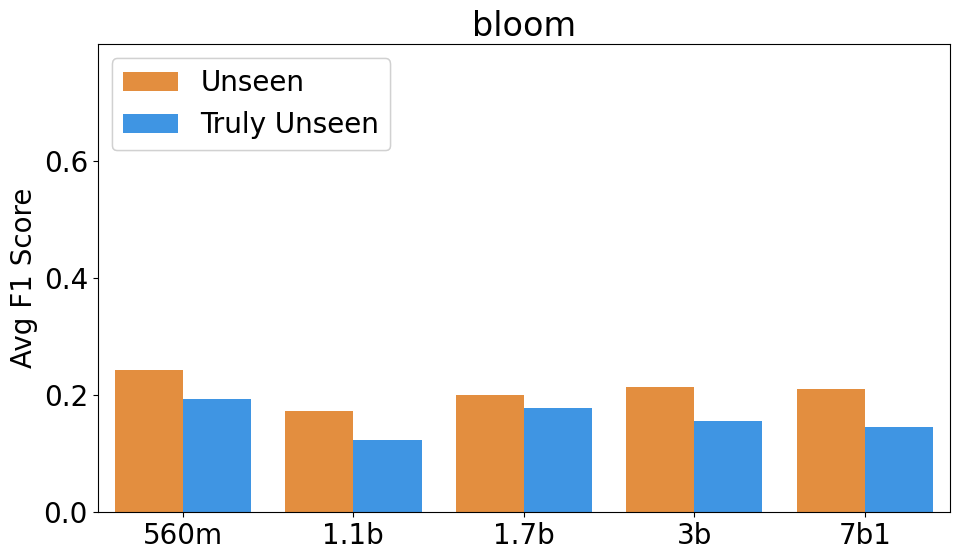

In [ ]:
bloom_family_data = family_by_pdata(df, "bloom")
bloom_families_seen = list(bloom_family_data[bloom_family_data['Seen Count']!=0]['Language Family'])
bloom_families_unseen = list(bloom_family_data[bloom_family_data['Seen Count']==0]['Language Family'])
unseen_vs_true_unseen(df, model_name="bloom", language_family_1= bloom_families_seen, language_family_2=bloom_families_unseen)

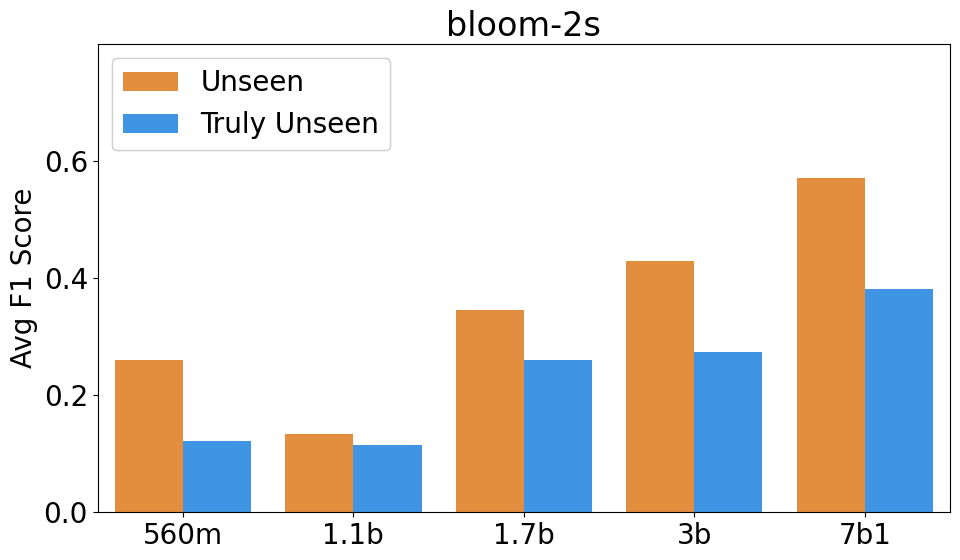

In [ ]:
bloom_family_data = family_by_pdata(df, "bloom")
bloom_families_seen = list(bloom_family_data[bloom_family_data['Seen Count']!=0]['Language Family'])
bloom_families_unseen = list(bloom_family_data[bloom_family_data['Seen Count']==0]['Language Family'])
unseen_vs_true_unseen(df, model_name="bloom-2s", language_family_1= bloom_families_seen, language_family_2=bloom_families_unseen)

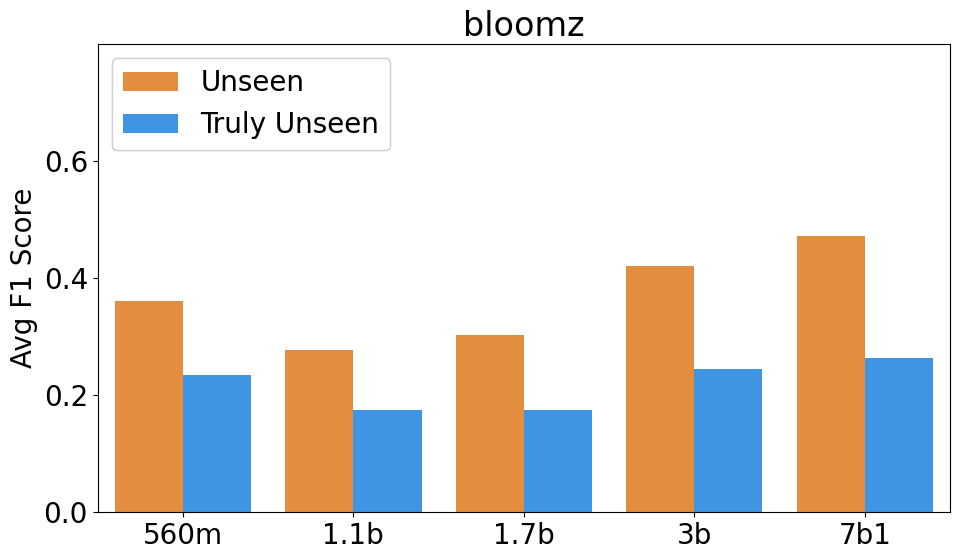

In [ ]:
bloomz_family_data = family_by_pdata(df, "bloomz")
bloomz_families_seen = list(bloomz_family_data[bloomz_family_data['Seen Count']!=0]['Language Family'])
bloomz_families_unseen = list(bloomz_family_data[bloomz_family_data['Seen Count']==0]['Language Family'])
unseen_vs_true_unseen(df, model_name="bloomz", language_family_1= bloomz_families_seen, language_family_2=bloomz_families_unseen)

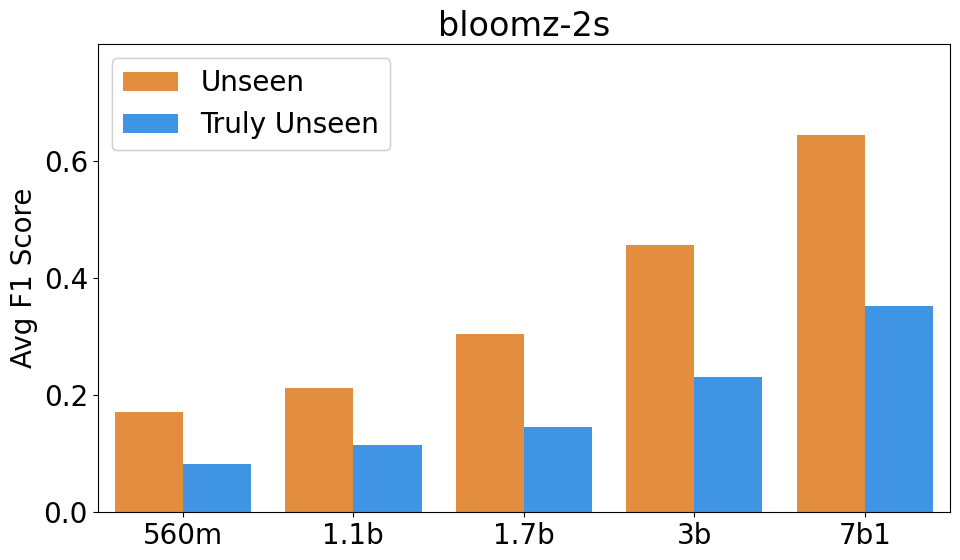

In [ ]:
bloomz_family_data = family_by_pdata(df, "bloomz")
bloomz_families_seen = list(bloomz_family_data[bloomz_family_data['Seen Count']!=0]['Language Family'])
bloomz_families_unseen = list(bloomz_family_data[bloomz_family_data['Seen Count']==0]['Language Family'])
unseen_vs_true_unseen(df, model_name="bloomz-2s", language_family_1= bloomz_families_seen, language_family_2=bloomz_families_unseen)

# Language Family - Barplots

In [ ]:
import pandas as pd
import plotly.express as px


def bar_by_family(df, model_name, languages_to_plot):
    if model_name == "bloom":
        models = bloom_models
        # if seen_flag==True:
        #     df = df[df['BLOOM Pretrain Data'].isna()]
    if model_name == "bloomz":
        models = bloomz_models
    if model_name == "xglm":
        models = xglm_models


    # Filter the DataFrame based on provided languages and bloom models
    filtered_df = df[df['Language Family'].isin(languages_to_plot)][['Language Family'] + models]

    # Sort the DataFrame based on the order of specified language families
    filtered_df['Language Family'] = pd.Categorical(filtered_df['Language Family'], categories=languages_to_plot, ordered=True)
    filtered_df = filtered_df.sort_values(by='Language Family')

    # Calculate the mean F1 for each model in each language family
    mean_df = filtered_df.groupby('Language Family').mean().reset_index()

    # Melt the DataFrame to make it suitable for Plotly Express
    melted_df = pd.melt(mean_df, id_vars=['Language Family'], var_name='Model Sizes', value_name='Mean F1 Score')

    # Create a bar plot using Plotly Express with facets
    fig = px.bar(melted_df, x='Model Sizes', y='Mean F1 Score', color='Model Sizes',
                facet_col='Language Family',
                labels={'Mean F1 Score': 'Mean F1 Score', 'Language Family': 'Language Family'},
                title='Mean F1 Scores for Different Language Families and Model Sizes',
                height=600, width=1200)

    # Update the title for each facet to make it two lines
    fig.for_each_annotation(lambda a: a.update(text=a.text.replace(' ', '<br>')))

    # Show the plot
    fig.show()

In [ ]:
import pandas as pd

def conditional_value_counts(dataframe, target_column, condition_column):
    condition = dataframe[condition_column].notnull()
    filtered_dataframe = dataframe[condition]
    value_counts_result = filtered_dataframe[target_column].value_counts()
    print(value_counts_result)
    return value_counts_result.index

In [ ]:
import pandas as pd

def conditional_value_counts(dataframe, target_column, condition_column):

    condition = dataframe[condition_column].notnull()
    # condition = dataframe[condition_column].isnull()
    filtered_dataframe = dataframe[condition]
    value_counts_result = filtered_dataframe[target_column].value_counts()

    # Calculate the sum of percentages for each language family
    sum_percentages = filtered_dataframe.groupby(target_column)[condition_column].sum()

    # Display counts and sums side by side
    result_dataframe = pd.DataFrame({
        'Count': value_counts_result,
        'Sum Percentages': sum_percentages
    })

    result_dataframe = result_dataframe.sort_values(by='Sum Percentages', ascending=False)

    print(result_dataframe)
    return result_dataframe.index

In [ ]:
bloom_families = conditional_value_counts(df, 'Language Family', 'BLOOM Pretrain Data')

                Count  Sum Percentages
Indo-European      14         61.30000
Sino-Tibetan        2         16.25000
Afro-Asiatic        1          4.60000
Austro-Asiatic      1          2.70000
Austronesian        1          1.20000
Dravidian           4          0.45000
Isolate             1          0.15000
Niger-Congo        21          0.03531


In [ ]:
bloomz_families = conditional_value_counts(df, 'Language Family', 'BLOOMZ Finetune Data')

                      Count  Sum Percentages
Afro-Asiatic             20              0.0
Kra-Dai                   3              0.0
Turkic                   11              0.0
Tupian                    1              0.0
Sino-Tibetan              8              0.0
Quechuan                  1              0.0
Nilo-Saharan              5              0.0
Niger-Congo              13              0.0
Mongolic                  1              0.0
Koreanic                  1              0.0
Austro-Asiatic            2              0.0
Kartvelian                1              0.0
Japonic                   1              0.0
Indo-European            62              0.0
Creole                    5              0.0
Constructed language      1              0.0
Aymaran                   1              0.0
Austronesian             20              0.0
Uralic                    3              0.0


In [ ]:
bloomz_families_1 = conditional_value_counts(df, 'Language Family', 'BLOOM Pretrain Data')

                      Count  Sum Percentages
Afro-Asiatic             20              0.0
Kra-Dai                   3              0.0
Turkic                   11              0.0
Tupian                    1              0.0
Sino-Tibetan              7              0.0
Quechuan                  1              0.0
Nilo-Saharan              5              0.0
Niger-Congo              14              0.0
Mongolic                  1              0.0
Koreanic                  1              0.0
Austro-Asiatic            2              0.0
Kartvelian                1              0.0
Japonic                   1              0.0
Indo-European            61              0.0
Creole                    5              0.0
Constructed language      1              0.0
Aymaran                   1              0.0
Austronesian             20              0.0
Uralic                    3              0.0


In [ ]:
xglm_families = conditional_value_counts(df, 'Language Family', 'XGLM Pretrain Data')

                      Count  Sum Percentages
Afro-Asiatic             20              0.0
Kra-Dai                   2              0.0
Turkic                   10              0.0
Tupian                    1              0.0
Sino-Tibetan              7              0.0
Nilo-Saharan              5              0.0
Niger-Congo              34              0.0
Mongolic                  1              0.0
Kartvelian                1              0.0
Austro-Asiatic            2              0.0
Indo-European            62              0.0
Dravidian                 2              0.0
Creole                    4              0.0
Constructed language      1              0.0
Aymaran                   1              0.0
Austronesian             20              0.0
Uralic                    1              0.0


In [ ]:
bar_by_family(df, model_name="bloom", languages_to_plot=bloom_families)

TypeError: bar_by_family() got an unexpected keyword argument 'languages_to_plot'

In [ ]:
bar_by_family(df, model_name="bloomz", languages_to_plot=bloomz_families)

In [ ]:
bar_by_family(df, model_name="xglm", languages_to_plot=xglm_families)

In [ ]:
bar_by_family(df, model_name="bloomz", languages_to_plot=bloomz_families_1)

# Languages Seen vs Unseen

In [ ]:
na_counts = df_main['BLOOMZ Finetune Data'].isna().value_counts()

# Display the counts
print("Before removing rows with NaN values")
print("Number of languages not seen:", na_counts.get(True, 0))
print("Number of languages seen:", na_counts.get(False, 0))

Before removing rows with NaN values
Number of languages not seen: 160
Number of languages seen: 44


In [ ]:
def plot_by_resourse_level(df, model_name, seen_flag):

    if model_name == "bloom":
        models = bloom_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOM Pretrain Data'].isna()]
    elif model_name == "bloomz":
        models = bloomz_models
        if seen_flag == 'True':
            df = df.dropna(subset=['BLOOMZ Finetune Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['BLOOMZ Finetune Data'].isna()]
    elif model_name == "xglm":
        models = xglm_models
        if seen_flag == 'True':
            df = df.dropna(subset=['XGLM Pretrain Data'], how='any')
        elif seen_flag == 'False':
            df = df[df['XGLM Pretrain Data'].isna()]
    else:
        print("============ ERROR ============")
        print("Invalid model name")

    import plotly.subplots as sp
    import plotly.graph_objects as go
    import plotly.express as px

    num_rows = (len(resource_levels) + 1) // 2
    num_cols = min(2, len(resource_levels))

    fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=[f'Resource Level {level}' for level in resource_levels])

    for i, level in enumerate(resource_levels):
        row = i // num_cols + 1
        col = i % num_cols + 1

        subset = df[df['Resource Level'] == level]

        # Define a color for each model within the subplot
        colors = px.colors.qualitative.Set1

        for j, model in enumerate(models):
            color = colors[j % len(colors)]  # Cycle through colors for each model
            fig.add_trace(go.Scatter(x=subset['Folder Name'],
                                    y=subset[model],
                                    mode='lines+markers',
                                    name=f'{model}',
                                    legendgroup=f"{row}-{col}",
                                    line_color=color,
                                    marker_color=color,
                                    showlegend=(i == 0)),  # Show legend only for the first trace in each subplot
                        row=row, col=col)

    # Update layout and show the figure
    fig.update_xaxes(title_text='Languages', row=num_rows, col=1)

    # Set y-axis limits for all subplots
    for row in range(1, num_rows + 1):
        for col in range(1, num_cols + 1):
            fig.update_yaxes(title_text='F1 Score', row=row, col=col, range=[0, 0.8])

    fig.update_layout(height=800, width=1200, title_text=model_name)

    fig.show()

In [ ]:
plot_by_resourse_level(df, model_name="bloom", seen_flag='True')

In [ ]:
plot_by_resourse_level(df, model_name="bloom", seen_flag='False')